In [1]:
#importing the library
import os
import numpy as np
import pandas as pd
%matplotlib inline
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import pydotplus
from IPython.display import Image
import sklearn.tree as tree
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_profiling
#from pandas_profiling import ProfileReport
import mysql.connector
from mysql.connector import Error
from collections import Counter
from scipy.stats import norm, skew
from scipy import stats
import plotly
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
from plotly.offline import iplot, init_notebook_mode
import cufflinks
import cufflinks as cf
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.set_config_file(offline=True)
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [2]:
#setting the directory to where the file is stored in the system
os.chdir('C:/Users/Darren savio dsouza/Desktop/jigsaw/Capstone_Project/python')

In [3]:
data=pd.read_excel("Student Applications & Performance.xlsx")
data.head()

STUDENT IDENTIFIER  STDNT_AGE STDNT_GENDER STDNT_BACKGROUND IN_STATE_FLAG  \
0             7808615         18            F            BGD 1             Y   
1             7830063         19            F            BGD 1             N   
2             7847538         18            M            BGD 1             Y   
3             8006429         18            M            BGD 1             Y   
4             7962680         18            F            BGD 1             Y   

  INTERNATIONAL_STS  STDNT_MAJOR STDNT_MINOR  STDNT_TEST_ENTRANCE1  \
0                 N   Undeclared           N                   NaN   
1                 N   Undeclared           N                  26.0   
2                 N  Mathematics           N                   NaN   
3                 N   Undeclared           N                   NaN   
4                 N          Art           N                   NaN   

   STDNT_TEST_ENTRANCE2  ...  DEGREE_GROUP_CD  DEGREE_GROUP_DESC  \
0                1150.0  ...                B          Bachelors   
1                   NaN  ...                B          Bachelors   
2                1020.0  ...                B          Bachelors   
3                1210.0  ...                B          Bachelors   
4                1200.0  ...                B          Bachelors   

  FIRST_TERM_ATTEMPT_HRS FIRST_TERM_EARNED_HRS SECOND_TERM_ATTEMPT_HRS  \
0                     16                    16                    14.0   
1                     18                    18                    18.0   
2                     15                    15                    14.0   
3                     13                    13                    14.0   
4                     12                    12                    12.0   

  SECOND_TERM_EARNED_HRS GROSS_FIN_NEED COST_OF_ATTEND EST_FAM_CONTRIBUTION  \
0                   14.0              0              0                    0   
1                   18.0         570000        1355760               785760   
2                   14.0              0              0                    0   
3                   14.0              0              0                    0   
4                   12.0         835920        1355760               519840   

  UNMET_NEED  
0        0.0  
1   459300.0  
2        0.0  
3        0.0  
4   278340.0  

[5 rows x 56 columns]

In [4]:
# Make a copy of the original sourcefile
dat =data.copy()

dat=pd.DataFrame(dat)

In [5]:
dat.shape

(3400, 56)

In [6]:
#checking the missing values for each row.
dat.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

In [7]:
#checking dtypes of each variable

dat.columns.to_series().groupby(dat.dtypes).groups

{dtype('int64'): Index(['STUDENT IDENTIFIER', 'STDNT_AGE', 'FIRST_TERM', 'SECOND_TERM',
        'RETURNED_2ND_YR', 'FIRST_TERM_ATTEMPT_HRS', 'FIRST_TERM_EARNED_HRS',
        'GROSS_FIN_NEED', 'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION'],
       dtype='object'),
 dtype('float64'): Index(['STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2',
        'STDNT_TEST_ENTRANCE_COMB', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA',
        'FATHER_HI_EDU_CD', 'MOTHER_HI_EDU_CD', 'SECOND_TERM_ATTEMPT_HRS',
        'SECOND_TERM_EARNED_HRS', 'UNMET_NEED'],
       dtype='object'),
 dtype('O'): Index(['STDNT_GENDER', 'STDNT_BACKGROUND', 'IN_STATE_FLAG',
        'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR',
        'CORE_COURSE_NAME_1_F', 'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
        'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
        'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_4_F',
        'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_NAME_5_F',
        'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_NAME_6_F',
   

In [8]:
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

## Display all the rows of the dataframe

pd.pandas.set_option('display.max_rows',None)

In [9]:
dat.head()

STUDENT IDENTIFIER  STDNT_AGE STDNT_GENDER STDNT_BACKGROUND IN_STATE_FLAG  \
0             7808615         18            F            BGD 1             Y   
1             7830063         19            F            BGD 1             N   
2             7847538         18            M            BGD 1             Y   
3             8006429         18            M            BGD 1             Y   
4             7962680         18            F            BGD 1             Y   

  INTERNATIONAL_STS  STDNT_MAJOR STDNT_MINOR  STDNT_TEST_ENTRANCE1  \
0                 N   Undeclared           N                   NaN   
1                 N   Undeclared           N                  26.0   
2                 N  Mathematics           N                   NaN   
3                 N   Undeclared           N                   NaN   
4                 N          Art           N                   NaN   

   STDNT_TEST_ENTRANCE2  STDNT_TEST_ENTRANCE_COMB  FIRST_TERM  \
0                1150.0                    1150.0      200708   
1                   NaN                    1190.0      200808   
2                1020.0                    1030.0      201008   
3                1210.0                    1220.0      200708   
4                1200.0                    1190.0      200808   

  CORE_COURSE_NAME_1_F CORE_COURSE_GRADE_1_F CORE_COURSE_NAME_2_F  \
0            ANTH 1105                     A            ARTH 1100   
1            ANTH 1105                     A            GERM 1002   
2            ANTH 1105                     A            ENGL 1101   
3            ANTH 1107                     A            COMM 1110   
4            ANTH 1107                     A            ARTH 1100   

  CORE_COURSE_GRADE_2_F CORE_COURSE_NAME_3_F CORE_COURSE_GRADE_3_F  \
0                     A            ENGL 1102                     A   
1                     A            ITDS 2735                     A   
2                     A            HIST 2111                     A   
3                     A                  NaN                   NaN   
4                     A            CPSC 1105                     A   

  CORE_COURSE_NAME_4_F CORE_COURSE_GRADE_4_F CORE_COURSE_NAME_5_F  \
0            PSYC 1101                     A                  NaN   
1            MATH 1125                     A            THEA 1100   
2            MATH 1111                     A            SOCI 1101   
3                  NaN                   NaN                  NaN   
4            MATH 1111                     A                  NaN   

  CORE_COURSE_GRADE_5_F CORE_COURSE_NAME_6_F CORE_COURSE_GRADE_6_F  \
0                   NaN                  NaN                   NaN   
1                     A            POLS 1101                     A   
2                     A                  NaN                   NaN   
3                   NaN                  NaN                   NaN   
4                   NaN                  NaN                   NaN   

   SECOND_TERM CORE_COURSE_NAME_1_S CORE_COURSE_GRADE_1_S  \
0       200802            CHEM 1151                     A   
1       200902            ECON 2105                     A   
2       201102            ENGL 1102                     A   
3       200802            ENGL 1102                     A   
4       200902            COMM 1110                     A   

  CORE_COURSE_NAME_2_S CORE_COURSE_GRADE_2_S CORE_COURSE_NAME_3_S  \
0           CHEM 1151L                     A            COMM 1110   
1            ENGL 1102                     A                  NaN   
2            ENVS 1105                     A            MUSC 1100   
3            HIST 2112                     A            LEAD 1705   
4            ENGL 1101                     A            HIST 2111   

  CORE_COURSE_GRADE_3_S CORE_COURSE_NAME_4_S CORE_COURSE_GRADE_4_S  \
0                     A            ITDS 2749                     A   
1                   NaN                  NaN                   NaN   
2                     A                  NaN  

In [10]:
dat.describe()

STUDENT IDENTIFIER    STDNT_AGE  STDNT_TEST_ENTRANCE1  \
count        3.400000e+03  3400.000000           1106.000000   
mean         7.897155e+06    17.994118             20.660036   
std          8.083421e+04     0.552052              3.234734   
min          7.755837e+06    16.000000              8.000000   
25%          7.827039e+06    18.000000             18.000000   
50%          7.899052e+06    18.000000             20.000000   
75%          7.964008e+06    18.000000             22.000000   
max          8.037098e+06    26.000000             32.000000   

       STDNT_TEST_ENTRANCE2  STDNT_TEST_ENTRANCE_COMB     FIRST_TERM  \
count           2492.000000               2882.000000    3400.000000   
mean             965.092295                997.758501  200777.000000   
std              209.088633                156.268221     170.001298   
min              350.000000                530.000000  200508.000000   
25%              900.000000                910.000000  200608.000000   
50%              990.000000                990.000000  200808.000000   
75%             1100.000000               1110.000000  200908.000000   
max             1490.000000               1510.000000  201008.000000   

         SECOND_TERM  RETURNED_2ND_YR  DISTANCE_FROM_HOME  HIGH_SCHL_GPA  \
count    3400.000000      3400.000000         3375.000000    3347.000000   
mean   200871.000000         0.787353           99.825185       3.202738   
std       170.001298         0.409240          235.196984       0.455337   
min    200602.000000         0.000000            0.000000       0.000000   
25%    200702.000000         1.000000           69.000000       2.870000   
50%    200902.000000         1.000000           69.000000       3.200000   
75%    201002.000000         1.000000          138.000000       3.560000   
max    201102.000000         1.000000         5932.000000       4.000000   

       FATHER_HI_EDU_CD  MOTHER_HI_EDU_CD  FIRST_TERM_ATTEMPT_HRS  \
count       2968.000000       2911.000000             3400.000000   
mean           2.560647          2.571281               13.985882   
std            0.681273          0.611729                1.554286   
min            1.000000          1.000000                9.000000   
25%            2.000000          2.000000               13.000000   
50%            3.000000          3.000000               14.000000   
75%            3.000000          3.000000               15.000000   
max            4.000000          4.000000               21.000000   

       FIRST_TERM_EARNED_HRS  SECOND_TERM_ATTEMPT_HRS  SECOND_TERM_EARNED_HRS  \
count            3400.000000              3194.000000             3191.000000   
mean               12.205000                14.285848               12.511125   
std                 2.986294                 2.104387                3.470492   
min                 0.000000                 2.000000                0.000000   
25%                11.000000                13.000000               11.000000   
50%                13.000000                14.000000               13.000000   
75%                15.000000                16.000000               15.000000   
max                21.000000                23.000000               23.000000   

       GROSS_FIN_NEED  COST_OF_ATTEND  EST_FAM_CONTRIBUTION    UNMET_NEED  
count    3.400000e+03    3.400000e+03          3.400000e+03  3.400000e+03  
mean     3.034025e+05    5.515335e+05          3.446899e+05  7.222052e+04  
std      4.836255e+05    6.064403e+05          7.871878e+05  2.795679e+05  
min      0.000000e+00    0.000000e+00          0.000000e+00 -1.212072e+06  
25%      0.000000e+00    0.000000e+00          0.000000e+00  0.000000e+00  
50%      0.000000e+00    1.505400e+05          0.000000e+00  0.000000e+00  
75%      5.995800e+05    1.192815e+06          3.241800e+05  1.876155e+05  
max      2.124900e+06    2.124900e+06          5.999940e+06  1.632660e+06

In [11]:
#our dependent variable
#print(dat["RETURNED_2ND_YR"].describe)
#Note here 0 is attrition and 1 is not attriation. 
#AND the replace 1 with 0 and 0 with 1
#print(dat['RETURNED_2ND_YR'].value_counts())

In [12]:
dat["RETURNED_2ND_YR"].replace({0: "Yes", 1: "No"}, inplace=True)

In [13]:
#here we shall keep 1 as attrition and 0 as non attrition
dat["RETURNED_2ND_YR"].replace({"Yes":1, "No":0}, inplace=True)

In [14]:
#create a new column for the target variable
dat['ATTRITION']=dat["RETURNED_2ND_YR"]

In [15]:
#Lets drop the column  RETURNED_2ND_YR since we already created a new column
dat=dat.drop(["RETURNED_2ND_YR"],axis=1)

#DATA ANALYSIS

In [16]:
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dat.columns if dat[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dat[feature].isnull().mean(), 4),  ' % missing values')

STDNT_TEST_ENTRANCE1 0.6747  % missing values
STDNT_TEST_ENTRANCE2 0.2671  % missing values
STDNT_TEST_ENTRANCE_COMB 0.1524  % missing values
CORE_COURSE_NAME_2_F 0.0291  % missing values
CORE_COURSE_GRADE_2_F 0.0291  % missing values
CORE_COURSE_NAME_3_F 0.1662  % missing values
CORE_COURSE_GRADE_3_F 0.1662  % missing values
CORE_COURSE_NAME_4_F 0.4697  % missing values
CORE_COURSE_GRADE_4_F 0.4697  % missing values
CORE_COURSE_NAME_5_F 0.8103  % missing values
CORE_COURSE_GRADE_5_F 0.8103  % missing values
CORE_COURSE_NAME_6_F 0.9624  % missing values
CORE_COURSE_GRADE_6_F 0.9624  % missing values
CORE_COURSE_NAME_1_S 0.0462  % missing values
CORE_COURSE_GRADE_1_S 0.0682  % missing values
CORE_COURSE_NAME_2_S 0.1291  % missing values
CORE_COURSE_GRADE_2_S 0.1291  % missing values
CORE_COURSE_NAME_3_S 0.3053  % missing values
CORE_COURSE_GRADE_3_S 0.3053  % missing values
CORE_COURSE_NAME_4_S 0.6015  % missing values
CORE_COURSE_GRADE_4_S 0.6015  % missing values
CORE_COURSE_NAME_5_S 

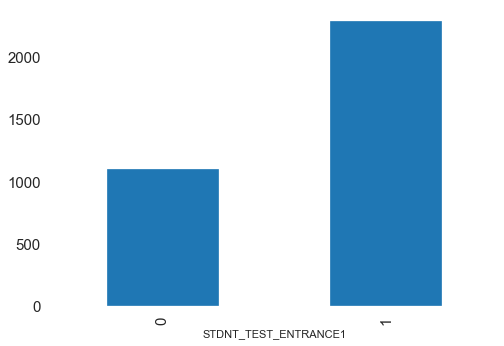

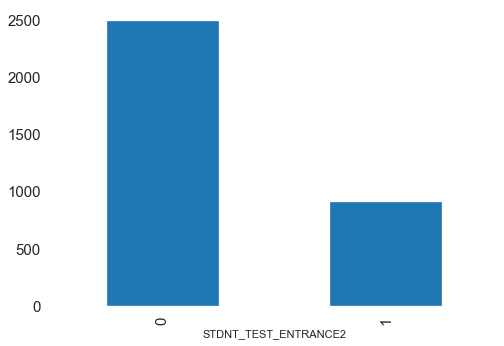

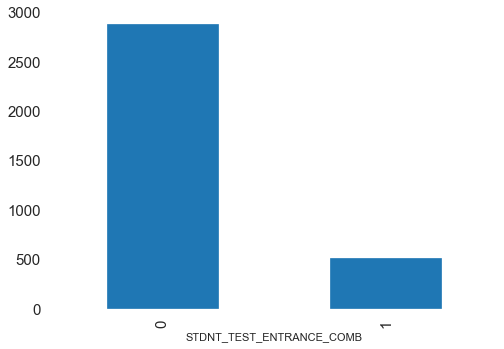

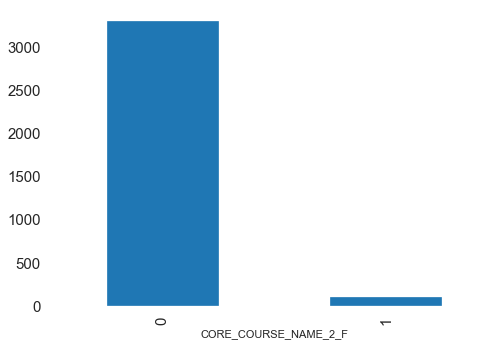

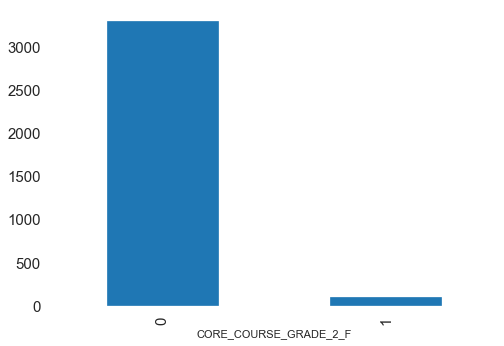

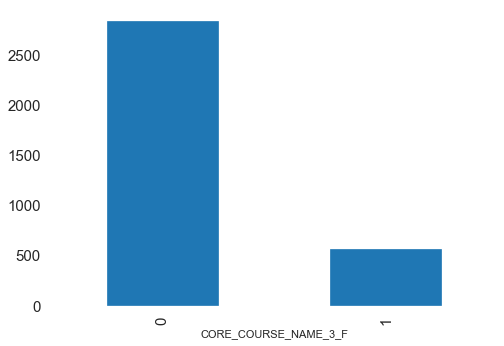

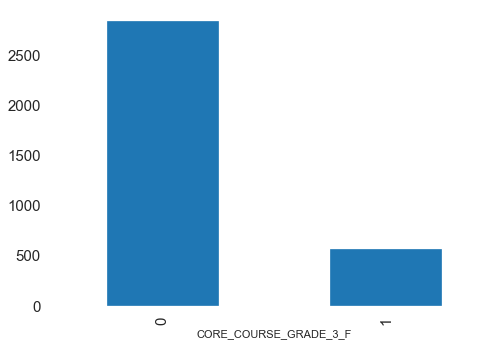

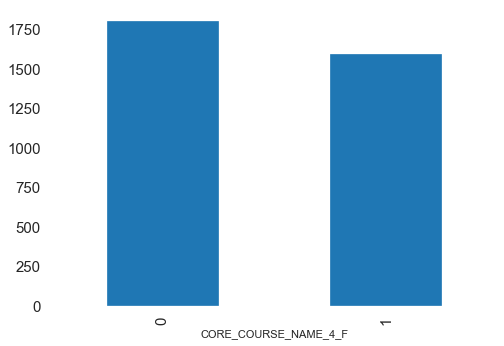

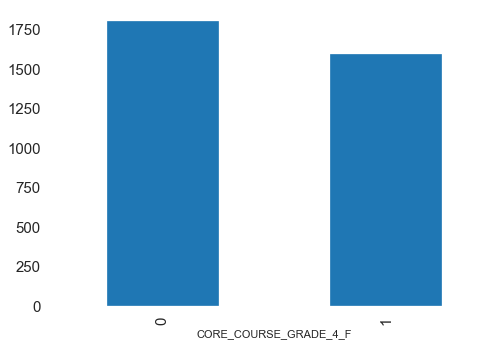

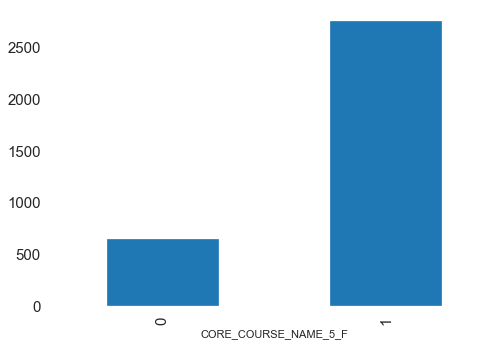

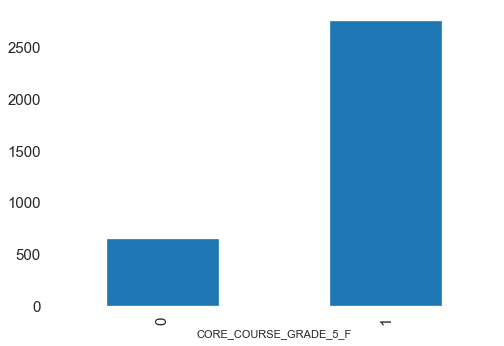

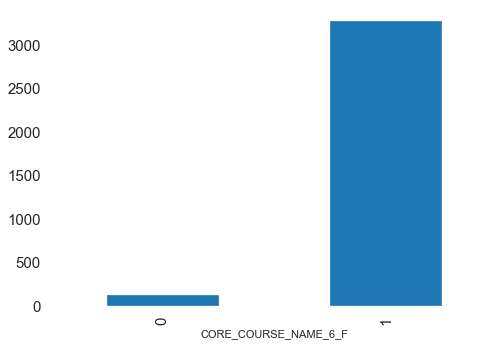

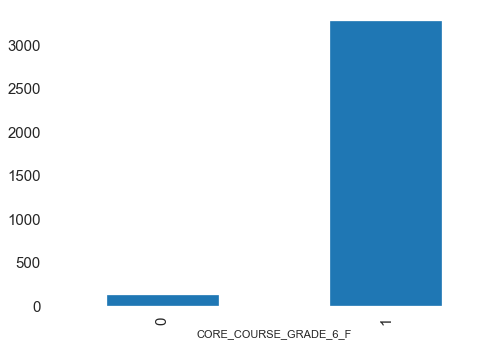

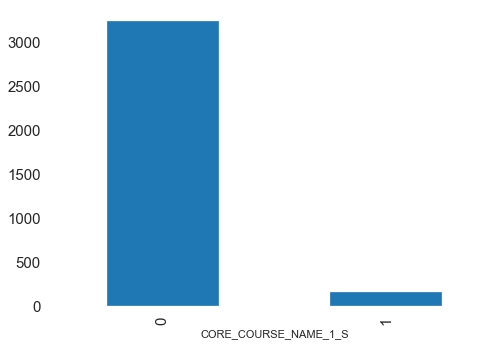

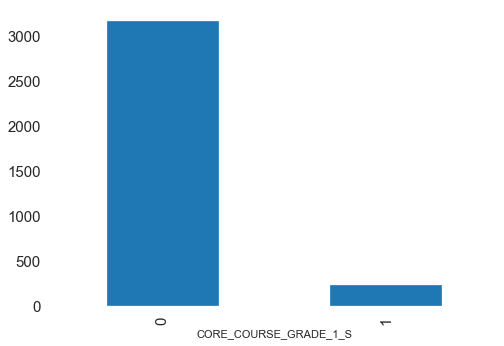

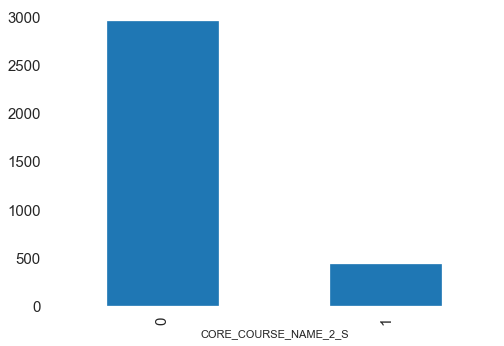

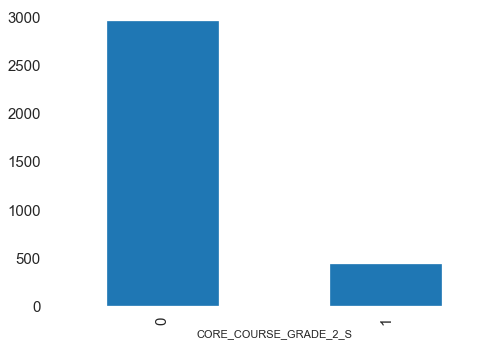

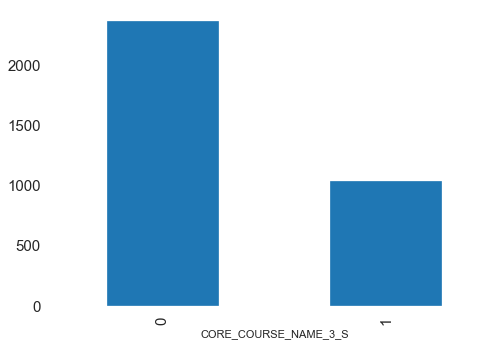

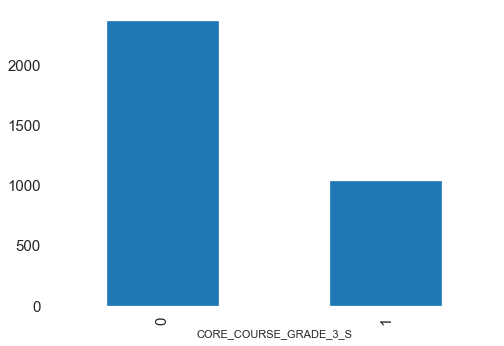

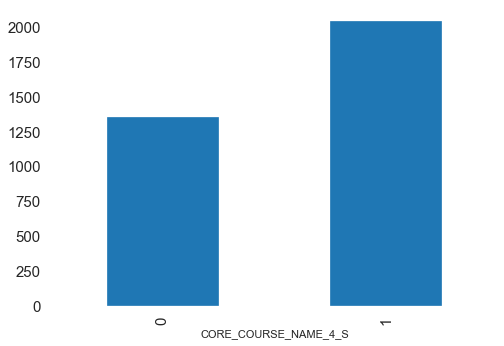

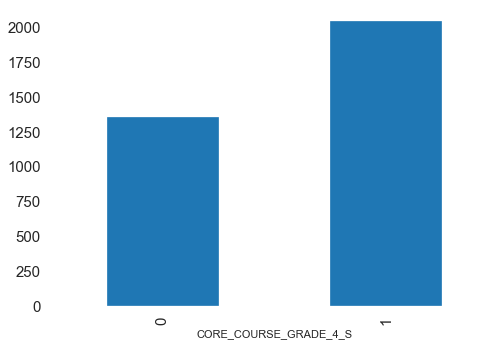

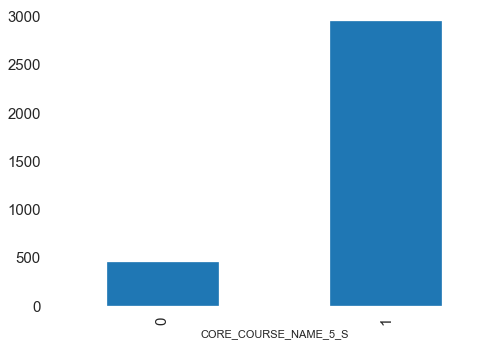

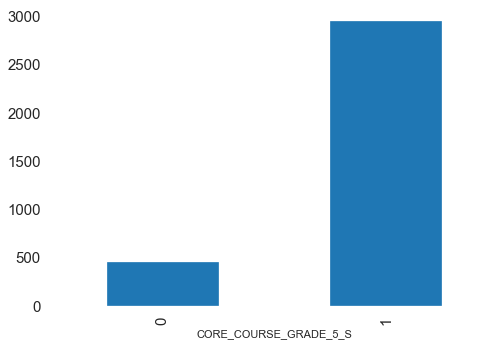

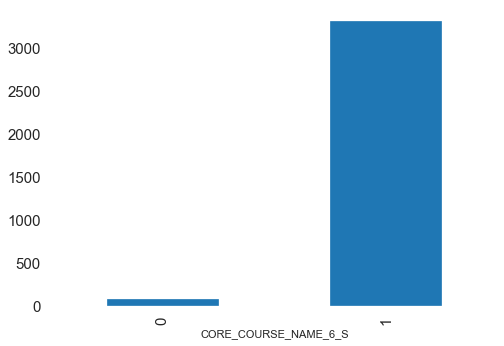

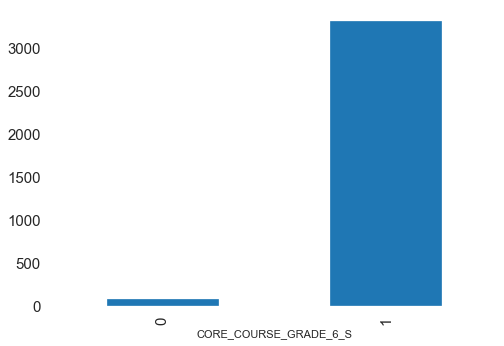

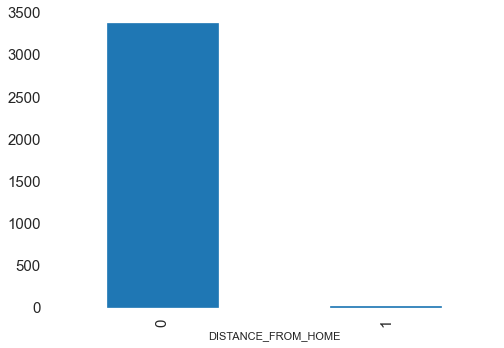

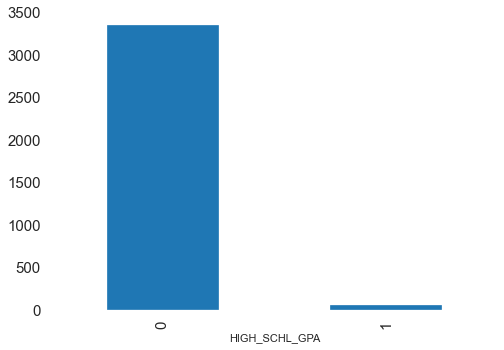

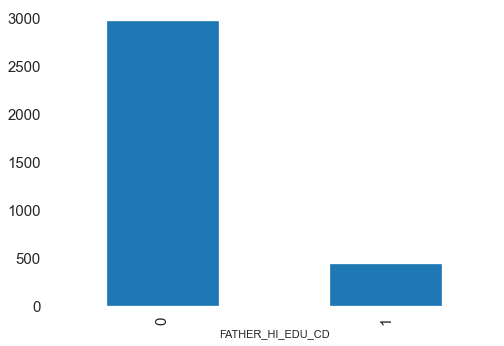

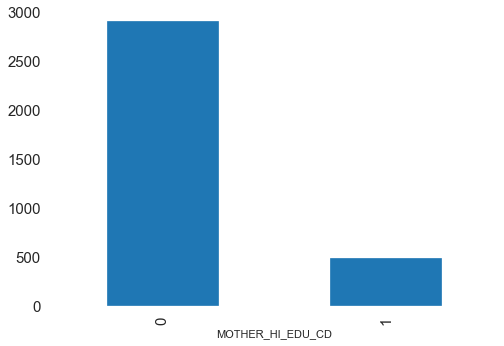

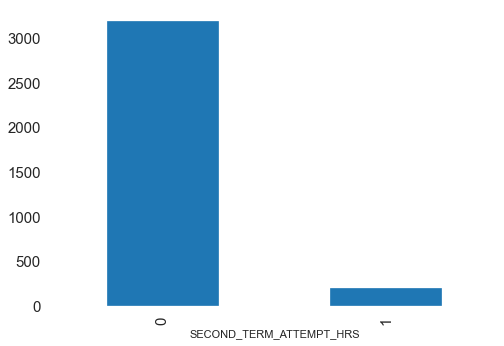

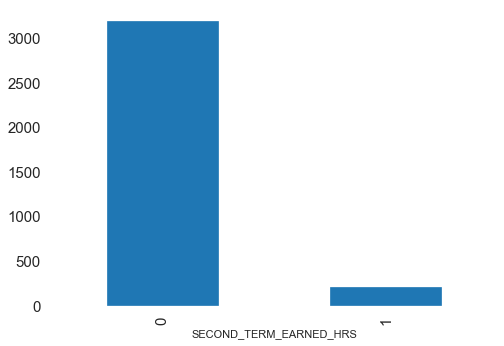

In [32]:
for feature in features_with_na:
    data_copy= dat.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data_copy[feature] = np.where(data_copy[feature].isnull(), 1, 0)
    
    # let's see the information is missing or present
    #plt.figure(figsize=(50, 20))
    plt.xticks(size=15)
    plt.yticks(size=15)
    #plt.xlabel(size=35)
    #plt.ylabel(size=35)
    data_copy.groupby(feature)['ATTRITION'].count().plot.bar()
    #plt.title(feature)
    plt.show()

In [27]:
#lets check the numerical features
# list of numerical variables
numerical_features = [feature for feature in data_copy.columns if data_copy[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data_copy[numerical_features].head()

Number of numerical variables:  20


STUDENT IDENTIFIER  STDNT_AGE  STDNT_TEST_ENTRANCE1  STDNT_TEST_ENTRANCE2  \
0             7808615         18                   NaN                1150.0   
1             7830063         19                  26.0                   NaN   
2             7847538         18                   NaN                1020.0   
3             8006429         18                   NaN                1210.0   
4             7962680         18                   NaN                1200.0   

   STDNT_TEST_ENTRANCE_COMB  FIRST_TERM  SECOND_TERM  DISTANCE_FROM_HOME  \
0                    1150.0      200708       200802               150.0   
1                    1190.0      200808       200902                69.0   
2                    1030.0      201008       201102               150.0   
3                    1220.0      200708       200802               150.0   
4                    1190.0      200808       200902                69.0   

   HIGH_SCHL_GPA  FATHER_HI_EDU_CD  MOTHER_HI_EDU_CD  FIRST_TERM_ATTEMPT_HRS  \
0           4.00               NaN               NaN                      16   
1           2.89               3.0               3.0                      18   
2           3.39               2.0               4.0                      15   
3           2.93               3.0               3.0                      13   
4           3.86               3.0               2.0                      12   

   FIRST_TERM_EARNED_HRS  SECOND_TERM_ATTEMPT_HRS  SECOND_TERM_EARNED_HRS  \
0                     16                     14.0                       0   
1                     18                     18.0                       0   
2                     15                     14.0                       0   
3                     13                     14.0                       0   
4                     12                     12.0                       0   

   GROSS_FIN_NEED  COST_OF_ATTEND  EST_FAM_CONTRIBUTION  UNMET_NEED  ATTRITION  
0               0               0                     0         0.0          1  
1          570000         1355760                785760    459300.0          0  
2               0               0                     0         0.0          0  
3               0               0                     0         0.0          0  
4          835920         1355760                519840    278340.0          0

In [28]:

# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature
#we dont have year features

[]

In [29]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(data_copy[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 11


In [30]:
print(discrete_feature)
print(numerical_features)

['STDNT_AGE', 'STDNT_TEST_ENTRANCE1', 'FIRST_TERM', 'SECOND_TERM', 'FATHER_HI_EDU_CD', 'MOTHER_HI_EDU_CD', 'FIRST_TERM_ATTEMPT_HRS', 'FIRST_TERM_EARNED_HRS', 'SECOND_TERM_ATTEMPT_HRS', 'SECOND_TERM_EARNED_HRS', 'ATTRITION']
['STUDENT IDENTIFIER', 'STDNT_AGE', 'STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2', 'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'SECOND_TERM', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA', 'FATHER_HI_EDU_CD', 'MOTHER_HI_EDU_CD', 'FIRST_TERM_ATTEMPT_HRS', 'FIRST_TERM_EARNED_HRS', 'SECOND_TERM_ATTEMPT_HRS', 'SECOND_TERM_EARNED_HRS', 'GROSS_FIN_NEED', 'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION', 'UNMET_NEED', 'ATTRITION']


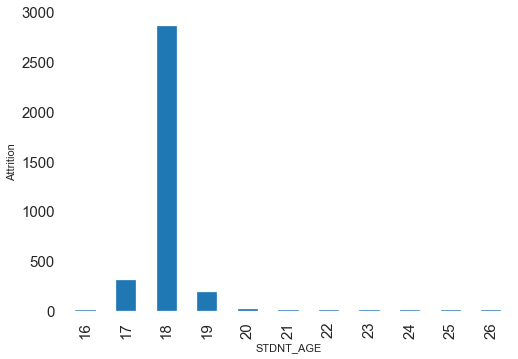

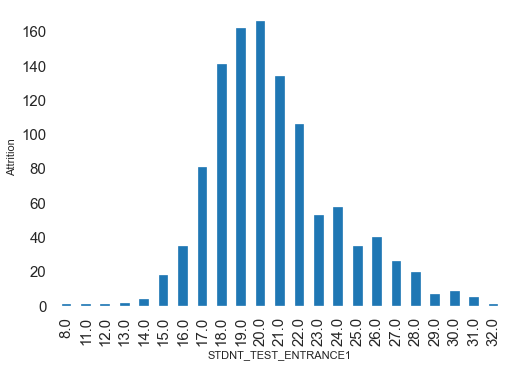

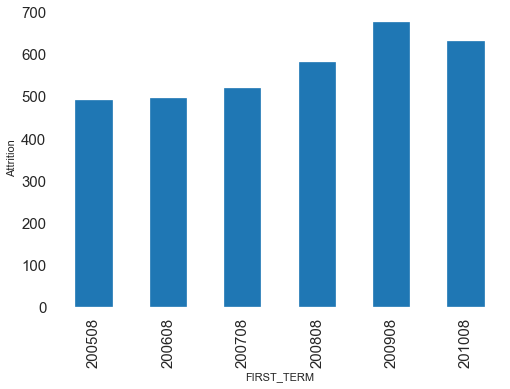

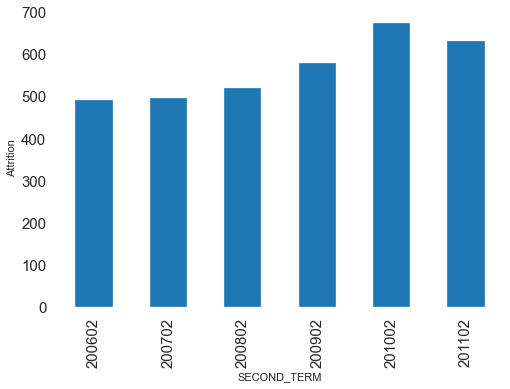

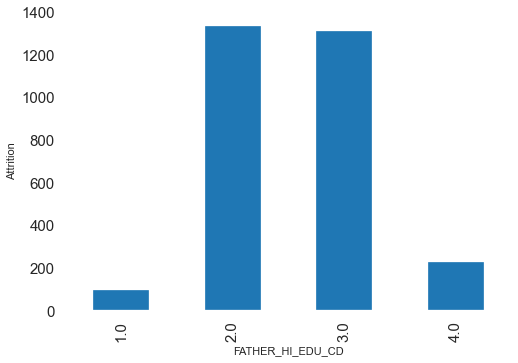

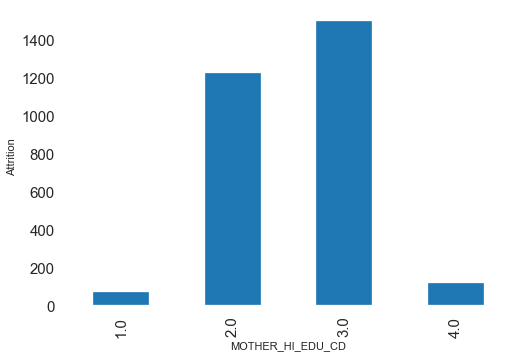

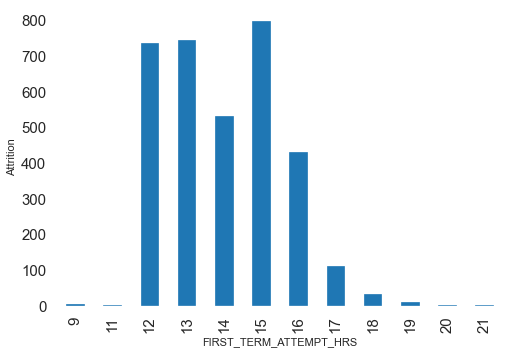

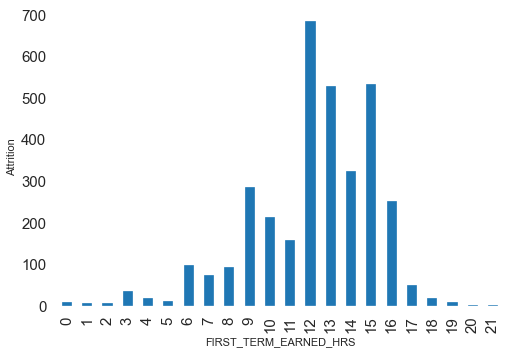

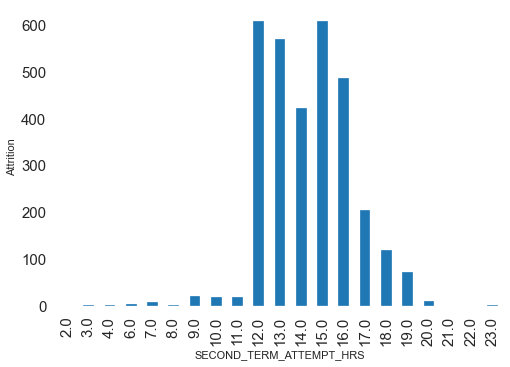

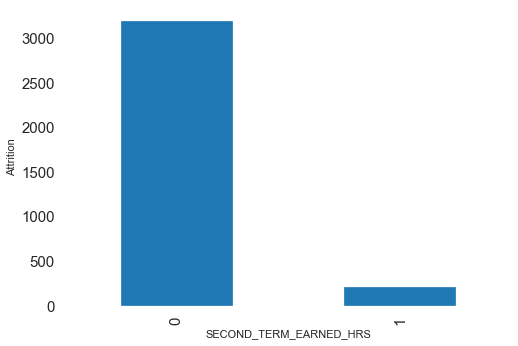

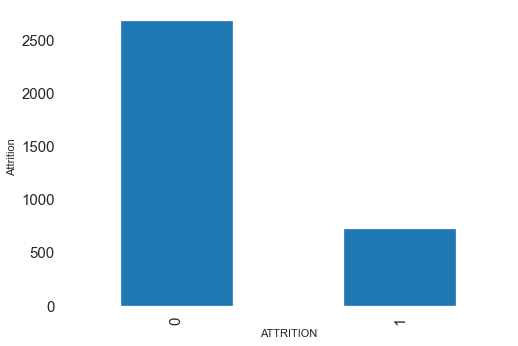

In [34]:

## Lets Find the realtionship between them and Attrition

for feature in discrete_feature:
    
    data_copy.groupby(feature)['ATTRITION'].count().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Attrition')
    #plt.figure(figsize=(50, 20))
    plt.xticks(size=15)
    plt.yticks(size=15)
    #plt.xlabel(size=35)
    #plt.ylabel(size=35)
    #plt.title(feature)
    plt.show()

In [35]:

#continous variable

In [36]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 9


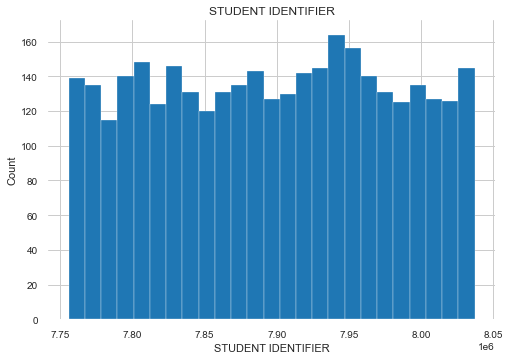

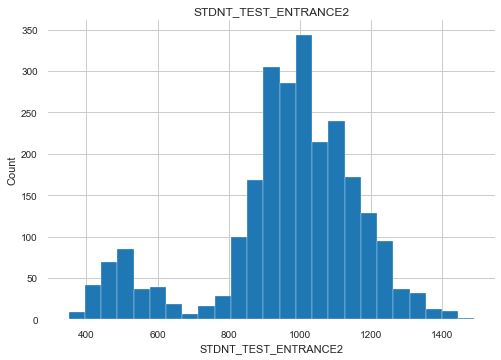

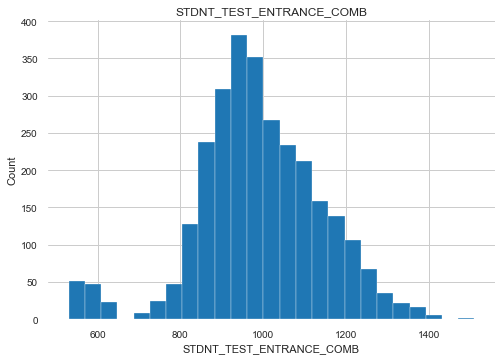

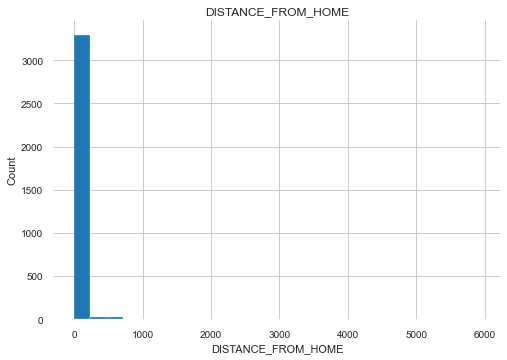

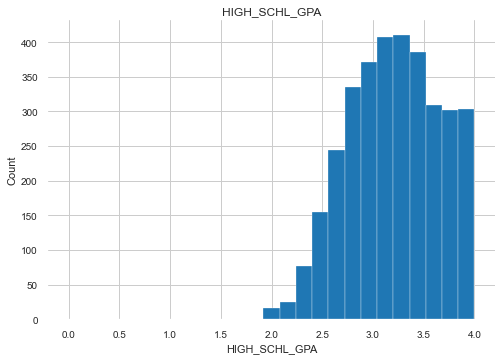

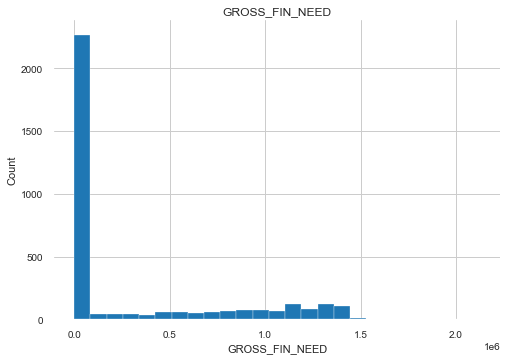

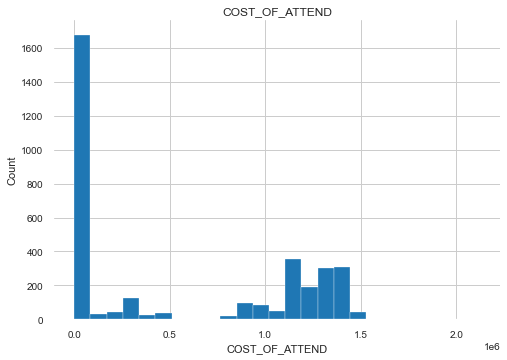

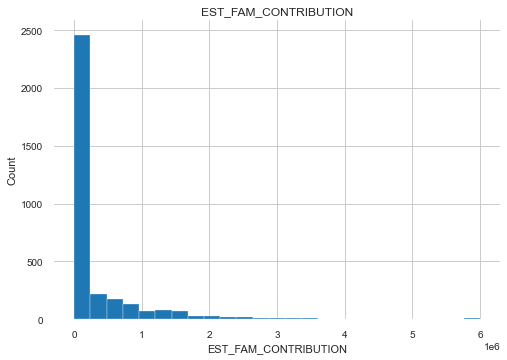

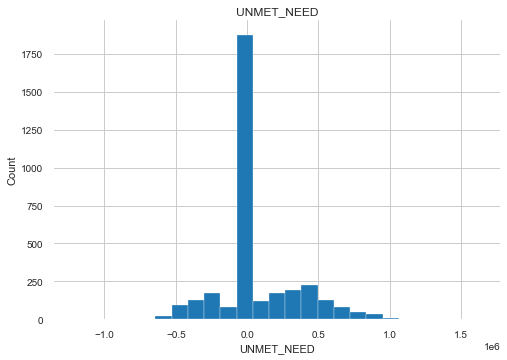

In [37]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data_copy[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [38]:
#outliers

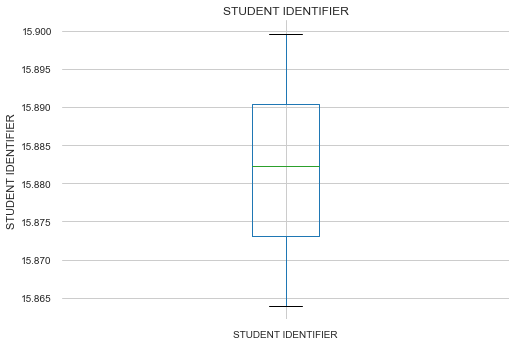

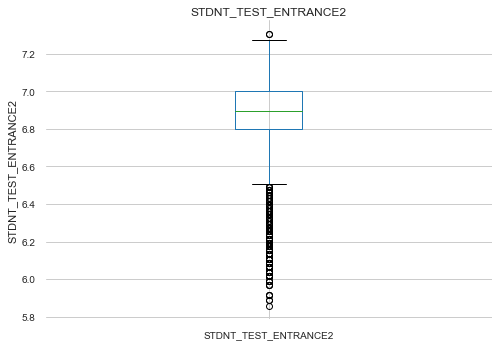

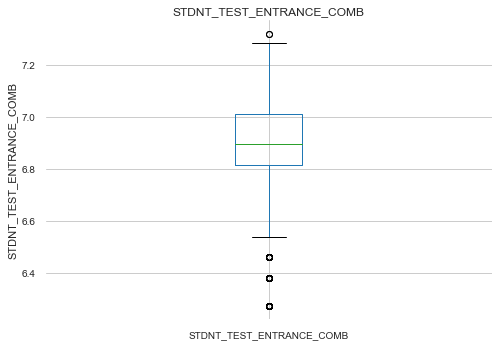

In [39]:
for feature in continuous_feature:
    #data=dataset.copy()
    if 0 in data_copy[feature].unique():
        pass
    else:
        data_copy[feature]=np.log(data_copy[feature])
        data_copy.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [40]:
#Categorical Variables

In [41]:
categorical_features=[feature for feature in data_copy.columns if data_copy[feature].dtypes=='O']
categorical_features

['STDNT_GENDER',
 'STDNT_BACKGROUND',
 'IN_STATE_FLAG',
 'INTERNATIONAL_STS',
 'STDNT_MAJOR',
 'STDNT_MINOR',
 'CORE_COURSE_NAME_1_F',
 'CORE_COURSE_GRADE_1_F',
 'CORE_COURSE_NAME_2_F',
 'CORE_COURSE_GRADE_2_F',
 'CORE_COURSE_NAME_3_F',
 'CORE_COURSE_GRADE_3_F',
 'CORE_COURSE_NAME_4_F',
 'CORE_COURSE_GRADE_4_F',
 'CORE_COURSE_NAME_5_F',
 'CORE_COURSE_GRADE_5_F',
 'CORE_COURSE_NAME_6_F',
 'CORE_COURSE_GRADE_6_F',
 'CORE_COURSE_NAME_1_S',
 'CORE_COURSE_GRADE_1_S',
 'CORE_COURSE_NAME_2_S',
 'CORE_COURSE_GRADE_2_S',
 'CORE_COURSE_NAME_3_S',
 'CORE_COURSE_GRADE_3_S',
 'CORE_COURSE_NAME_4_S',
 'CORE_COURSE_GRADE_4_S',
 'CORE_COURSE_NAME_5_S',
 'CORE_COURSE_GRADE_5_S',
 'CORE_COURSE_NAME_6_S',
 'CORE_COURSE_GRADE_6_S',
 'HOUSING_STS',
 'HIGH_SCHL_NAME',
 'FATHER_HI_EDU_DESC',
 'MOTHER_HI_EDU_DESC',
 'DEGREE_GROUP_CD',
 'DEGREE_GROUP_DESC']

In [42]:
#to find the number of levels for each category
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data_copy[feature].unique())))

The feature is STDNT_GENDER and number of categories are 2
The feature is STDNT_BACKGROUND and number of categories are 8
The feature is IN_STATE_FLAG and number of categories are 2
The feature is INTERNATIONAL_STS and number of categories are 2
The feature is STDNT_MAJOR and number of categories are 54
The feature is STDNT_MINOR and number of categories are 37
The feature is CORE_COURSE_NAME_1_F and number of categories are 69
The feature is CORE_COURSE_GRADE_1_F and number of categories are 7
The feature is CORE_COURSE_NAME_2_F and number of categories are 75
The feature is CORE_COURSE_GRADE_2_F and number of categories are 8
The feature is CORE_COURSE_NAME_3_F and number of categories are 75
The feature is CORE_COURSE_GRADE_3_F and number of categories are 7
The feature is CORE_COURSE_NAME_4_F and number of categories are 69
The feature is CORE_COURSE_GRADE_4_F and number of categories are 7
The feature is CORE_COURSE_NAME_5_F and number of categories are 54
The feature is CORE_COUR

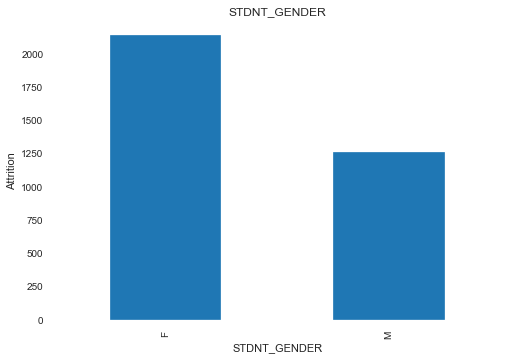

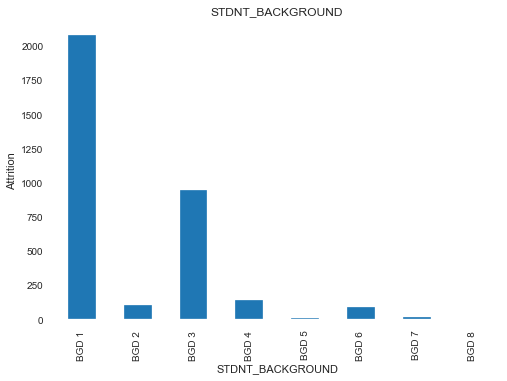

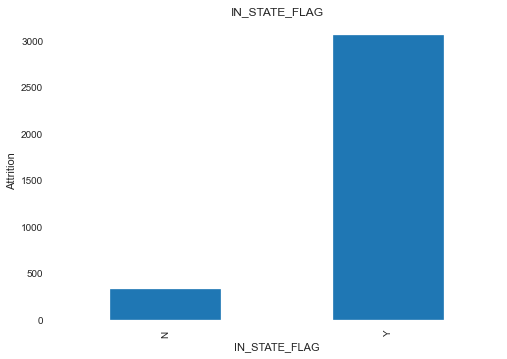

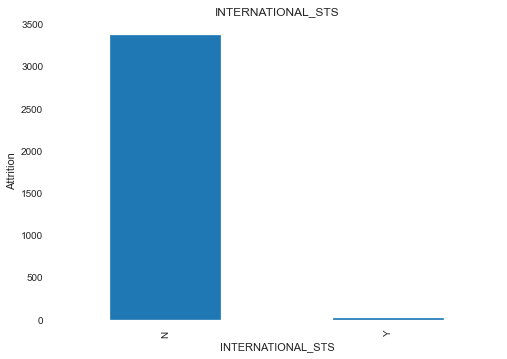

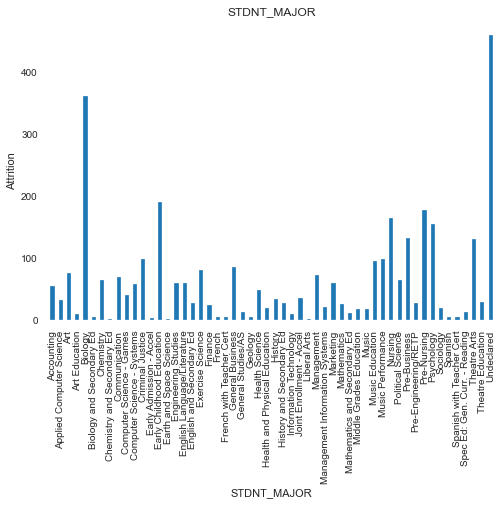

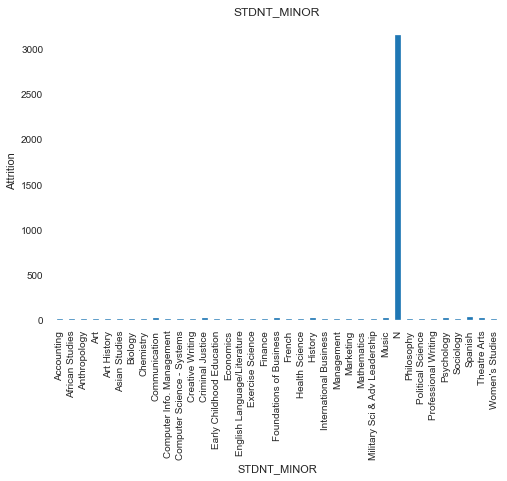

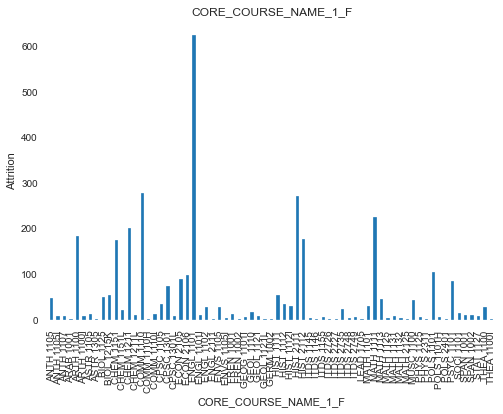

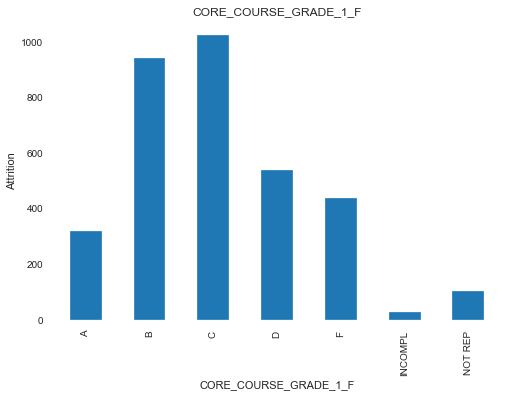

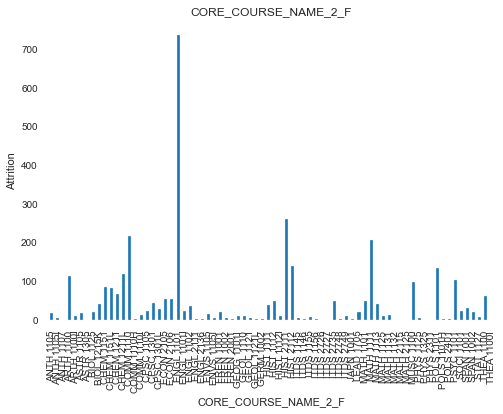

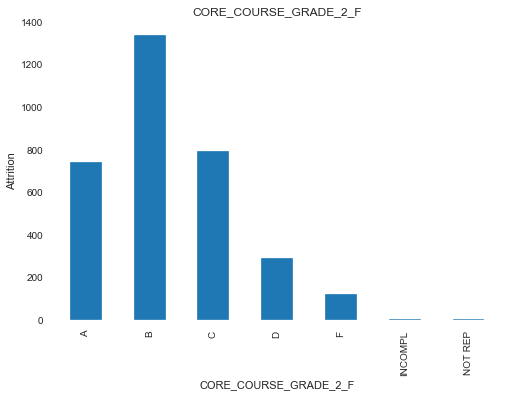

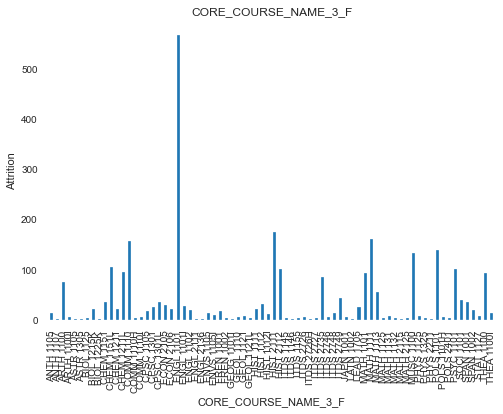

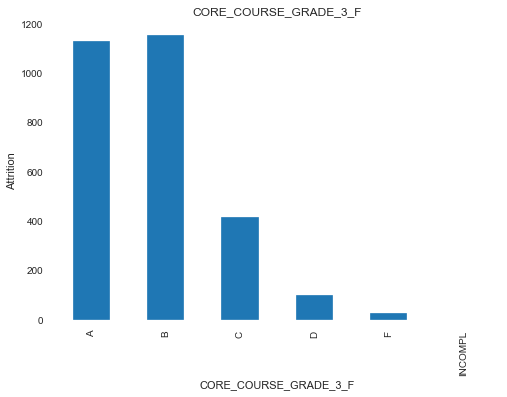

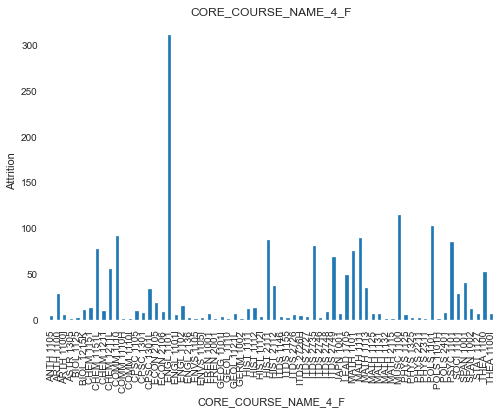

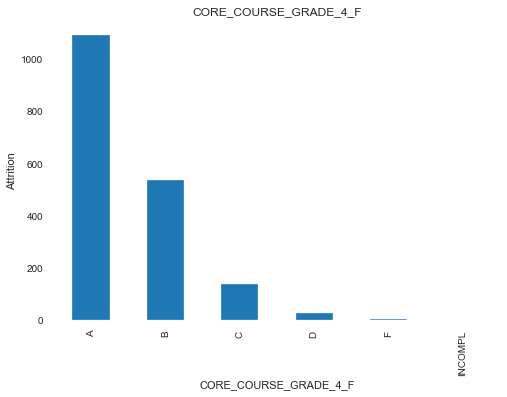

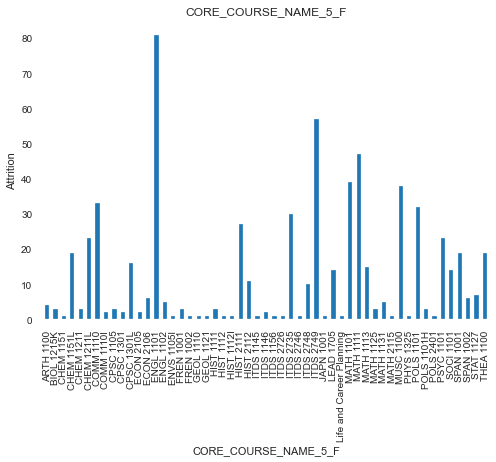

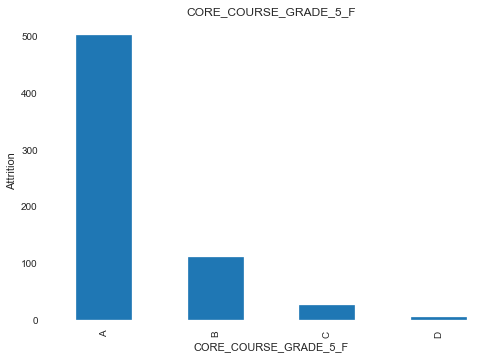

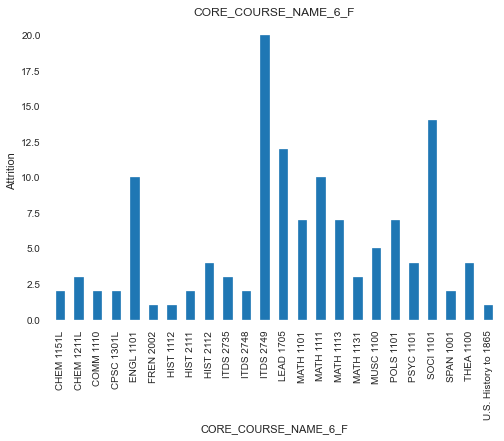

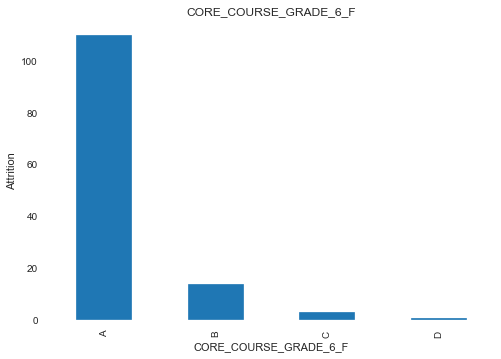

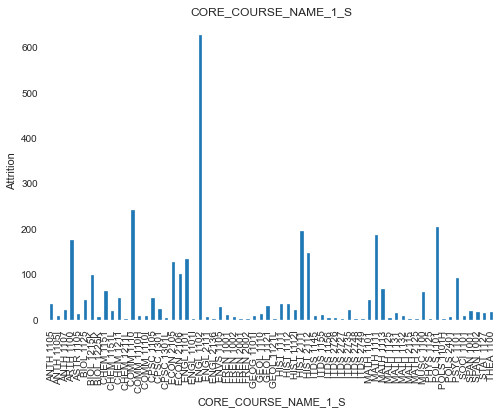

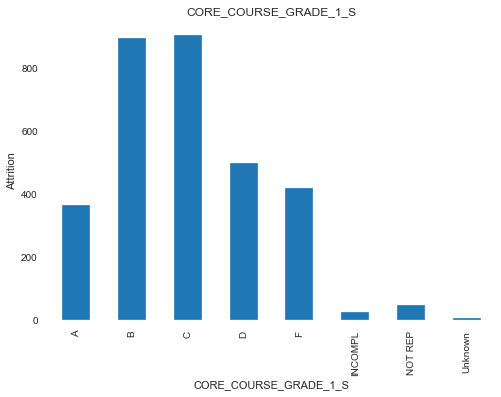

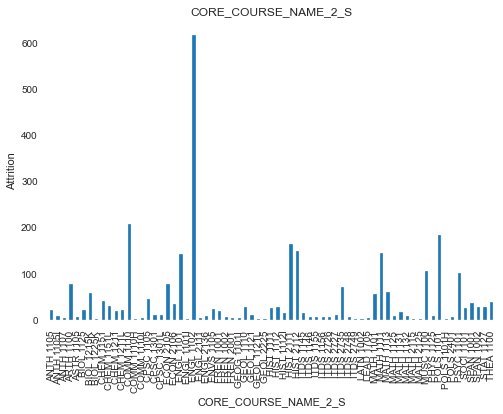

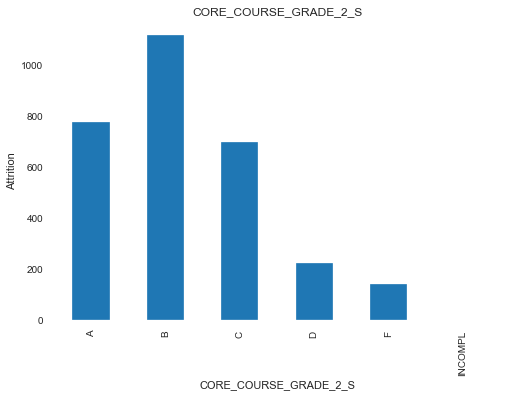

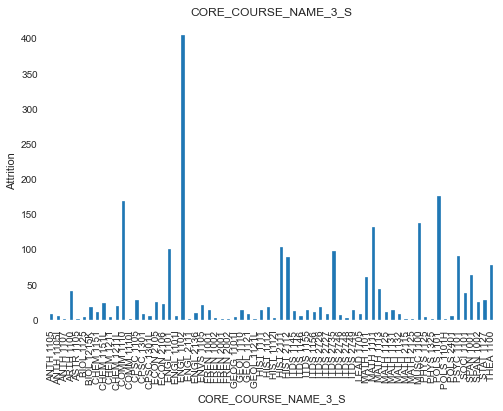

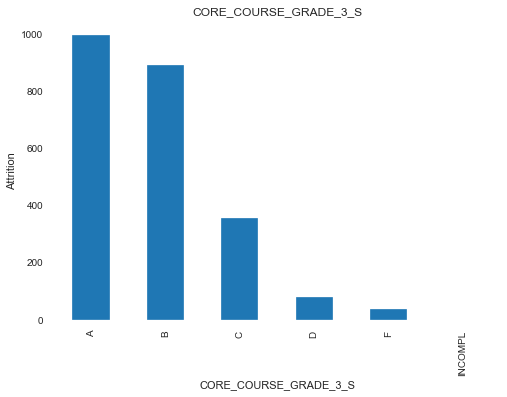

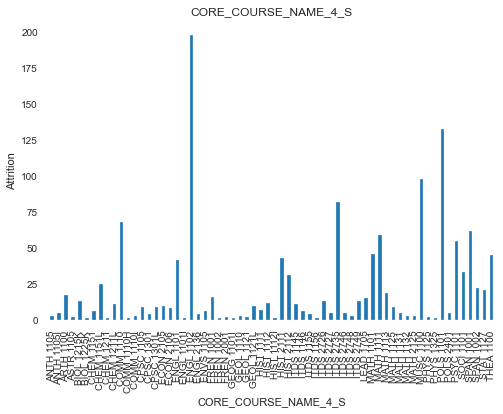

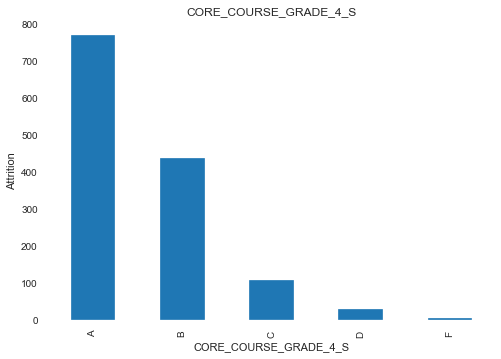

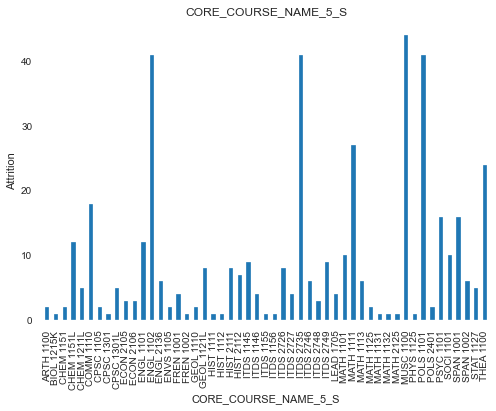

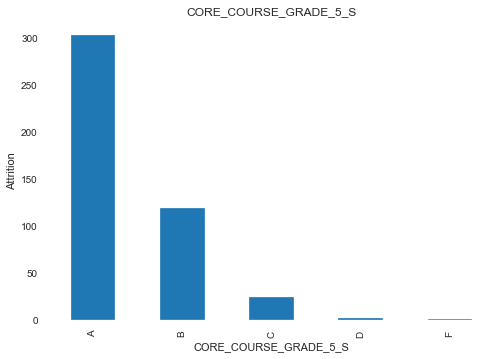

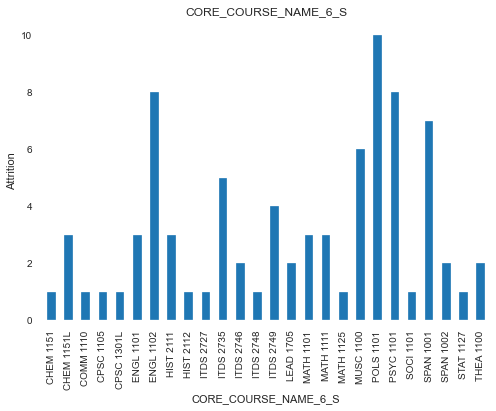

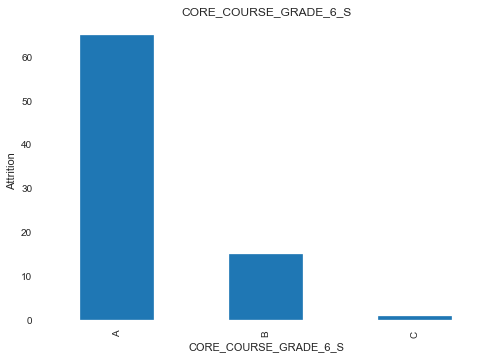

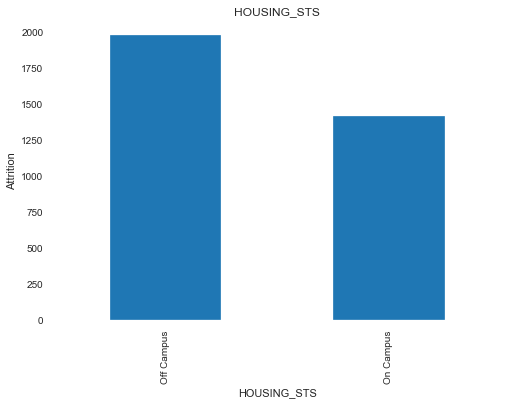

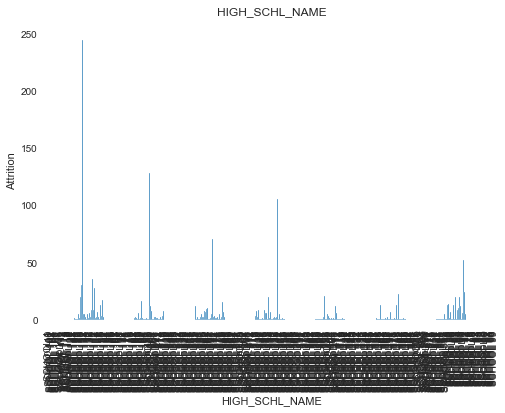

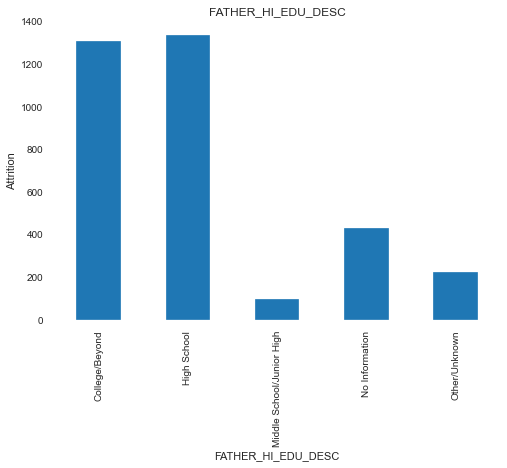

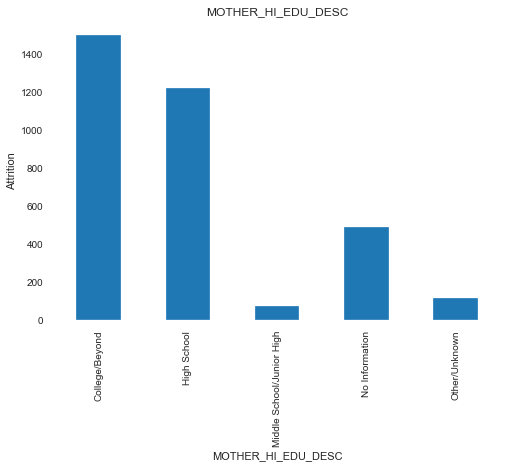

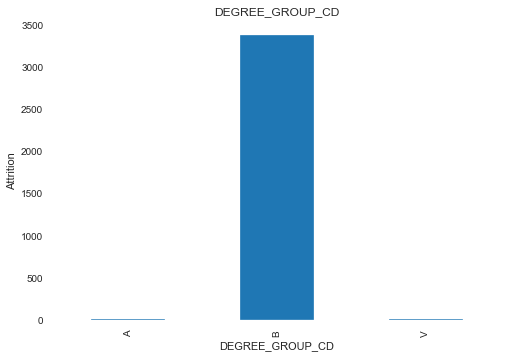

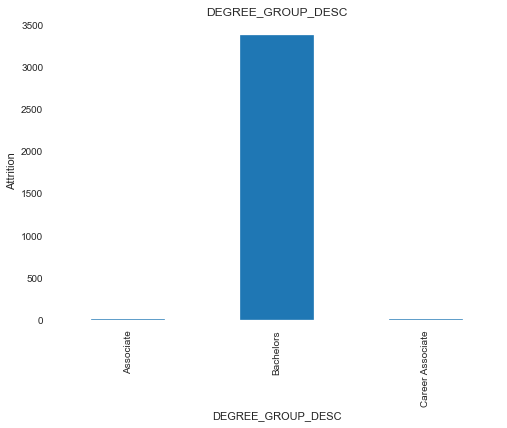

In [47]:
for feature in categorical_features:
    #data=dataset.copy()
    data_copy.groupby(feature)['ATTRITION'].count().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Attrition')
    #plt.figure(figsize=(30,8))
    #plt.xticks(size=15)
    #plt.yticks(size=15)
    #plt.xlabel(size=35)
    #plt.ylabel(size=35)
    plt.title(feature)
    plt.show()

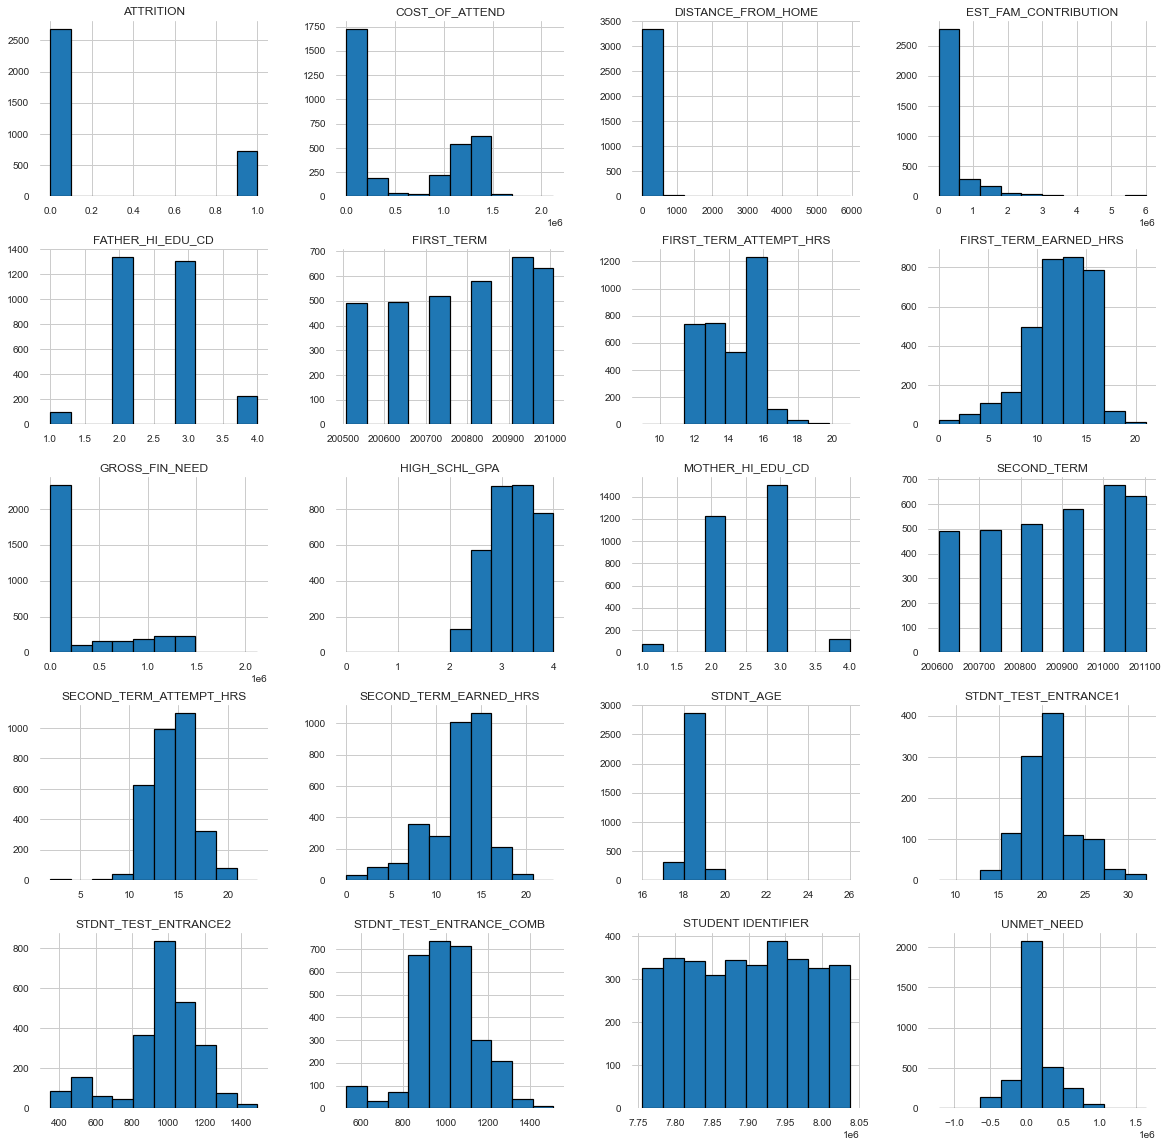

In [48]:
#visualize each variable
dat.hist(figsize=(20,20),edgecolor='black', linewidth=1.2)
plt.show()

#Feature engineering

In [49]:
#lets check for missing values
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dat.columns if dat[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dat[feature].isnull().mean(), 4),  ' % missing values')

STDNT_TEST_ENTRANCE1 0.6747  % missing values
STDNT_TEST_ENTRANCE2 0.2671  % missing values
STDNT_TEST_ENTRANCE_COMB 0.1524  % missing values
CORE_COURSE_NAME_2_F 0.0291  % missing values
CORE_COURSE_GRADE_2_F 0.0291  % missing values
CORE_COURSE_NAME_3_F 0.1662  % missing values
CORE_COURSE_GRADE_3_F 0.1662  % missing values
CORE_COURSE_NAME_4_F 0.4697  % missing values
CORE_COURSE_GRADE_4_F 0.4697  % missing values
CORE_COURSE_NAME_5_F 0.8103  % missing values
CORE_COURSE_GRADE_5_F 0.8103  % missing values
CORE_COURSE_NAME_6_F 0.9624  % missing values
CORE_COURSE_GRADE_6_F 0.9624  % missing values
CORE_COURSE_NAME_1_S 0.0462  % missing values
CORE_COURSE_GRADE_1_S 0.0682  % missing values
CORE_COURSE_NAME_2_S 0.1291  % missing values
CORE_COURSE_GRADE_2_S 0.1291  % missing values
CORE_COURSE_NAME_3_S 0.3053  % missing values
CORE_COURSE_GRADE_3_S 0.3053  % missing values
CORE_COURSE_NAME_4_S 0.6015  % missing values
CORE_COURSE_GRADE_4_S 0.6015  % missing values
CORE_COURSE_NAME_5_S 

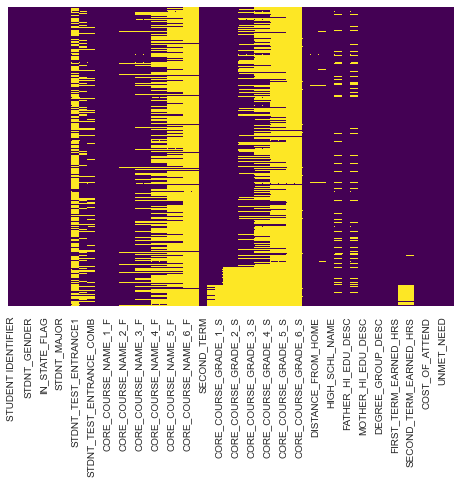

In [50]:
sns.heatmap(dat.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [51]:

## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dat.columns if dat[feature].isnull().sum()>1 and dat[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dat[feature].isnull().mean(),4)))

STDNT_TEST_ENTRANCE1: 0.6747% missing value
STDNT_TEST_ENTRANCE2: 0.2671% missing value
STDNT_TEST_ENTRANCE_COMB: 0.1524% missing value
DISTANCE_FROM_HOME: 0.0074% missing value
HIGH_SCHL_GPA: 0.0156% missing value
FATHER_HI_EDU_CD: 0.1271% missing value
MOTHER_HI_EDU_CD: 0.1438% missing value
SECOND_TERM_ATTEMPT_HRS: 0.0606% missing value
SECOND_TERM_EARNED_HRS: 0.0615% missing value


In [52]:
#dropping all values above 20%
#Now we need drop variable which are of avlues more than 20%
dat=dat.drop(["CORE_COURSE_GRADE_6_S","CORE_COURSE_NAME_6_S","CORE_COURSE_NAME_6_F","CORE_COURSE_GRADE_6_F","CORE_COURSE_NAME_5_S","CORE_COURSE_GRADE_5_S","CORE_COURSE_NAME_5_F","CORE_COURSE_GRADE_5_F","CORE_COURSE_NAME_4_S","CORE_COURSE_GRADE_4_S","CORE_COURSE_NAME_4_F","CORE_COURSE_GRADE_4_F","CORE_COURSE_NAME_3_S","CORE_COURSE_GRADE_3_S","CORE_COURSE_GRADE_3_F","CORE_COURSE_NAME_3_F","STDNT_TEST_ENTRANCE1","STDNT_TEST_ENTRANCE2"],axis=1)

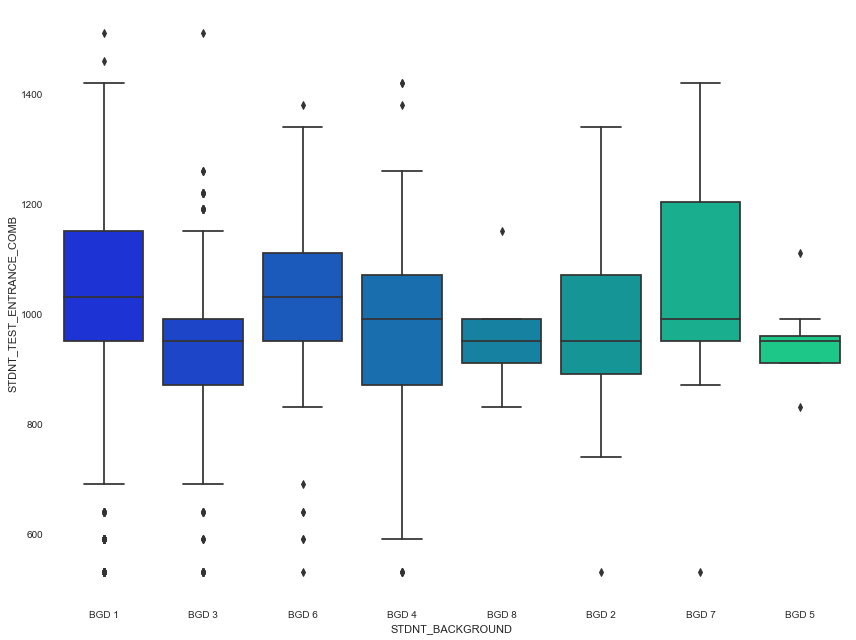

In [53]:

plt.figure(figsize=(12, 9))
sns.boxplot(x='STDNT_BACKGROUND',y='STDNT_TEST_ENTRANCE_COMB',data=dat,palette='winter')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=13
plt.tight_layout()
plt.show()

In [54]:
#With respect to background we can replace the missing values of entrance comb by the mean.
#or we can directly replace with the median

def impute_entcomb(cols):
    STDNT_TEST_ENTRANCE_COMB = cols[0]
    STDNT_BACKGROUND = cols[1]
    
    if pd.isnull(STDNT_TEST_ENTRANCE_COMB):

        if STDNT_BACKGROUND == 'BGD1':
            return 1030

        elif STDNT_BACKGROUND == 'BGD3':
            return 960
        
        elif STDNT_BACKGROUND == 'BGD6':
            return 1025
        
        elif STDNT_BACKGROUND == 'BGD4':
            return 980
        
        elif STDNT_BACKGROUND == 'BGD8':
            return 960
        
        elif STDNT_BACKGROUND == 'BGD2':
            return 960
        
        elif STDNT_BACKGROUND == 'BGD7':
            return 980

        else:
            return 970
    else:
        return STDNT_TEST_ENTRANCE_COMB

In [55]:
dat['STDNT_TEST_ENTRANCE_COMB'] = dat[['STDNT_TEST_ENTRANCE_COMB','STDNT_BACKGROUND']].apply(impute_entcomb,axis=1)

In [56]:
dat['CORE_COURSE_NAME_2_F'].fillna("Missing",inplace=True)
dat['CORE_COURSE_GRADE_2_F'].fillna(dat['CORE_COURSE_GRADE_2_F'].mode(),inplace=True)
dat['CORE_COURSE_NAME_1_S'].fillna("Missing",inplace=True)
dat['CORE_COURSE_GRADE_1_S'].fillna("C",inplace=True)
dat['CORE_COURSE_NAME_2_S'].fillna("Missing",inplace=True)
dat['CORE_COURSE_GRADE_2_S'].fillna("B",inplace=True)
dat['DISTANCE_FROM_HOME'].fillna(dat['DISTANCE_FROM_HOME'].median(),inplace=True)
dat['HIGH_SCHL_GPA'].fillna(3.2,inplace=True)
dat['HIGH_SCHL_NAME'].fillna("Missing",inplace=True)
dat['SECOND_TERM_ATTEMPT_HRS'].fillna(14,inplace=True)
dat['SECOND_TERM_EARNED_HRS'].fillna(13,inplace=True)

In [57]:
print(dat['MOTHER_HI_EDU_CD'].unique().tolist())
print(dat['FATHER_HI_EDU_CD'].unique().tolist())
print(dat['FATHER_HI_EDU_DESC'].unique().tolist())
print(dat['MOTHER_HI_EDU_DESC'].unique().tolist())

 

[nan, 3.0, 4.0, 2.0, 1.0]
[nan, 3.0, 2.0, 1.0, 4.0]
['No Information', 'College/Beyond', 'High School', 'Middle School/Junior High', 'Other/Unknown']
['No Information', 'College/Beyond', 'Other/Unknown', 'High School', 'Middle School/Junior High']


In [58]:
replace_map_eddes={'Middle School/Junior High':4,'College/Beyond':5,'High School':6,'Other/Unknown':7,'No Information':8}
replace_map_eddesm={'Middle School/Junior High':9,'College/Beyond':10,'High School':11,'Other/Unknown':12,'No Information':13}

In [59]:
dat.MOTHER_HI_EDU_DESC=dat.MOTHER_HI_EDU_DESC.map(replace_map_eddesm)
dat.FATHER_HI_EDU_DESC=dat.FATHER_HI_EDU_DESC.map(replace_map_eddes)
#we will remove the table code later as it had missing value

In [60]:
dat.head()

STUDENT IDENTIFIER  STDNT_AGE STDNT_GENDER STDNT_BACKGROUND IN_STATE_FLAG  \
0             7808615         18            F            BGD 1             Y   
1             7830063         19            F            BGD 1             N   
2             7847538         18            M            BGD 1             Y   
3             8006429         18            M            BGD 1             Y   
4             7962680         18            F            BGD 1             Y   

  INTERNATIONAL_STS  STDNT_MAJOR STDNT_MINOR  STDNT_TEST_ENTRANCE_COMB  \
0                 N   Undeclared           N                    1150.0   
1                 N   Undeclared           N                    1190.0   
2                 N  Mathematics           N                    1030.0   
3                 N   Undeclared           N                    1220.0   
4                 N          Art           N                    1190.0   

   FIRST_TERM CORE_COURSE_NAME_1_F CORE_COURSE_GRADE_1_F CORE_COURSE_NAME_2_F  \
0      200708            ANTH 1105                     A            ARTH 1100   
1      200808            ANTH 1105                     A            GERM 1002   
2      201008            ANTH 1105                     A            ENGL 1101   
3      200708            ANTH 1107                     A            COMM 1110   
4      200808            ANTH 1107                     A            ARTH 1100   

  CORE_COURSE_GRADE_2_F  SECOND_TERM CORE_COURSE_NAME_1_S  \
0                     A       200802            CHEM 1151   
1                     A       200902            ECON 2105   
2                     A       201102            ENGL 1102   
3                     A       200802            ENGL 1102   
4                     A       200902            COMM 1110   

  CORE_COURSE_GRADE_1_S CORE_COURSE_NAME_2_S CORE_COURSE_GRADE_2_S  \
0                     A           CHEM 1151L                     A   
1                     A            ENGL 1102                     A   
2                     A            ENVS 1105                     A   
3                     A            HIST 2112                     A   
4                     A            ENGL 1101                     A   

  HOUSING_STS  DISTANCE_FROM_HOME  HIGH_SCHL_GPA HIGH_SCHL_NAME  \
0   On Campus               150.0           4.00      SCHOOL 50   
1  Off Campus                69.0           2.89     SCHOOL 389   
2   On Campus               150.0           3.39      SCHOOL 82   
3   On Campus               150.0           2.93     SCHOOL 180   
4  Off Campus                69.0           3.86       SCHOOL 2   

   FATHER_HI_EDU_CD  FATHER_HI_EDU_DESC  MOTHER_HI_EDU_CD  MOTHER_HI_EDU_DESC  \
0               NaN                   8               NaN                  13   
1               3.0                   5               3.0                  10   
2               2.0                   6               4.0                  12   
3               3.0                   5               3.0                  10   
4               3.0                   5               2.0                  11   

  DEGREE_GROUP_CD DEGREE_GROUP_DESC  FIRST_TERM_ATTEMPT_HRS  \
0               B         Bachelors                      16   
1               B         Bachelors                      18   
2               B         Bachelors                      15   
3               B         Bachelors                      13   
4               B         Bachelors                      12   

   FIRST_TERM_EARNED_HRS  SECOND_TERM_ATTEMPT_HRS  SECOND_TERM_EARNED_HRS  \
0                     16                     14.0                    14.0   
1                     18                     18.0                    18.0   
2                     15                     14.0                    14.0   
3                     13                     14.0                    14.0   
4                     12                     12.0                    12.0   

   GROSS_FIN_NEED  COST_OF_ATTEND  EST_FAM_CONTRIBUTION  UNMET_NEED  A

In [61]:
dat=dat.drop(['MOTHER_HI_EDU_CD'],axis=1)
#dat['MOTHER_HI_EDU_CD'].fillna(3,inplace=True)#since this column is same as the description column which doesnt have missing values,
#we can drop this column

In [62]:
dat=dat.drop(['FATHER_HI_EDU_CD'],axis=1)
#dat['FATHER_HI_EDU_CD'].fillna(2,inplace=True) #since this column is same as the description column which doesnt have missing values,
#we can drop this column instaead of simply replacing with the median

In [63]:

#Check if there is any duplicate

dat[dat.duplicated()].count()

STUDENT IDENTIFIER          0
STDNT_AGE                   0
STDNT_GENDER                0
STDNT_BACKGROUND            0
IN_STATE_FLAG               0
INTERNATIONAL_STS           0
STDNT_MAJOR                 0
STDNT_MINOR                 0
STDNT_TEST_ENTRANCE_COMB    0
FIRST_TERM                  0
CORE_COURSE_NAME_1_F        0
CORE_COURSE_GRADE_1_F       0
CORE_COURSE_NAME_2_F        0
CORE_COURSE_GRADE_2_F       0
SECOND_TERM                 0
CORE_COURSE_NAME_1_S        0
CORE_COURSE_GRADE_1_S       0
CORE_COURSE_NAME_2_S        0
CORE_COURSE_GRADE_2_S       0
HOUSING_STS                 0
DISTANCE_FROM_HOME          0
HIGH_SCHL_GPA               0
HIGH_SCHL_NAME              0
FATHER_HI_EDU_DESC          0
MOTHER_HI_EDU_DESC          0
DEGREE_GROUP_CD             0
DEGREE_GROUP_DESC           0
FIRST_TERM_ATTEMPT_HRS      0
FIRST_TERM_EARNED_HRS       0
SECOND_TERM_ATTEMPT_HRS     0
SECOND_TERM_EARNED_HRS      0
GROSS_FIN_NEED              0
COST_OF_ATTEND              0
EST_FAM_CO

#OUTLIER DETECTION


In [64]:
#WE SHALL USE ZSCORE AND ALSO SEE WITH INTERQUATILE RANGE TO DETECT THE SAME for one variable.
DFH=dat['DISTANCE_FROM_HOME']
outliers=[]
def detect_outliers_distfh(dfh):
    
    threshold=3
    mean = np.mean(dfh)
    std =np.std(dfh)
    
    
    for i in dfh:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

outlier_pt=detect_outliers_distfh(DFH)

outlier_pt

[4501.0,
 997.0,
 1854.0,
 5932.0,
 5932.0,
 5932.0,
 871.0,
 1270.0,
 2221.0,
 997.0,
 1735.0,
 1078.0,
 4501.0,
 1222.0,
 1161.0,
 1001.0,
 919.0,
 2203.0,
 1216.0,
 871.0]

In [65]:
dfh_c=dat['DISTANCE_FROM_HOME']

In [66]:

from scipy import stats
zscore = np.abs(stats.zscore(dfh_c))
print(zscore)

[0.21510522 0.13058951 0.21510522 ... 0.04096495 0.4250702  0.13058951]


In [67]:
threshold = 3
print(np.where(zscore > 3))

(array([  10,   70,  350,  528,  738, 1334, 1432, 1662, 1764, 1829, 2027,
       2098, 2248, 2416, 3061, 3199, 3214, 3293, 3390, 3395], dtype=int64),)


In [68]:
print(zscore[10])#just to check

18.784460311941523


In [69]:
print("Skewness: %f" % dat['DISTANCE_FROM_HOME'].skew())
print("Kurtosis: %f" % dat['DISTANCE_FROM_HOME'].kurt())

Skewness: 18.506998
Kurtosis: 416.387034


In [70]:
dat.loc[[10,70],['DISTANCE_FROM_HOME']]

DISTANCE_FROM_HOME
10              4501.0
70               997.0

In [71]:
#lets also do interquantile method to find the outliers

In [72]:
#Lets sort the variables first
DFH=sorted(DFH)

In [73]:
quantile1, quantile3= np.percentile(DFH,[25,75])

In [74]:
print(quantile1,quantile3)

69.0 138.0


In [75]:
## Find the IQR

iqr_value=quantile3-quantile1
print(iqr_value)

69.0


In [76]:
## Find the lower bound value and the higher bound value

lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value)

In [77]:
print(lower_bound_val,upper_bound_val)

-34.5 241.5


In [78]:

dfh_c1=dat['DISTANCE_FROM_HOME']
Q1 = dfh_c1.quantile(0.25)
Q3 = dfh_c1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


69.0


In [79]:
#print(dfh_c1 < (Q1 - 1.5 * IQR)) | (dfh_c1 > (Q3 + 1.5 * IQR))

In [80]:
#based on z-score we shall drop the outliers

In [81]:
dat.drop([  10,   70,  350,  528,  738, 1334, 1432, 1662, 1764, 1829, 2027,
       2098, 2248, 2416, 3061, 3199, 3214, 3293, 3390, 3395],0,inplace=True)

In [82]:

dat.shape

(3380, 36)

{'whiskers': [<matplotlib.lines.Line2D at 0x273cda21dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x273cda2f518>,
 'boxes': [<matplotlib.lines.Line2D at 0x273cda21c50>],
 'medians': [<matplotlib.lines.Line2D at 0x273cda2fc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x273cda23080>],
 'means': []}

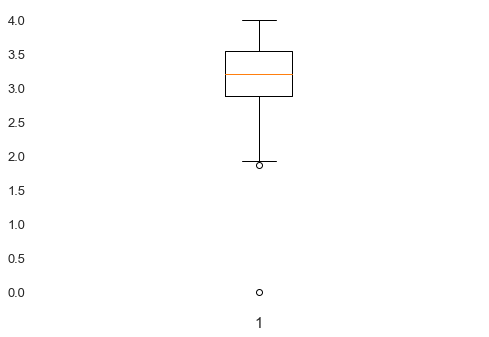

In [83]:

plt.boxplot(dat['HIGH_SCHL_GPA'])

In [84]:
print("Skewness: %f" % dat['HIGH_SCHL_GPA'].skew())
print("Kurtosis: %f" % dat['HIGH_SCHL_GPA'].kurt())

Skewness: -0.244552
Kurtosis: 0.045555


In [85]:
HSGPA=dat['HIGH_SCHL_GPA']
outliers=[]
def detect_outliers_HSG(hsgpa):
    
    threshold=3
    mean = np.mean(hsgpa)
    std =np.std(hsgpa)
    
    
    for i in hsgpa:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

outlier_hsgpa=detect_outliers_HSG(HSGPA)
outlier_hsgpa

[0.0]

In [86]:
HSGPA_c=dat['HIGH_SCHL_GPA']
from scipy import stats
zscore = np.abs(stats.zscore(HSGPA_c))
print(zscore)

[1.76916882 0.69424639 0.4154001  ... 0.98275447 0.79267991 1.27126256]


In [87]:
threshold = 3
print(np.where(zscore > 3))

(array([2801], dtype=int64),)


In [88]:

#we shall replace the outlier with median
dat["HIGH_SCHL_GPA"].replace({0:3.2}, inplace=True)

In [89]:
#tocheck

dat['HIGH_SCHL_GPA'][2815]

3.2

Skewness: 0.380631
Kurtosis: -0.321968


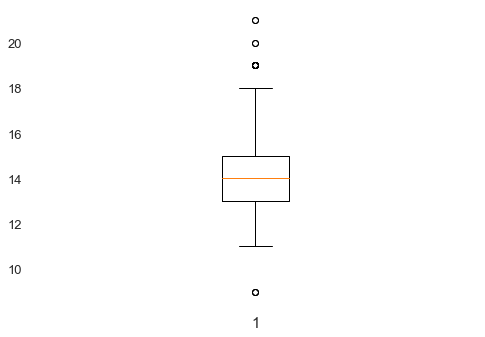

In [90]:
plt.boxplot(dat['FIRST_TERM_ATTEMPT_HRS'])
print("Skewness: %f" % dat['FIRST_TERM_ATTEMPT_HRS'].skew())
print("Kurtosis: %f" % dat['FIRST_TERM_ATTEMPT_HRS'].kurt())

In [91]:

FTAH=dat['FIRST_TERM_ATTEMPT_HRS']
outliers=[]
def detect_outliers_FTAH(ftah):
    
    threshold=3
    mean = np.mean(ftah)
    std =np.std(ftah)
    
    
    for i in ftah:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [92]:
outlier_ftah=detect_outliers_FTAH(FTAH)
outlier_ftah

[19, 20, 21, 21, 9, 19, 19, 20, 19, 9, 19, 19, 9, 19, 19, 19, 19]

In [93]:
FTAH_c=dat['FIRST_TERM_ATTEMPT_HRS']
from scipy import stats
zscore = np.abs(stats.zscore(FTAH_c))
print(zscore)

[1.29949795 2.58756337 0.65546524 ... 0.01143253 1.27663289 1.27663289]


In [94]:

threshold = 3
print(np.where(zscore > 3))

(array([ 390,  654,  660,  951,  993, 1295, 1487, 2035, 2401, 2521, 2581,
       2879, 2897, 3036, 3088, 3159, 3192], dtype=int64),)


Skewness: -0.903979
Kurtosis: 1.152388


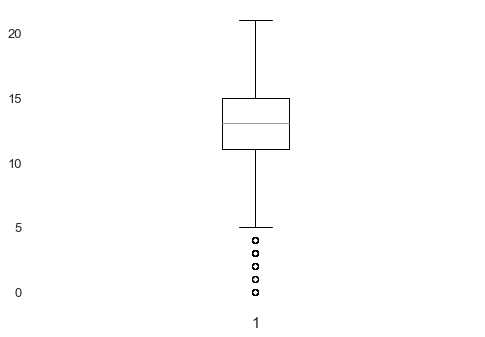

In [95]:
plt.boxplot(dat['FIRST_TERM_EARNED_HRS'])
print("Skewness: %f" % dat['FIRST_TERM_EARNED_HRS'].skew())
print("Kurtosis: %f" % dat['FIRST_TERM_EARNED_HRS'].kurt())

In [96]:

FTEH=dat['FIRST_TERM_EARNED_HRS']
outliers=[]
def detect_outliers_FTEH(fteh):
    
    threshold=3
    mean = np.mean(fteh)
    std =np.std(fteh)
    
    
    for i in fteh:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

outlier_fteh=detect_outliers_FTEH(FTEH)
outlier_fteh


[0,
 2,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 2,
 3,
 0,
 2,
 3,
 3,
 2,
 0,
 3,
 2,
 3,
 1,
 3,
 3,
 2,
 3,
 1,
 3,
 0,
 3,
 3,
 1,
 3,
 3,
 3,
 2,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 0,
 3]

In [97]:
FTEH_c=dat['FIRST_TERM_EARNED_HRS']
from scipy import stats
zscore = np.abs(stats.zscore(FTEH_c))
print(zscore)

[1.2723985  1.94239491 0.9374003  ... 2.07758354 1.07258892 1.07258892]


In [98]:
threshold = 3
print(np.where(zscore > 3))

(array([ 741,  761, 1691, 1693, 1696, 1707, 1817, 1818, 1870, 2119, 2177,
       2182, 2393, 2408, 2409, 2426, 2429, 2513, 2552, 2667, 2760, 2769,
       2772, 2773, 2825, 2884, 2885, 2891, 2903, 2904, 2905, 2908, 2915,
       2923, 2933, 2934, 2945, 3135, 3147, 3148, 3149, 3248, 3344, 3353,
       3357, 3358, 3359, 3361, 3363, 3368, 3369, 3373, 3374, 3375],
      dtype=int64),)


Skewness: -0.148665
Kurtosis: 2.076476


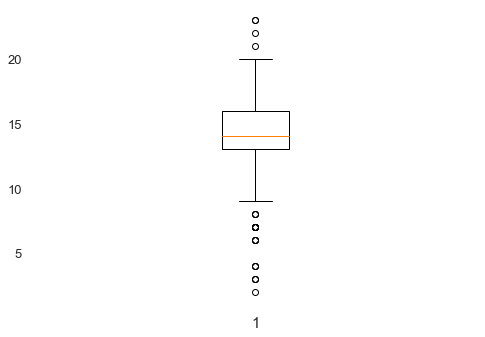

In [99]:
plt.boxplot(dat['SECOND_TERM_ATTEMPT_HRS'])
print("Skewness: %f" % dat['SECOND_TERM_ATTEMPT_HRS'].skew())
print("Kurtosis: %f" % dat['SECOND_TERM_ATTEMPT_HRS'].kurt())

In [100]:
STAH=dat['SECOND_TERM_ATTEMPT_HRS']
outliers=[]
def detect_outliers_STAH(stah):
    
    threshold=3
    mean = np.mean(stah)
    std =np.std(stah)
    
    
    for i in stah:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers


outlier_stah=detect_outliers_STAH(STAH)
outlier_stah

[7.0,
 6.0,
 21.0,
 7.0,
 23.0,
 7.0,
 22.0,
 8.0,
 23.0,
 4.0,
 7.0,
 8.0,
 7.0,
 7.0,
 6.0,
 8.0,
 7.0,
 4.0,
 4.0,
 7.0,
 6.0,
 6.0,
 3.0,
 3.0,
 3.0,
 2.0]

In [101]:
STAH_c=dat['SECOND_TERM_ATTEMPT_HRS']
from scipy import stats
zscore = np.abs(stats.zscore(STAH_c))
print(zscore)

[0.13108399 1.83154668 0.13108399 ... 0.13108399 0.13108399 0.62174165]


In [102]:
threshold = 3
print(np.where(zscore > 3))
#HERE WE CANNOT REMOVE ANY VALUES AS THEY HAVE ALSO EARNED THE SAME HRS LATER SO THEY CANNNOT BE TAKEN AS OUTLIERS

(array([  39,  274,  324,  515,  654,  754, 1482, 1610, 1712, 2042, 2382,
       2529, 2549, 2761, 2850, 3070, 3073, 3104, 3105, 3129, 3136, 3139,
       3173, 3208, 3296, 3364], dtype=int64),)


Skewness: 1.227071
Kurtosis: -0.109694


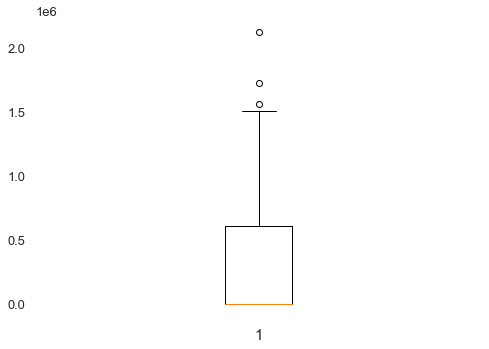

In [103]:

plt.boxplot(dat['GROSS_FIN_NEED'])

print("Skewness: %f" % dat['GROSS_FIN_NEED'].skew())
print("Kurtosis: %f" % dat['GROSS_FIN_NEED'].kurt())

In [104]:

GFN=dat['GROSS_FIN_NEED']
outliers=[]
def detect_outliers_GFN(gfn):
    
    threshold=3
    mean = np.mean(gfn)
    std =np.std(gfn)
    
    
    for i in gfn:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

outlier_gfn=detect_outliers_GFN(GFN)
outlier_gfn

[2124900]

In [105]:
GFN_c=dat['GROSS_FIN_NEED']
from scipy import stats
zscore = np.abs(stats.zscore(GFN_c))
print(zscore)

[0.62860491 0.55132092 0.62860491 ... 0.62860491 0.62860491 0.62860491]


In [106]:

threshold = 3
print(np.where(zscore > 3))

(array([2851], dtype=int64),)


Skewness: 0.342091
Kurtosis: -1.718132


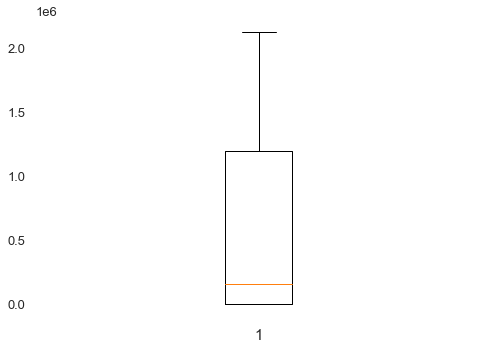

In [107]:
plt.boxplot(dat['COST_OF_ATTEND'])

print("Skewness: %f" % dat['COST_OF_ATTEND'].skew())
print("Kurtosis: %f" % dat['COST_OF_ATTEND'].kurt())

In [108]:
COA=dat['COST_OF_ATTEND']
outliers=[]
def detect_outliers_COA(coa):
    
    threshold=3
    mean = np.mean(coa)
    std =np.std(coa)
    
    
    for i in coa:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

outlier_coa=detect_outliers_COA(COA)
outlier_coa

[]

In [109]:

COA_c=dat['COST_OF_ATTEND']
from scipy import stats
zscore = np.abs(stats.zscore(COA_c))
print(zscore)

[0.90993729 1.32797269 0.90993729 ... 0.65133076 0.46574246 0.90993729]


In [110]:

threshold = 3
print(np.where(zscore > 3))

(array([], dtype=int64),)


Skewness: 3.833951
Kurtosis: 18.677504


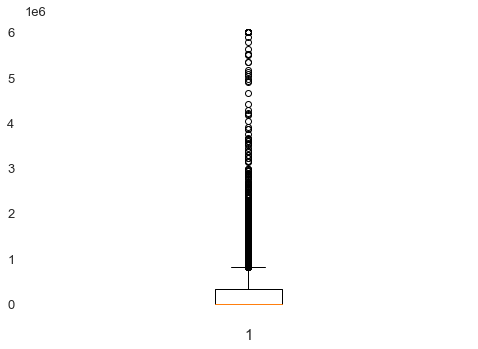

In [111]:
plt.boxplot(dat['EST_FAM_CONTRIBUTION'])
print("Skewness: %f" % dat['EST_FAM_CONTRIBUTION'].skew())
print("Kurtosis: %f" % dat['EST_FAM_CONTRIBUTION'].kurt())

In [112]:

EFC=dat['EST_FAM_CONTRIBUTION']
outliers=[]
def detect_outliers_EFC(efc):
    
    threshold=3
    mean = np.mean(efc)
    std =np.std(efc)
    
    
    for i in efc:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

outlier_efc=detect_outliers_EFC(EFC)
outlier_efc

[5163240,
 5328600,
 2970000,
 3149520,
 2852940,
 5619180,
 3627240,
 3507000,
 3441900,
 5115540,
 3519840,
 3224880,
 2953380,
 4166340,
 4031040,
 3373620,
 3857880,
 5329500,
 3653100,
 4210680,
 3379260,
 2832720,
 3904380,
 2808660,
 5999940,
 5999940,
 4891560,
 3636780,
 5999940,
 5999940,
 3359220,
 5999940,
 4187100,
 5074800,
 2771760,
 5781960,
 3544140,
 3220260,
 4952700,
 5999940,
 3593700,
 3735720,
 3847440,
 3581940,
 2747700,
 3124320,
 2924820,
 5510040,
 2852340,
 3140160,
 5512800,
 5999940,
 5999940,
 4417440,
 2894520,
 2793360,
 4657140,
 5999940,
 5498640,
 3280320,
 5999940,
 5999940,
 4922820,
 5999940,
 3291240,
 2890860,
 2967480,
 5877360,
 4268400,
 5017740,
 3631800,
 2925960,
 2973720]

In [113]:

EFC_c=dat['EST_FAM_CONTRIBUTION']
from scipy import stats
zscore = np.abs(stats.zscore(EFC_c))
print(zscore)

[0.43701759 0.56266394 0.43701759 ... 1.20288455 0.43701759 0.43701759]


In [114]:
threshold = 3
print(np.where(zscore > 3))

(array([  10,   21,  122,  124,  131,  148,  149,  165,  174,  219,  227,
        261,  361,  474,  485,  585,  628,  658,  659,  721,  768,  823,
        826,  840,  843,  867,  905,  972,  981,  996, 1007, 1011, 1063,
       1108, 1137, 1141, 1146, 1168, 1176, 1238, 1248, 1335, 1362, 1405,
       1441, 1791, 1794, 1913, 1950, 1972, 2009, 2024, 2088, 2144, 2148,
       2345, 2373, 2522, 2552, 2615, 2719, 2822, 2956, 2959, 2987, 2994,
       3070, 3087, 3108, 3133, 3180, 3194, 3318], dtype=int64),)


Skewness: 0.623620
Kurtosis: 1.543432


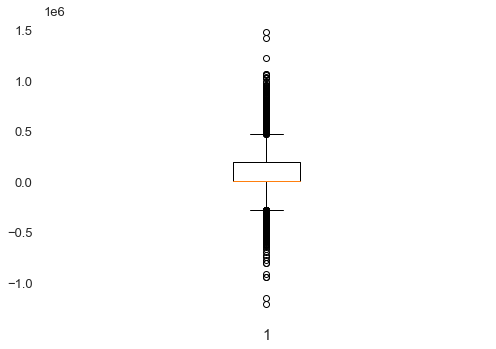

In [115]:

plt.boxplot(dat['UNMET_NEED'])

print("Skewness: %f" % dat['UNMET_NEED'].skew())
print("Kurtosis: %f" % dat['UNMET_NEED'].kurt())


In [116]:
UN=dat['UNMET_NEED']
outliers=[]
def detect_outliers_UN(un):
    
    threshold=3
    mean = np.mean(un)
    std =np.std(un)
    
    
    for i in un:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

outlier_un=detect_outliers_UN(UN)
outlier_un

[-921300.0,
 1216980.0,
 946920.0,
 919740.0,
 -1157640.0,
 -781440.0,
 917820.0,
 983640.0,
 -1212072.0,
 -948120.0,
 -948120.0,
 -809160.0,
 946260.0,
 944040.0,
 1059480.0,
 944040.0,
 987300.0,
 936600.0,
 917160.0,
 954060.0,
 927840.0,
 -813720.0,
 1055280.0,
 1059480.0,
 1478400.0,
 949560.0,
 1017780.0,
 1027560.0,
 1017480.0,
 1414320.0]

In [117]:

UN_c=dat['UNMET_NEED']
from scipy import stats
zscore = np.abs(stats.zscore(UN_c))
print(zscore)

[0.25801119 1.39107034 0.25801119 ... 0.25801119 1.08998413 0.25801119]


In [118]:
threshold = 3
print(np.where(zscore > 3))

(array([  32,   98,  313,  468,  540,  660,  671,  705,  827,  951, 1038,
       1347, 1411, 1660, 1662, 1678, 1951, 1995, 2042, 2381, 2696, 2710,
       2753, 2796, 2851, 3103, 3136, 3257, 3302, 3335], dtype=int64),)


In [119]:
#we will keep these values as the unmet needs can be positive or negative.(as disucussed)

In [120]:
#encoding the variables.
#for unmet needs we shall replace the positive numbers as 1, negative numbers as 2 

In [121]:
dat['UNMET_NEED'][dat['UNMET_NEED']>0]=1
dat['UNMET_NEED'][dat['UNMET_NEED']<0]=2
dat['UNMET_NEED'][dat['UNMET_NEED']==0]=0



In [122]:
#lets visualise the variables

In [123]:
CATEGORICAL_COLUMNS = ["STDNT_GENDER", "STDNT_BACKGROUND", "IN_STATE_FLAG", "INTERNATIONAL_STS","STDNT_MAJOR","STDNT_MINOR","HOUSING_STS","HIGH_SCHL_NAME","FATHER_HI_EDU_DESC","MOTHER_HI_EDU_DESC","DEGREE_GROUP_CD","DEGREE_GROUP_DESC","CORE_COURSE_NAME_1_F","CORE_COURSE_GRADE_1_F","CORE_COURSE_NAME_2_F","CORE_COURSE_GRADE_2_F","CORE_COURSE_NAME_1_S","CORE_COURSE_GRADE_1_S","CORE_COURSE_NAME_2_S","CORE_COURSE_GRADE_2_S"]

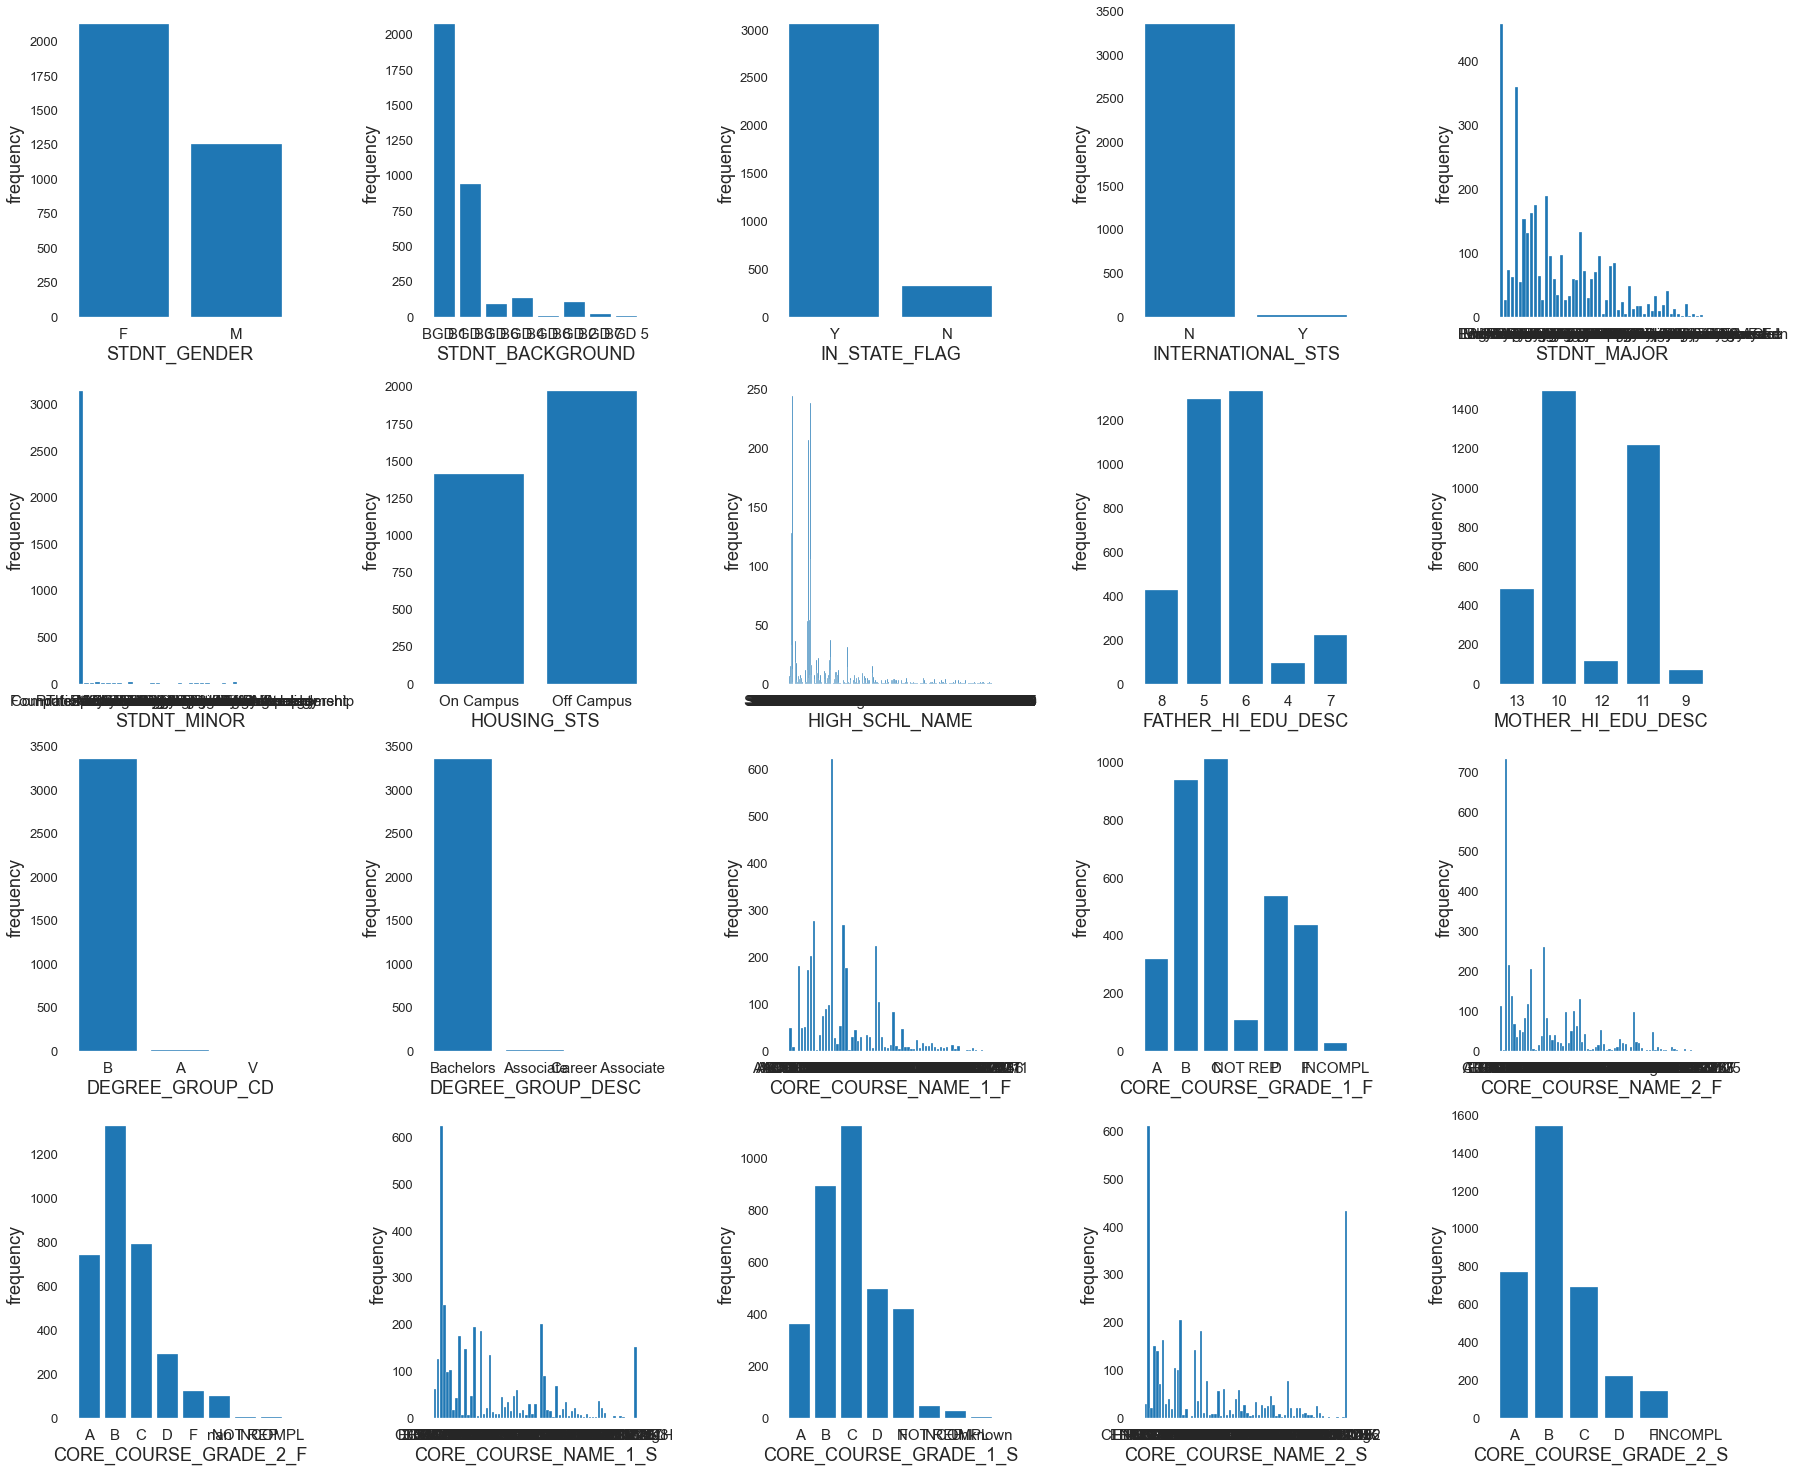

In [124]:

def plot_categoricals(dat):
    ncols = len(dat.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(dat.columns):
        cnt = Counter(dat[col])
        keys = list(cnt.keys())
        vals = list(cnt.values())
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.bar(range(len(keys)), vals, align="center")
        plt.xticks(range(len(keys)), keys)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_categoricals(dat[CATEGORICAL_COLUMNS])

In [125]:

CONTINUOUS_COLUMNS1= ["STUDENT IDENTIFIER", "STDNT_AGE", "FIRST_TERM", "SECOND_TERM","ATTRITION","FIRST_TERM_ATTEMPT_HRS","FIRST_TERM_EARNED_HRS","GROSS_FIN_NEED","COST_OF_ATTEND","EST_FAM_CONTRIBUTION"]

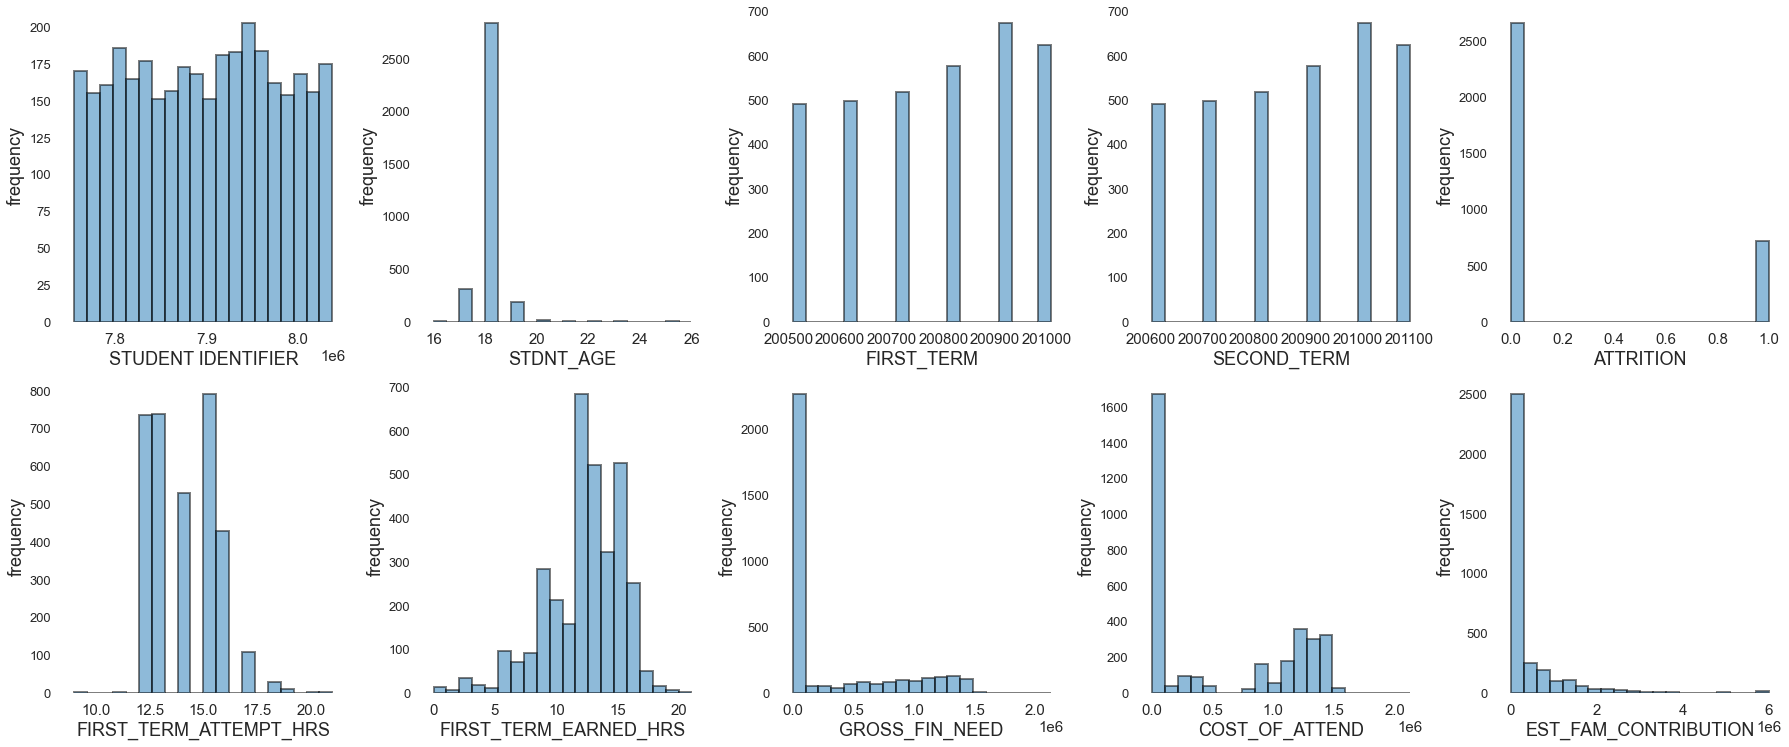

In [126]:
def plot_histgrams(dat):
    ncols = len(dat.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(dat.columns):
        X = dat[col].dropna()
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.hist(X, bins=20, alpha=0.5, \
                 edgecolor="black", linewidth=2.0)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_histgrams(dat[CONTINUOUS_COLUMNS1])

In [127]:
CONTINUOUS_COLUMNS2 = ["STDNT_TEST_ENTRANCE_COMB", "DISTANCE_FROM_HOME", "HIGH_SCHL_GPA","UNMET_NEED","SECOND_TERM_ATTEMPT_HRS",'SECOND_TERM_EARNED_HRS']

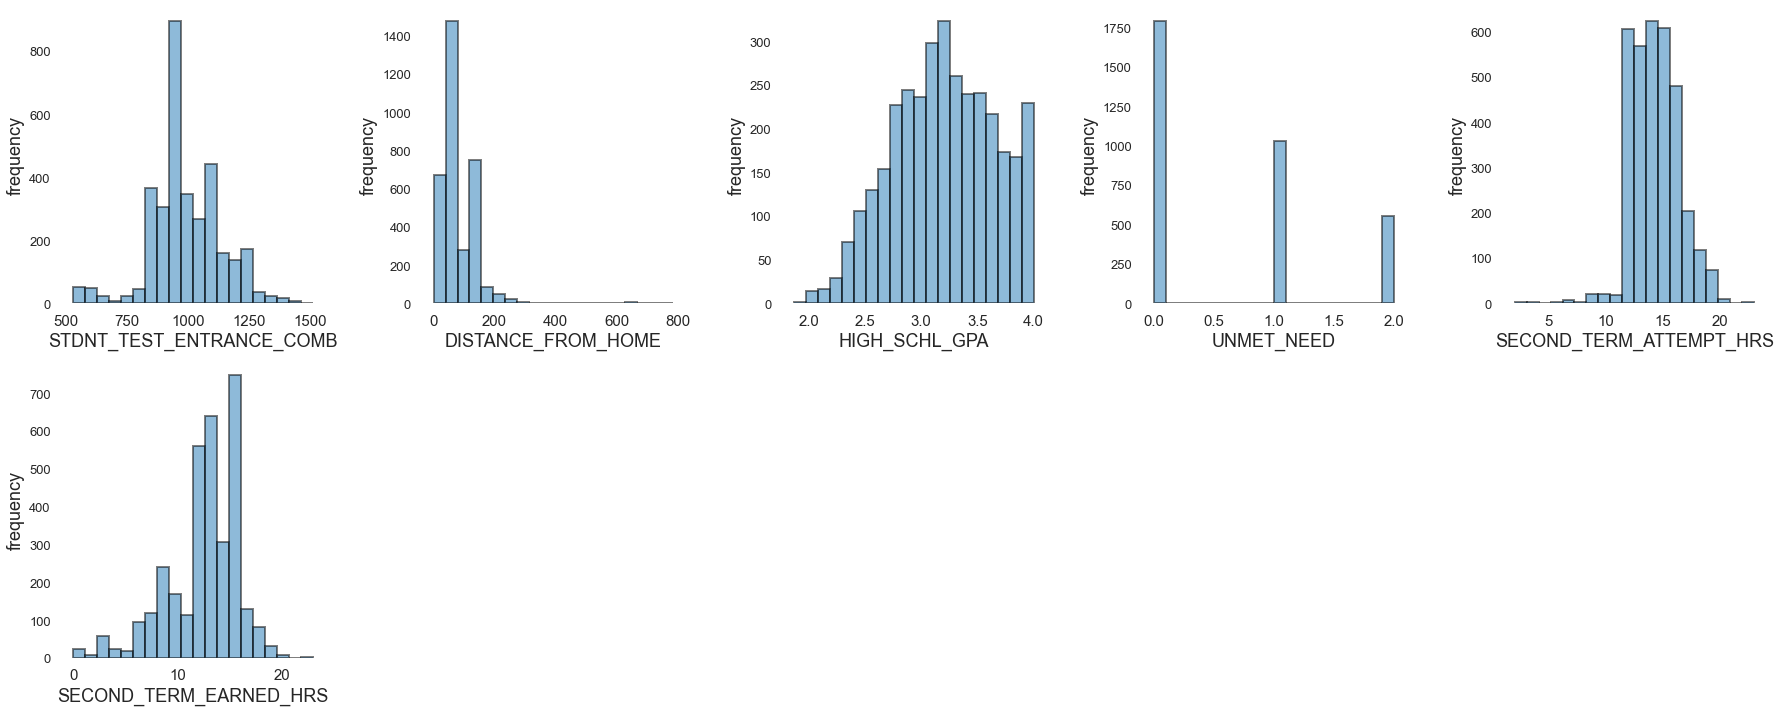

In [128]:

def plot_histgrams(dat):
    ncols = len(dat.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(dat.columns):
        X = dat[col].dropna()
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.hist(X, bins=20, alpha=0.5, \
                 edgecolor="black", linewidth=2.0)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_histgrams(dat[CONTINUOUS_COLUMNS2])

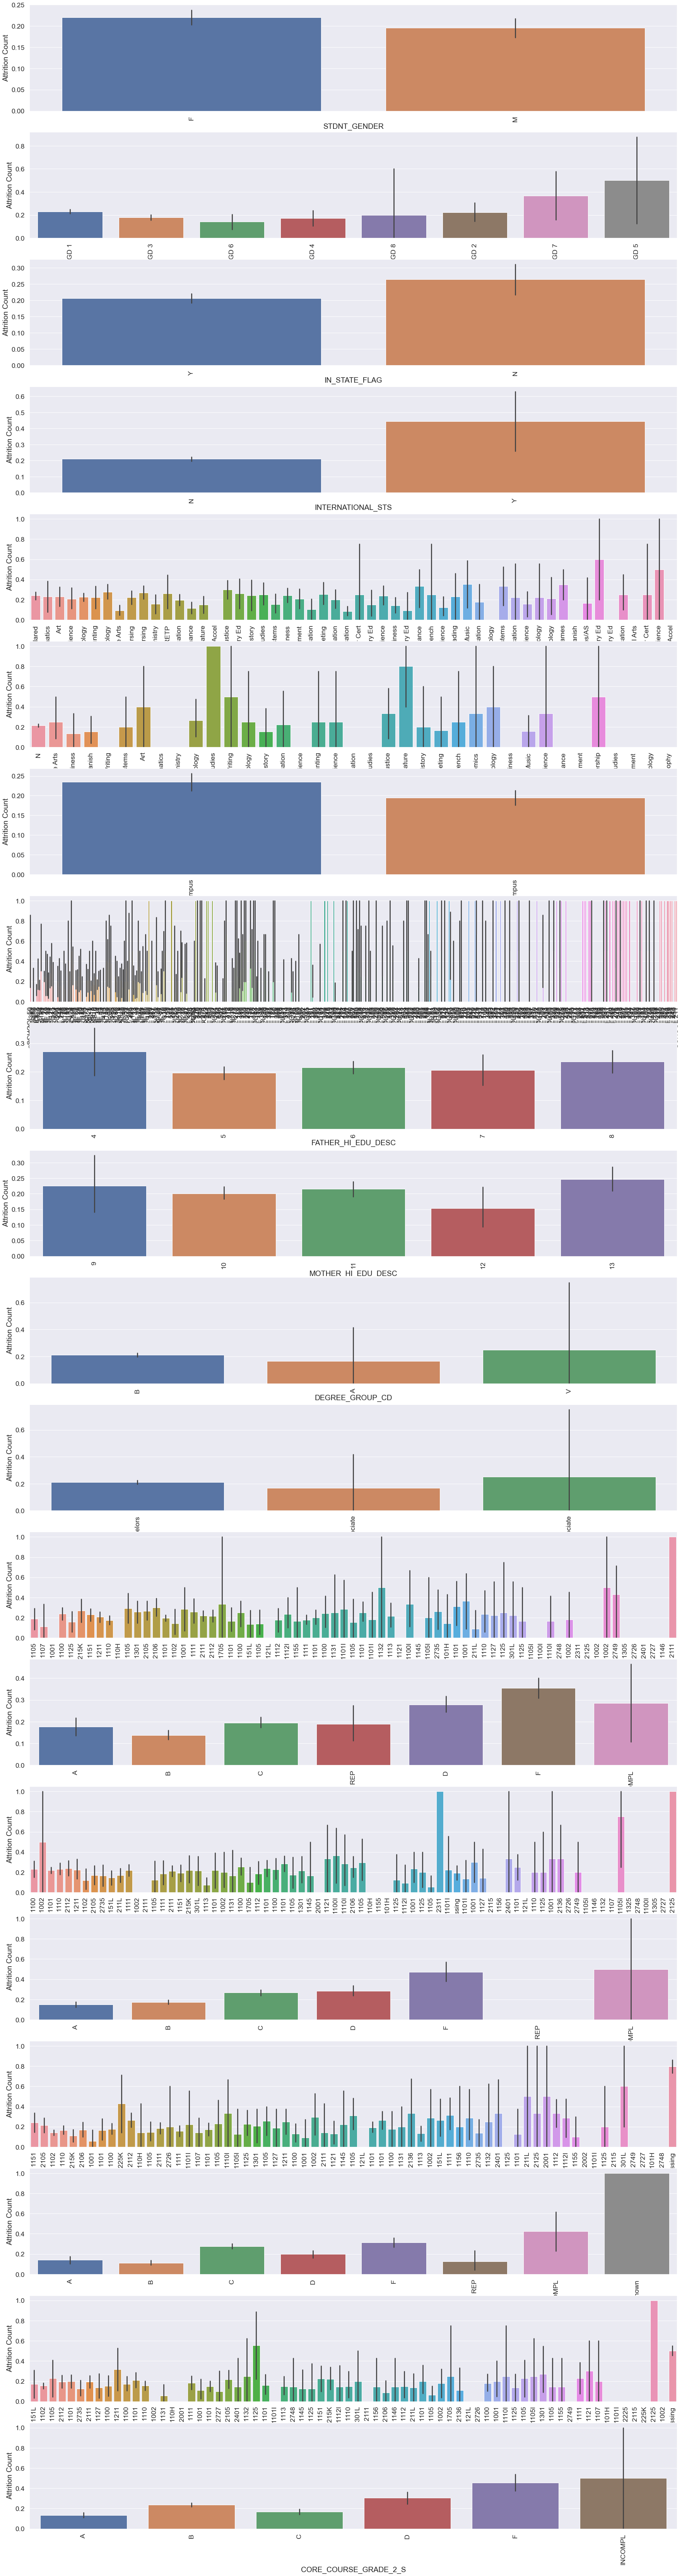

In [129]:

# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.6)
plt.figure(figsize=(30, 120))

for i, column in enumerate(CATEGORICAL_COLUMNS, 1):
    plt.subplot(20, 1, i)
    g = sns.barplot(x=f"{column}", y="ATTRITION", data=dat)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

In [130]:
continous_var=CONTINUOUS_COLUMNS1+CONTINUOUS_COLUMNS2

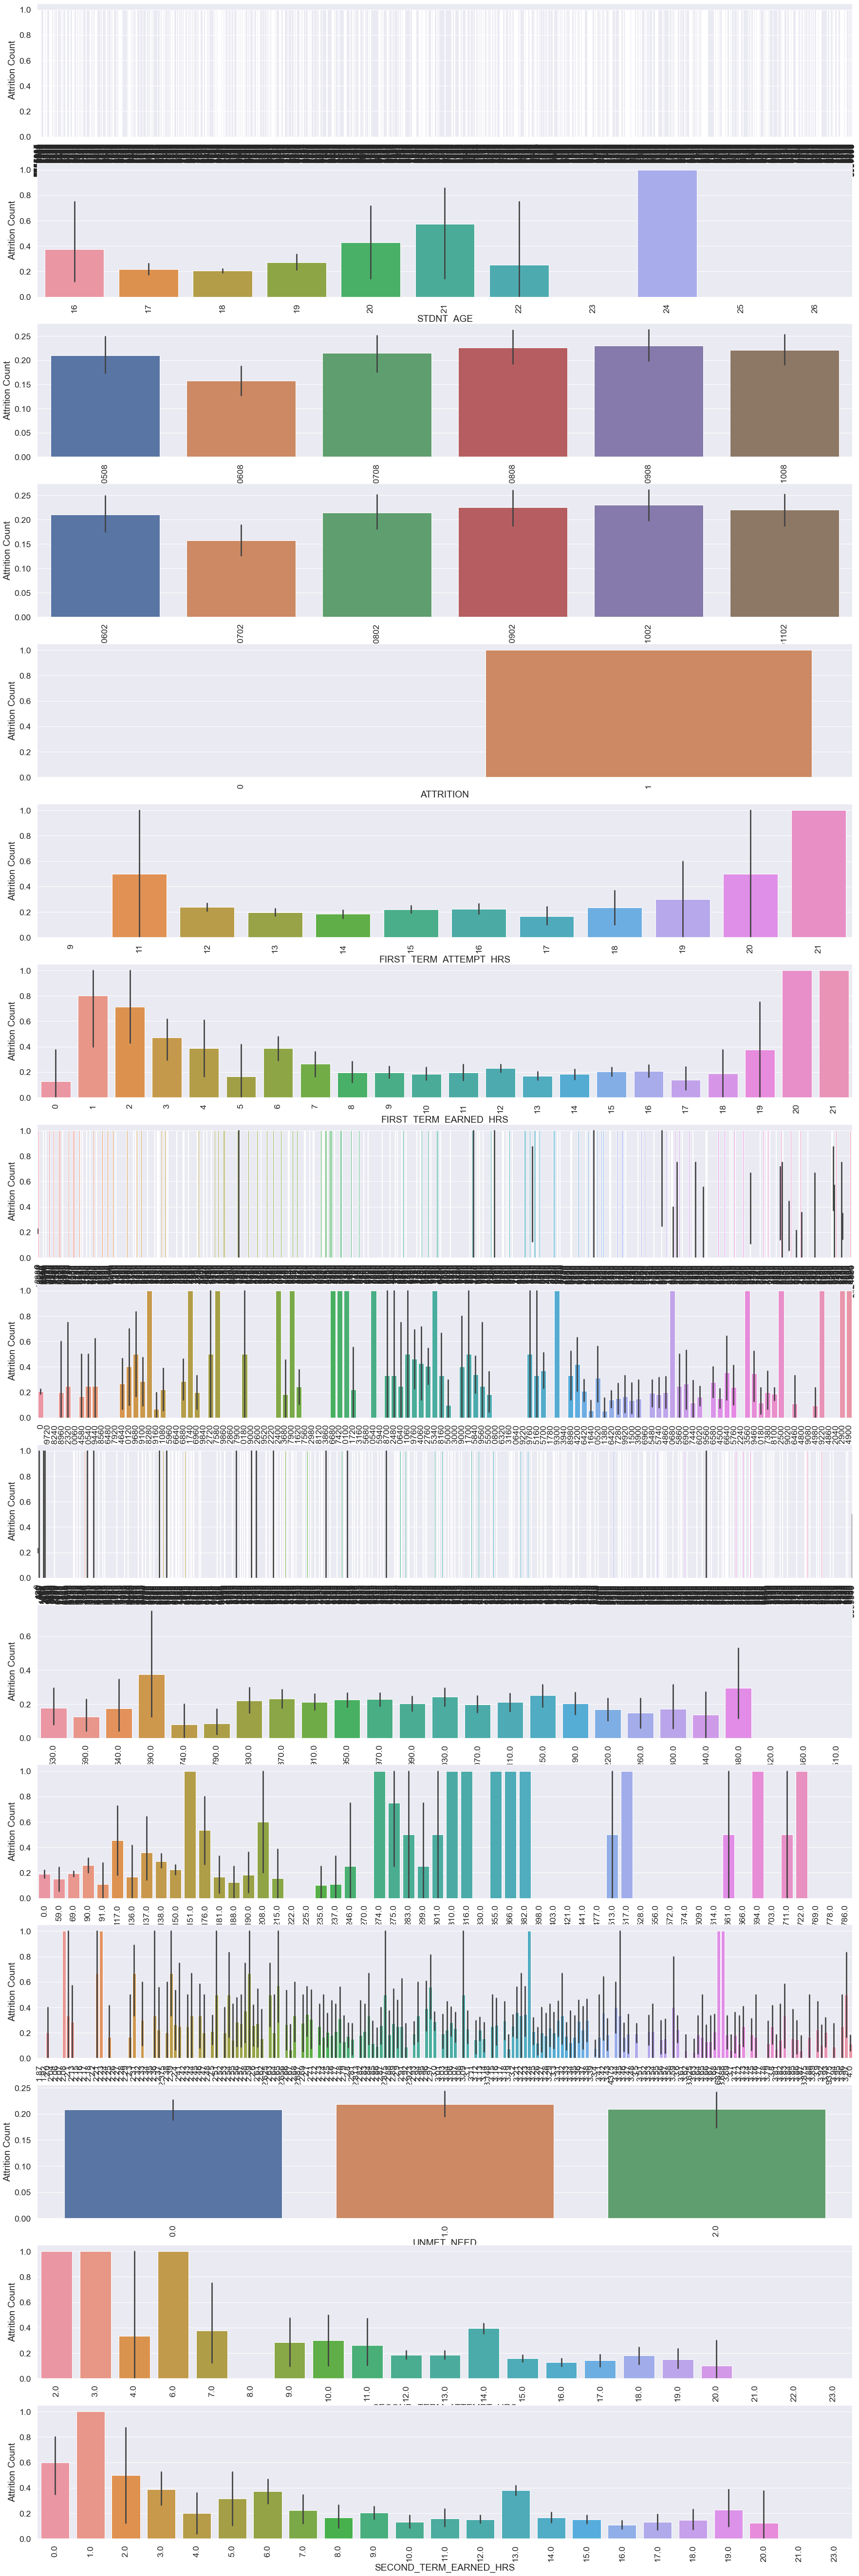

In [131]:

# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.6)
plt.figure(figsize=(30, 120))

for i, column in enumerate(continous_var, 1):
    plt.subplot(20, 1, i)
    g = sns.barplot(x=f"{column}", y="ATTRITION", data=dat)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

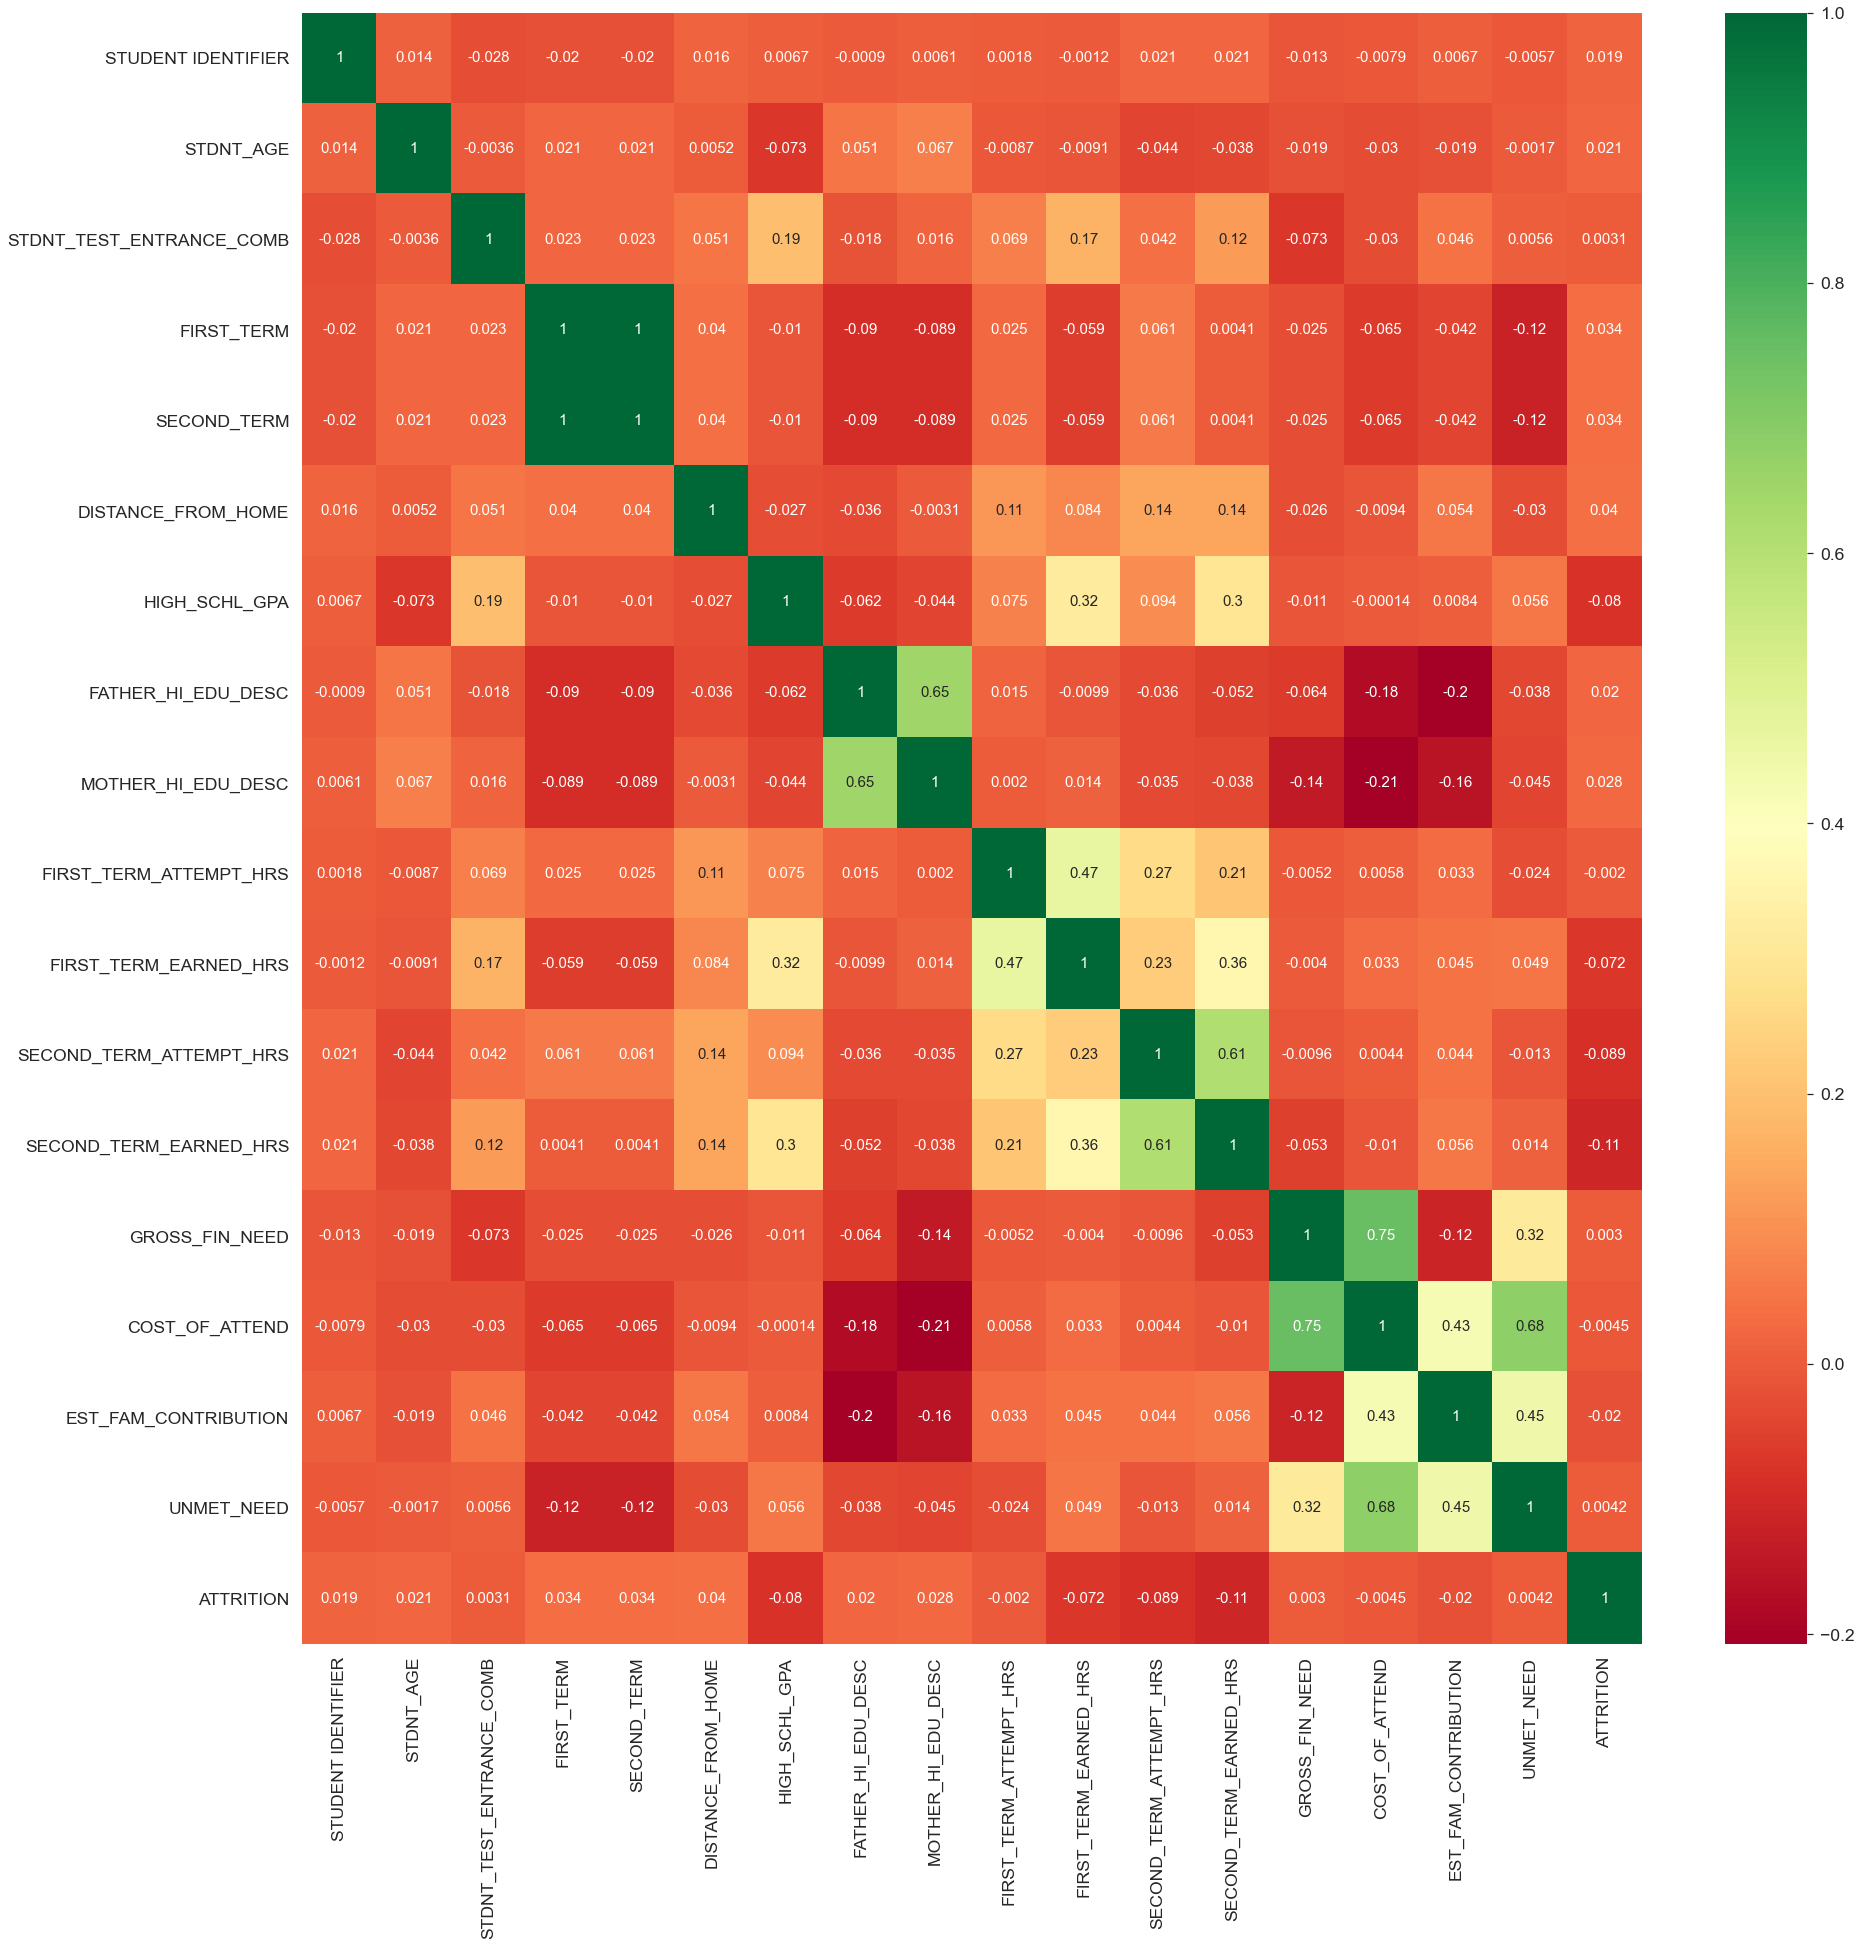

In [132]:
plt.figure(figsize=(30, 30))
sns.heatmap(dat.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})


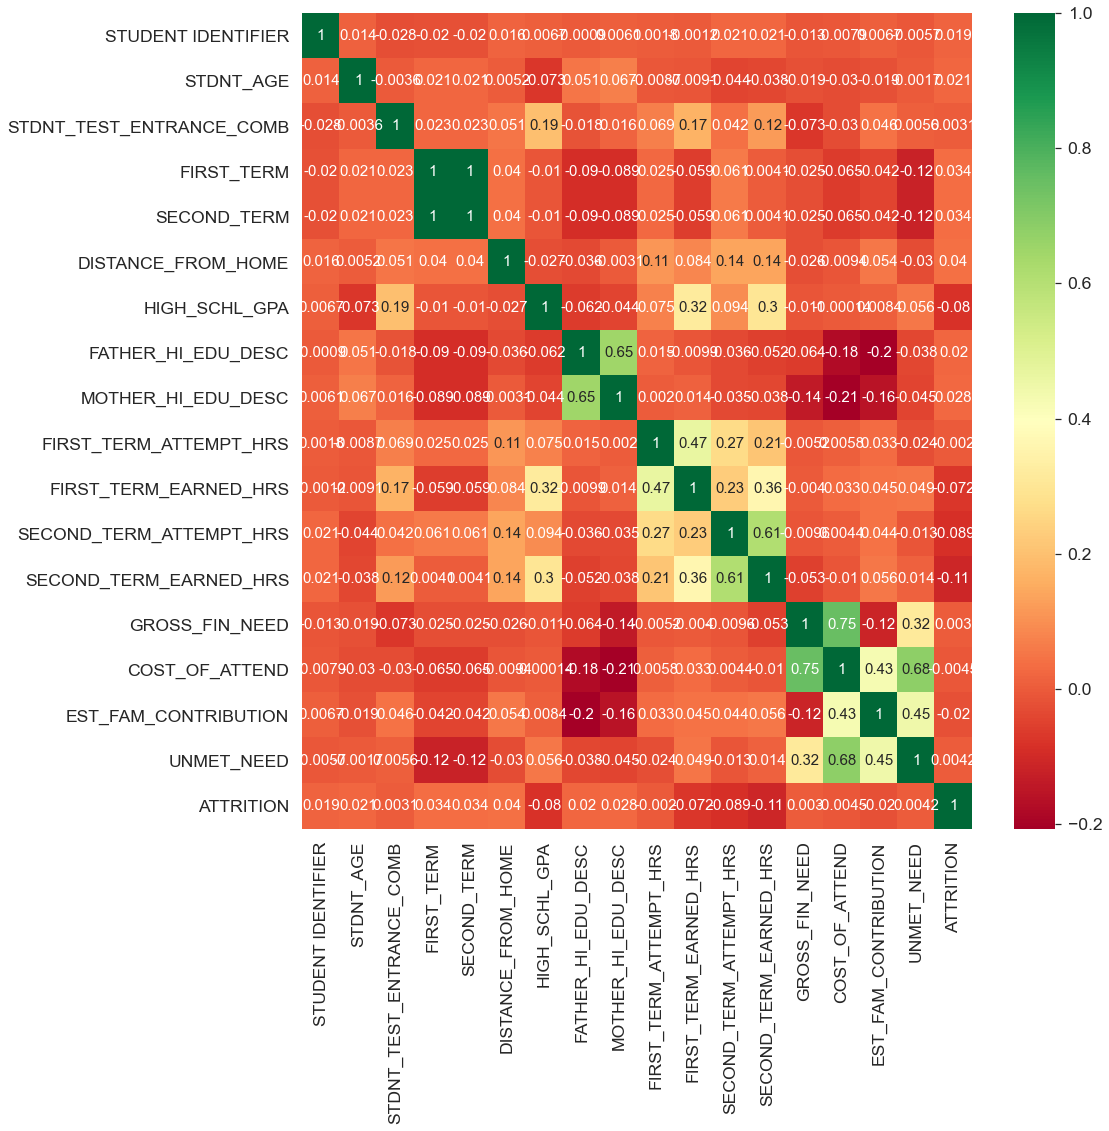

In [133]:
plt.figure(figsize=(15, 15))
heatmap=sns.heatmap(dat.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})


In [134]:
  #Below is one of the method of decreasing the level of a particular column by using decision tree.
#it is determined by using the depth of the tree.
c1=dat[['CORE_COURSE_NAME_1_S','ATTRITION']]

In [135]:
X=pd.get_dummies(dat["CORE_COURSE_NAME_1_S"])
X.shape

(3380, 67)

In [136]:
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(X,c1["ATTRITION"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=200, splitter='best')

In [137]:

#ADD NODE LABLES
c1['index']=clf.apply(X)
c1.head(20)
#above is one method where we can replace with the index

CORE_COURSE_NAME_1_S  ATTRITION  index
0             CHEM 1151          1      3
1             ECON 2105          0      3
2             ENGL 1102          0      5
3             ENGL 1102          0      5
4             COMM 1110          0      3
5            BIOL 1215K          0      3
6             ENGL 1102          0      5
7             ENGL 1102          0      5
8             ECON 2105          0      3
9             ENGL 1102          0      5
11            ECON 2106          1      3
12            SPAN 1001          0      3
13            ENGL 1102          0      5
14            MATH 1101          0      3
15            ARTH 1100          0      3
16           BIOL 1215K          0      3
17           BIOL 1225K          1      3
18           BIOL 1225K          0      3
19            HIST 2112          0      3
20            ENGL 1102          0      5

In [138]:

#handling categorical variables for categories which have many levels
sam=dat[['STDNT_MAJOR','STDNT_MINOR','CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S']]
sam.head()

STDNT_MAJOR STDNT_MINOR CORE_COURSE_NAME_1_F CORE_COURSE_NAME_2_F  \
0   Undeclared           N            ANTH 1105            ARTH 1100   
1   Undeclared           N            ANTH 1105            GERM 1002   
2  Mathematics           N            ANTH 1105            ENGL 1101   
3   Undeclared           N            ANTH 1107            COMM 1110   
4          Art           N            ANTH 1107            ARTH 1100   

  CORE_COURSE_NAME_1_S CORE_COURSE_NAME_2_S  
0            CHEM 1151           CHEM 1151L  
1            ECON 2105            ENGL 1102  
2            ENGL 1102            ENVS 1105  
3            ENGL 1102            HIST 2112  
4            COMM 1110            ENGL 1101

In [139]:
#lets check how many levels each variable has
for col in sam.columns:
    print(col,':',len(sam[col].unique()),'labels')

STDNT_MAJOR : 54 labels
STDNT_MINOR : 37 labels
CORE_COURSE_NAME_1_F : 69 labels
CORE_COURSE_NAME_2_F : 75 labels
CORE_COURSE_NAME_1_S : 67 labels
CORE_COURSE_NAME_2_S : 70 labels


In [140]:
#lets find the top 10 most frequent categories of levels
sam.STDNT_MAJOR.value_counts().sort_values(ascending=False).head(40)

Undeclared                        458
Biology                           360
Early Childhood Education         189
Pre-Nursing                       175
Nursing                           163
Psychology                        153
Pre-Business                      133
Theatre Arts                      131
Criminal Justice                   97
Music Performance                  96
Music Education                    96
General Business                   85
Exercise Science                   80
Art                                74
Management                         72
Communication                      70
Chemistry                          64
Political Science                  63
English Language/Literature        60
Engineering Studies                60
Marketing                          59
Computer Science - Systems         58
Accounting                         54
Health Science                     48
Computer Science - Games           40
Joint Enrollment - Accel           35
History     

In [141]:

#LETS MAKE A LIST WITH HE MOST FREQUENT CATEGORIES OF THE VARIABLES
top_10=[x for x in sam.STDNT_MAJOR.value_counts().sort_values(ascending=False).head(10).index]
top_10

['Undeclared',
 'Biology',
 'Early Childhood Education',
 'Pre-Nursing',
 'Nursing',
 'Psychology',
 'Pre-Business',
 'Theatre Arts',
 'Criminal Justice',
 'Music Performance']

In [142]:

for lable in top_10:
    sam[lable]=np.where(sam['STDNT_MAJOR']==lable,1,0)
    
sam[['STDNT_MAJOR']+top_10].head(40)

STDNT_MAJOR  Undeclared  Biology  Early Childhood Education  \
0                  Undeclared           1        0                          0   
1                  Undeclared           1        0                          0   
2                 Mathematics           0        0                          0   
3                  Undeclared           1        0                          0   
4                         Art           0        0                          0   
5           Political Science           0        0                          0   
6                     Biology           0        1                          0   
7                     Biology           0        1                          0   
8                  Accounting           0        0                          0   
9                  Undeclared           1        0                          0   
11                 Undeclared           1        0                          0   
12                    Biology           0        1                          0   
13                 Psychology           0        0                          0   
14               Theatre Arts           0        0                          0   
15               Theatre Arts           0        0                          0   
16                 Undeclared           1        0                          0   
17                    Biology           0        1                          0   
18                    Biology           0        1                          0   
19                    Nursing           0        0                          0   
20                    Nursing           0        0                          0   
21                 Undeclared           1        0                          0   
22                    Nursing           0        0                          0   
23                Pre-Nursing           0        0                          0   
24                Pre-Nursing           0        0                          0   
25                    Nursing           0        0                          0   
26                  Chemistry           0        0                          0   
27       Pre-Engineering/RETP           0        0                          0   
28  Early Childhood Education           0        0                          1   
29                    Biology           0        1                          0   
30       Pre-Engineering/RETP           0        0                          0   
31                    Biology           0        1                          0   
32       Pre-Engineering/RETP           0        0                          0   
33                    Biology           0        1                          0   
34                    Biology           0        1                          0   
35          Music Performance           0        0                          0   
36                 Undeclared           1        0                          0   
37                 Undeclared           1        0                          0   
38          Music Performance           0        0                          0   
39          Music Performance           0        0                          0   
40                        Art           0        0                          0   

    Pre-Nursing  Nursing  Psychology  Pre-Business  Theatre Arts  \
0             0        0           0             0             0   
1             0        0           0             0             0   
2             0        0           0             0             0   
3             0        0           0             0             0   
4             0        0           0             0             0   
5             0        0           0             0             0   
6             0        0           0             0             0   
7             0        0           0             0             0   
8             0        0           0             0             0   
9             0 

In [143]:

# dummy variables for all the categorical variables

def one_hot_top_x(sam,variable,top_x_labels):
    
    
    for label in top_x_labels:
        sam[variable+'_'+label]=np.where(sam_final['STDNT_MAJOR']==lable,1,0)
    
#read the data again
sam_final=dat[['STDNT_MAJOR','STDNT_MINOR','CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S']]

#encode all variables into the 10 most frequent categories.
one_hot_top_x(sam_final,'STDNT_MAJOR',top_10)
sam_final.head()
        

STDNT_MAJOR STDNT_MINOR CORE_COURSE_NAME_1_F CORE_COURSE_NAME_2_F  \
0   Undeclared           N            ANTH 1105            ARTH 1100   
1   Undeclared           N            ANTH 1105            GERM 1002   
2  Mathematics           N            ANTH 1105            ENGL 1101   
3   Undeclared           N            ANTH 1107            COMM 1110   
4          Art           N            ANTH 1107            ARTH 1100   

  CORE_COURSE_NAME_1_S CORE_COURSE_NAME_2_S  STDNT_MAJOR_Undeclared  \
0            CHEM 1151           CHEM 1151L                       0   
1            ECON 2105            ENGL 1102                       0   
2            ENGL 1102            ENVS 1105                       0   
3            ENGL 1102            HIST 2112                       0   
4            COMM 1110            ENGL 1101                       0   

   STDNT_MAJOR_Biology  STDNT_MAJOR_Early Childhood Education  \
0                    0                                      0   
1                    0                                      0   
2                    0                                      0   
3                    0                                      0   
4                    0                                      0   

   STDNT_MAJOR_Pre-Nursing  STDNT_MAJOR_Nursing  STDNT_MAJOR_Psychology  \
0                        0                    0                       0   
1                        0                    0                       0   
2                        0                    0                       0   
3                        0                    0                       0   
4                        0                    0                       0   

   STDNT_MAJOR_Pre-Business  STDNT_MAJOR_Theatre Arts  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   STDNT_MAJOR_Criminal Justice  STDNT_MAJOR_Music Performance  
0                             0                              0  
1                             0                              0  
2                             0                              0  
3                             0                              0  
4                             0                              0

In [144]:

#10 frequent features of student minor
top_10=[x for x in sam.STDNT_MINOR.value_counts().sort_values(ascending=False).head(10).index]

#now createthe 1 most frequent dummy varaibles for student m inoro
one_hot_top_x(sam_final,'STDNT_MINOR',top_10)
sam_final.head()

STDNT_MAJOR STDNT_MINOR CORE_COURSE_NAME_1_F CORE_COURSE_NAME_2_F  \
0   Undeclared           N            ANTH 1105            ARTH 1100   
1   Undeclared           N            ANTH 1105            GERM 1002   
2  Mathematics           N            ANTH 1105            ENGL 1101   
3   Undeclared           N            ANTH 1107            COMM 1110   
4          Art           N            ANTH 1107            ARTH 1100   

  CORE_COURSE_NAME_1_S CORE_COURSE_NAME_2_S  STDNT_MAJOR_Undeclared  \
0            CHEM 1151           CHEM 1151L                       0   
1            ECON 2105            ENGL 1102                       0   
2            ENGL 1102            ENVS 1105                       0   
3            ENGL 1102            HIST 2112                       0   
4            COMM 1110            ENGL 1101                       0   

   STDNT_MAJOR_Biology  STDNT_MAJOR_Early Childhood Education  \
0                    0                                      0   
1                    0                                      0   
2                    0                                      0   
3                    0                                      0   
4                    0                                      0   

   STDNT_MAJOR_Pre-Nursing  STDNT_MAJOR_Nursing  STDNT_MAJOR_Psychology  \
0                        0                    0                       0   
1                        0                    0                       0   
2                        0                    0                       0   
3                        0                    0                       0   
4                        0                    0                       0   

   STDNT_MAJOR_Pre-Business  STDNT_MAJOR_Theatre Arts  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   STDNT_MAJOR_Criminal Justice  STDNT_MAJOR_Music Performance  STDNT_MINOR_N  \
0                             0                              0              0   
1                             0                              0              0   
2                             0                              0              0   
3                             0                              0              0   
4                             0                              0              0   

   STDNT_MINOR_Spanish  STDNT_MINOR_Psychology  STDNT_MINOR_Music  \
0                    0                       0                  0   
1                    0                       0                  0   
2                    0                       0                  0   
3                    0                       0                  0   
4                    0                       0                  0   

   STDNT_MINOR_Foundations of Business  STDNT_MINOR_Communication  \
0                                    0                          0   
1                                    0                          0   
2                                    0                          0   
3                                    0                          0   
4                                    0                          0   

   STDNT_MINOR_History  STDNT_MINOR_Criminal Justice  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             0   
4                    0                             0   

   STDNT_MINOR_Theatre Arts  STDNT_MINOR_Computer Science - Systems  
0                         0                                       0  
1                         0                                       0  
2                         0                                       0  
3                       

In [145]:
#10 frequent features of CORE_COURSE_NAME_1_F
top_10=[x for x in sam.CORE_COURSE_NAME_1_F.value_counts().sort_values(ascending=False).head(10).index]

#now createthe 1 most frequent dummy varaibles for CORE_COURSE_NAME_1_F
one_hot_top_x(sam_final,'CORE_COURSE_NAME_1_F',top_10)
sam_final.head()

STDNT_MAJOR STDNT_MINOR CORE_COURSE_NAME_1_F CORE_COURSE_NAME_2_F  \
0   Undeclared           N            ANTH 1105            ARTH 1100   
1   Undeclared           N            ANTH 1105            GERM 1002   
2  Mathematics           N            ANTH 1105            ENGL 1101   
3   Undeclared           N            ANTH 1107            COMM 1110   
4          Art           N            ANTH 1107            ARTH 1100   

  CORE_COURSE_NAME_1_S CORE_COURSE_NAME_2_S  STDNT_MAJOR_Undeclared  \
0            CHEM 1151           CHEM 1151L                       0   
1            ECON 2105            ENGL 1102                       0   
2            ENGL 1102            ENVS 1105                       0   
3            ENGL 1102            HIST 2112                       0   
4            COMM 1110            ENGL 1101                       0   

   STDNT_MAJOR_Biology  STDNT_MAJOR_Early Childhood Education  \
0                    0                                      0   
1                    0                                      0   
2                    0                                      0   
3                    0                                      0   
4                    0                                      0   

   STDNT_MAJOR_Pre-Nursing  STDNT_MAJOR_Nursing  STDNT_MAJOR_Psychology  \
0                        0                    0                       0   
1                        0                    0                       0   
2                        0                    0                       0   
3                        0                    0                       0   
4                        0                    0                       0   

   STDNT_MAJOR_Pre-Business  STDNT_MAJOR_Theatre Arts  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   STDNT_MAJOR_Criminal Justice  STDNT_MAJOR_Music Performance  STDNT_MINOR_N  \
0                             0                              0              0   
1                             0                              0              0   
2                             0                              0              0   
3                             0                              0              0   
4                             0                              0              0   

   STDNT_MINOR_Spanish  STDNT_MINOR_Psychology  STDNT_MINOR_Music  \
0                    0                       0                  0   
1                    0                       0                  0   
2                    0                       0                  0   
3                    0                       0                  0   
4                    0                       0                  0   

   STDNT_MINOR_Foundations of Business  STDNT_MINOR_Communication  \
0                                    0                          0   
1                                    0                          0   
2                                    0                          0   
3                                    0                          0   
4                                    0                          0   

   STDNT_MINOR_History  STDNT_MINOR_Criminal Justice  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             0   
4                    0                             0   

   STDNT_MINOR_Theatre Arts  STDNT_MINOR_Computer Science - Systems  \
0                         0                                       0   
1                         0                                       0   
2                         0                                       0   
3                   

In [146]:
#10 frequent features of CORE_COURSE_NAME_2_F
top_10=[x for x in sam.CORE_COURSE_NAME_2_F.value_counts().sort_values(ascending=False).head(10).index]

#now createthe 1 most frequent dummy varaibles for CORE_COURSE_NAME_1_F
one_hot_top_x(sam_final,'CORE_COURSE_NAME_2_F',top_10)
sam_final.head()

STDNT_MAJOR STDNT_MINOR CORE_COURSE_NAME_1_F CORE_COURSE_NAME_2_F  \
0   Undeclared           N            ANTH 1105            ARTH 1100   
1   Undeclared           N            ANTH 1105            GERM 1002   
2  Mathematics           N            ANTH 1105            ENGL 1101   
3   Undeclared           N            ANTH 1107            COMM 1110   
4          Art           N            ANTH 1107            ARTH 1100   

  CORE_COURSE_NAME_1_S CORE_COURSE_NAME_2_S  STDNT_MAJOR_Undeclared  \
0            CHEM 1151           CHEM 1151L                       0   
1            ECON 2105            ENGL 1102                       0   
2            ENGL 1102            ENVS 1105                       0   
3            ENGL 1102            HIST 2112                       0   
4            COMM 1110            ENGL 1101                       0   

   STDNT_MAJOR_Biology  STDNT_MAJOR_Early Childhood Education  \
0                    0                                      0   
1                    0                                      0   
2                    0                                      0   
3                    0                                      0   
4                    0                                      0   

   STDNT_MAJOR_Pre-Nursing  STDNT_MAJOR_Nursing  STDNT_MAJOR_Psychology  \
0                        0                    0                       0   
1                        0                    0                       0   
2                        0                    0                       0   
3                        0                    0                       0   
4                        0                    0                       0   

   STDNT_MAJOR_Pre-Business  STDNT_MAJOR_Theatre Arts  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   STDNT_MAJOR_Criminal Justice  STDNT_MAJOR_Music Performance  STDNT_MINOR_N  \
0                             0                              0              0   
1                             0                              0              0   
2                             0                              0              0   
3                             0                              0              0   
4                             0                              0              0   

   STDNT_MINOR_Spanish  STDNT_MINOR_Psychology  STDNT_MINOR_Music  \
0                    0                       0                  0   
1                    0                       0                  0   
2                    0                       0                  0   
3                    0                       0                  0   
4                    0                       0                  0   

   STDNT_MINOR_Foundations of Business  STDNT_MINOR_Communication  \
0                                    0                          0   
1                                    0                          0   
2                                    0                          0   
3                                    0                          0   
4                                    0                          0   

   STDNT_MINOR_History  STDNT_MINOR_Criminal Justice  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             0   
4                    0                             0   

   STDNT_MINOR_Theatre Arts  STDNT_MINOR_Computer Science - Systems  \
0                         0                                       0   
1                         0                                       0   
2                         0                                       0   
3                   

In [147]:

#10 frequent features of CORE_COURSE_NAME_1_S
top_10=[x for x in sam.CORE_COURSE_NAME_1_S.value_counts().sort_values(ascending=False).head(10).index]

#now createthe 1 most frequent dummy varaibles for CORE_COURSE_NAME_1_S
one_hot_top_x(sam_final,'CORE_COURSE_NAME_1_S',top_10)
sam_final.head()

STDNT_MAJOR STDNT_MINOR CORE_COURSE_NAME_1_F CORE_COURSE_NAME_2_F  \
0   Undeclared           N            ANTH 1105            ARTH 1100   
1   Undeclared           N            ANTH 1105            GERM 1002   
2  Mathematics           N            ANTH 1105            ENGL 1101   
3   Undeclared           N            ANTH 1107            COMM 1110   
4          Art           N            ANTH 1107            ARTH 1100   

  CORE_COURSE_NAME_1_S CORE_COURSE_NAME_2_S  STDNT_MAJOR_Undeclared  \
0            CHEM 1151           CHEM 1151L                       0   
1            ECON 2105            ENGL 1102                       0   
2            ENGL 1102            ENVS 1105                       0   
3            ENGL 1102            HIST 2112                       0   
4            COMM 1110            ENGL 1101                       0   

   STDNT_MAJOR_Biology  STDNT_MAJOR_Early Childhood Education  \
0                    0                                      0   
1                    0                                      0   
2                    0                                      0   
3                    0                                      0   
4                    0                                      0   

   STDNT_MAJOR_Pre-Nursing  STDNT_MAJOR_Nursing  STDNT_MAJOR_Psychology  \
0                        0                    0                       0   
1                        0                    0                       0   
2                        0                    0                       0   
3                        0                    0                       0   
4                        0                    0                       0   

   STDNT_MAJOR_Pre-Business  STDNT_MAJOR_Theatre Arts  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   STDNT_MAJOR_Criminal Justice  STDNT_MAJOR_Music Performance  STDNT_MINOR_N  \
0                             0                              0              0   
1                             0                              0              0   
2                             0                              0              0   
3                             0                              0              0   
4                             0                              0              0   

   STDNT_MINOR_Spanish  STDNT_MINOR_Psychology  STDNT_MINOR_Music  \
0                    0                       0                  0   
1                    0                       0                  0   
2                    0                       0                  0   
3                    0                       0                  0   
4                    0                       0                  0   

   STDNT_MINOR_Foundations of Business  STDNT_MINOR_Communication  \
0                                    0                          0   
1                                    0                          0   
2                                    0                          0   
3                                    0                          0   
4                                    0                          0   

   STDNT_MINOR_History  STDNT_MINOR_Criminal Justice  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             0   
4                    0                             0   

   STDNT_MINOR_Theatre Arts  STDNT_MINOR_Computer Science - Systems  \
0                         0                                       0   
1                         0                                       0   
2                         0                                       0   
3                   

In [148]:

#10 frequent features of CORE_COURSE_NAME_2_S
top_10=[x for x in sam.CORE_COURSE_NAME_2_S.value_counts().sort_values(ascending=False).head(10).index]

#now createthe 1 most frequent dummy varaibles for CORE_COURSE_NAME_2_S
one_hot_top_x(sam_final,'CORE_COURSE_NAME_2_S',top_10)
sam_final.head()

STDNT_MAJOR STDNT_MINOR CORE_COURSE_NAME_1_F CORE_COURSE_NAME_2_F  \
0   Undeclared           N            ANTH 1105            ARTH 1100   
1   Undeclared           N            ANTH 1105            GERM 1002   
2  Mathematics           N            ANTH 1105            ENGL 1101   
3   Undeclared           N            ANTH 1107            COMM 1110   
4          Art           N            ANTH 1107            ARTH 1100   

  CORE_COURSE_NAME_1_S CORE_COURSE_NAME_2_S  STDNT_MAJOR_Undeclared  \
0            CHEM 1151           CHEM 1151L                       0   
1            ECON 2105            ENGL 1102                       0   
2            ENGL 1102            ENVS 1105                       0   
3            ENGL 1102            HIST 2112                       0   
4            COMM 1110            ENGL 1101                       0   

   STDNT_MAJOR_Biology  STDNT_MAJOR_Early Childhood Education  \
0                    0                                      0   
1                    0                                      0   
2                    0                                      0   
3                    0                                      0   
4                    0                                      0   

   STDNT_MAJOR_Pre-Nursing  STDNT_MAJOR_Nursing  STDNT_MAJOR_Psychology  \
0                        0                    0                       0   
1                        0                    0                       0   
2                        0                    0                       0   
3                        0                    0                       0   
4                        0                    0                       0   

   STDNT_MAJOR_Pre-Business  STDNT_MAJOR_Theatre Arts  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   STDNT_MAJOR_Criminal Justice  STDNT_MAJOR_Music Performance  STDNT_MINOR_N  \
0                             0                              0              0   
1                             0                              0              0   
2                             0                              0              0   
3                             0                              0              0   
4                             0                              0              0   

   STDNT_MINOR_Spanish  STDNT_MINOR_Psychology  STDNT_MINOR_Music  \
0                    0                       0                  0   
1                    0                       0                  0   
2                    0                       0                  0   
3                    0                       0                  0   
4                    0                       0                  0   

   STDNT_MINOR_Foundations of Business  STDNT_MINOR_Communication  \
0                                    0                          0   
1                                    0                          0   
2                                    0                          0   
3                                    0                          0   
4                                    0                          0   

   STDNT_MINOR_History  STDNT_MINOR_Criminal Justice  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             0   
4                    0                             0   

   STDNT_MINOR_Theatre Arts  STDNT_MINOR_Computer Science - Systems  \
0                         0                                       0   
1                         0                                       0   
2                         0                                       0   
3                   

In [149]:
sam2=sam_final.drop(['STDNT_MAJOR','STDNT_MINOR','CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S'],axis=1)
sam2.head()

STDNT_MAJOR_Undeclared  STDNT_MAJOR_Biology  \
0                       0                    0   
1                       0                    0   
2                       0                    0   
3                       0                    0   
4                       0                    0   

   STDNT_MAJOR_Early Childhood Education  STDNT_MAJOR_Pre-Nursing  \
0                                      0                        0   
1                                      0                        0   
2                                      0                        0   
3                                      0                        0   
4                                      0                        0   

   STDNT_MAJOR_Nursing  STDNT_MAJOR_Psychology  STDNT_MAJOR_Pre-Business  \
0                    0                       0                         0   
1                    0                       0                         0   
2                    0                       0                         0   
3                    0                       0                         0   
4                    0                       0                         0   

   STDNT_MAJOR_Theatre Arts  STDNT_MAJOR_Criminal Justice  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   

   STDNT_MAJOR_Music Performance  STDNT_MINOR_N  STDNT_MINOR_Spanish  \
0                              0              0                    0   
1                              0              0                    0   
2                              0              0                    0   
3                              0              0                    0   
4                              0              0                    0   

   STDNT_MINOR_Psychology  STDNT_MINOR_Music  \
0                       0                  0   
1                       0                  0   
2                       0                  0   
3                       0                  0   
4                       0                  0   

   STDNT_MINOR_Foundations of Business  STDNT_MINOR_Communication  \
0                                    0                          0   
1                                    0                          0   
2                                    0                          0   
3                                    0                          0   
4                                    0                          0   

   STDNT_MINOR_History  STDNT_MINOR_Criminal Justice  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             0   
4                    0                             0   

   STDNT_MINOR_Theatre Arts  STDNT_MINOR_Computer Science - Systems  \
0                         0                                       0   
1                         0                                       0   
2                         0                                       0   
3                         0                                       0   
4                         0                                       0   

   CORE_COURSE_NAME_1_F_ENGL 1101  CORE_COURSE_NAME_1_F_COMM 1110  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   CORE_COURSE_NAME_1_F_HIST 2111  CORE_COURSE_NAME_1_F_MATH 1111  \
0                               0                               0   
1        

In [150]:

#for example we can use count/frequency method.shown for example but we wont use it here as there will be many levels with same count

#sam1=dat[['STDNT_MAJOR','STDNT_MINOR','CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S']]
#sam1.head()

#we will do one hot encoding to check
#pd.get_dummies(sam1).shape
#len(sam1['STDNT_MAJOR'].unique())

#lets see the number of labels
#for col in sam1.columns[0:]:
#    print(col,':',len(sam1[col].unique()),'labels')
#lets obtain the count for each one of the labels of the variables STDNT_MAJOR
#lets captuire this in a dictionary so we can use to re-map the labels

#sam1.STDNT_MAJOR.value_counts().to_dict()
#now lets replace each label in X2by its count
#first we make a dictionarythat maps each label o the count
#sam1_frequency_map=sam1.STDNT_MAJOR.value_counts().to_dict()

In [151]:

#as second term is highly correlated and its shown in the data profiling reprot we shall drop the value.
dat=dat.drop(['SECOND_TERM'],axis=1)
dat=dat.drop(['STUDENT IDENTIFIER','HIGH_SCHL_NAME','DEGREE_GROUP_DESC','SECOND_TERM_ATTEMPT_HRS', 'SECOND_TERM_EARNED_HRS'],axis=1)#these are not required.

In [152]:
# Find correlations with the target and sort
dat_corr = dat.copy()
dat_corr['Target'] = dat_corr['ATTRITION']
#apply(lambda x: 0 if x == 'No' else 1)
dat_corr = dat_corr.drop(['ATTRITION'], axis=1)
#check if the above code is required ir not
correlations = dat_corr.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(10))
print('\nMost Negative Correlations: \n', correlations.head(10))

Most Positive Correlations: 
 FIRST_TERM_ATTEMPT_HRS     -0.002010
GROSS_FIN_NEED              0.002967
STDNT_TEST_ENTRANCE_COMB    0.003058
UNMET_NEED                  0.004170
FATHER_HI_EDU_DESC          0.019999
STDNT_AGE                   0.021280
MOTHER_HI_EDU_DESC          0.028259
FIRST_TERM                  0.033599
DISTANCE_FROM_HOME          0.039525
Target                      1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 HIGH_SCHL_GPA              -0.079893
FIRST_TERM_EARNED_HRS      -0.071657
EST_FAM_CONTRIBUTION       -0.019863
COST_OF_ATTEND             -0.004484
FIRST_TERM_ATTEMPT_HRS     -0.002010
GROSS_FIN_NEED              0.002967
STDNT_TEST_ENTRANCE_COMB    0.003058
UNMET_NEED                  0.004170
FATHER_HI_EDU_DESC          0.019999
STDNT_AGE                   0.021280
Name: Target, dtype: float64


#Feature Selection

In [153]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif

In [ ]:
#chisquare test

In [154]:
data1=dat.copy()
data=dat.copy()
CATEGORICAL_COLUMNS 

['STDNT_GENDER',
 'STDNT_BACKGROUND',
 'IN_STATE_FLAG',
 'INTERNATIONAL_STS',
 'STDNT_MAJOR',
 'STDNT_MINOR',
 'HOUSING_STS',
 'HIGH_SCHL_NAME',
 'FATHER_HI_EDU_DESC',
 'MOTHER_HI_EDU_DESC',
 'DEGREE_GROUP_CD',
 'DEGREE_GROUP_DESC',
 'CORE_COURSE_NAME_1_F',
 'CORE_COURSE_GRADE_1_F',
 'CORE_COURSE_NAME_2_F',
 'CORE_COURSE_GRADE_2_F',
 'CORE_COURSE_NAME_1_S',
 'CORE_COURSE_GRADE_1_S',
 'CORE_COURSE_NAME_2_S',
 'CORE_COURSE_GRADE_2_S']

In [155]:
A=dat[['STDNT_GENDER',
 'STDNT_BACKGROUND',
 'IN_STATE_FLAG',
 'INTERNATIONAL_STS',
 'STDNT_MAJOR',
 'STDNT_MINOR',
 'HOUSING_STS',
 'FATHER_HI_EDU_DESC',
 'MOTHER_HI_EDU_DESC',
 'DEGREE_GROUP_CD',
 'CORE_COURSE_NAME_1_F',
 'CORE_COURSE_GRADE_1_F',
 'CORE_COURSE_NAME_2_F',
 'CORE_COURSE_GRADE_2_F',
 'CORE_COURSE_NAME_1_S',
 'CORE_COURSE_GRADE_1_S',
 'CORE_COURSE_NAME_2_S',
 'CORE_COURSE_GRADE_2_S']]
A=pd.get_dummies(A)
#A=dat[[ "STDNT_AGE", "FIRST_TERM","FIRST_TERM_ATTEMPT_HRS","FIRST_TERM_EARNED_HRS","GROSS_FIN_NEED","COST_OF_ATTEND","EST_FAM_CONTRIBUTION","STDNT_TEST_ENTRANCE_COMB", "DISTANCE_FROM_HOME", "HIGH_SCHL_GPA","SECOND_TERM_ATTEMPT_HRS",'SECOND_TERM_EARNED_HRS']]
b=dat['ATTRITION']
#,"UNMET_NEED"

In [156]:

   
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(A,b)

In [157]:

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(A.columns)

In [159]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.sort_values(['Score'],ascending=0).head(10)

Specs       Score
326  CORE_COURSE_NAME_1_S_Missing  311.360719
404  CORE_COURSE_NAME_2_S_Missing  217.752907
185       CORE_COURSE_GRADE_1_F_F   53.692070
338       CORE_COURSE_GRADE_1_S_B   53.066420
419       CORE_COURSE_GRADE_2_S_F   49.656854
267       CORE_COURSE_GRADE_2_F_F   48.866413
182       CORE_COURSE_GRADE_1_F_B   30.960995
339       CORE_COURSE_GRADE_1_S_C   28.814857
415       CORE_COURSE_GRADE_2_S_A   28.407790
341       CORE_COURSE_GRADE_1_S_F   26.261456

In [160]:

print(featureScores.nlargest(10,'Score'))  #print 10 best features

                            Specs       Score
326  CORE_COURSE_NAME_1_S_Missing  311.360719
404  CORE_COURSE_NAME_2_S_Missing  217.752907
185       CORE_COURSE_GRADE_1_F_F   53.692070
338       CORE_COURSE_GRADE_1_S_B   53.066420
419       CORE_COURSE_GRADE_2_S_F   49.656854
267       CORE_COURSE_GRADE_2_F_F   48.866413
182       CORE_COURSE_GRADE_1_F_B   30.960995
339       CORE_COURSE_GRADE_1_S_C   28.814857
415       CORE_COURSE_GRADE_2_S_A   28.407790
341       CORE_COURSE_GRADE_1_S_F   26.261456


In [161]:
#lets use f_classif as the score function which  uses ANOVA as the measure
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(A,b)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(A.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.sort_values(['Score'],ascending=0).head(10)

Specs       Score
326  CORE_COURSE_NAME_1_S_Missing  360.612474
404  CORE_COURSE_NAME_2_S_Missing  269.513641
338       CORE_COURSE_GRADE_1_S_B   73.649654
185       CORE_COURSE_GRADE_1_F_F   62.773445
419       CORE_COURSE_GRADE_2_S_F   52.594169
267       CORE_COURSE_GRADE_2_F_F   51.421767
339       CORE_COURSE_GRADE_1_S_C   43.762808
182       CORE_COURSE_GRADE_1_F_B   43.396079
415       CORE_COURSE_GRADE_2_S_A   37.214692
341       CORE_COURSE_GRADE_1_S_F   30.248588

In [162]:

print(featureScores.nlargest(10,'Score'))

                            Specs       Score
326  CORE_COURSE_NAME_1_S_Missing  360.612474
404  CORE_COURSE_NAME_2_S_Missing  269.513641
338       CORE_COURSE_GRADE_1_S_B   73.649654
185       CORE_COURSE_GRADE_1_F_F   62.773445
419       CORE_COURSE_GRADE_2_S_F   52.594169
267       CORE_COURSE_GRADE_2_F_F   51.421767
339       CORE_COURSE_GRADE_1_S_C   43.762808
182       CORE_COURSE_GRADE_1_F_B   43.396079
415       CORE_COURSE_GRADE_2_S_A   37.214692
341       CORE_COURSE_GRADE_1_S_F   30.248588


In [163]:
#feature importance using extra tree classifier

In [164]:
dat_fi=dat.copy()
dat_fi=dat_fi.drop(['ATTRITION'],axis=1)
dat_fid=pd.get_dummies(dat_fi)

In [165]:

t1=dat["ATTRITION"]

In [166]:

#import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(dat_fid,
                                                    t1,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=t1)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2535, 432)
Number transactions y_train dataset:  (2535,)
Number transactions X_test dataset:  (845, 432)
Number transactions y_test dataset:  (845,)


In [167]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [168]:

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[9.51625937e-03 1.79133668e-02 1.56465249e-02 1.54849926e-02
 1.87724955e-02 1.36546552e-02 1.47538500e-02 1.66641429e-02
 1.85120720e-02 1.25090243e-02 1.43502095e-02 1.18630809e-02
 1.27896742e-02 9.98004507e-03 9.03475799e-03 9.13243718e-03
 2.15035771e-03 7.74936729e-03 3.14696029e-03 8.59318189e-04
 1.85701920e-03 8.91460429e-04 2.20391356e-05 5.46722982e-03
 5.02543650e-03 1.35063970e-03 1.31433742e-03 1.96389431e-03
 1.17567947e-03 2.85576156e-03 2.80501482e-04 6.72991737e-03
 1.03171430e-03 1.49541081e-03 1.70543527e-05 2.10393329e-03
 2.54946607e-03 1.60000801e-03 2.95488435e-03 2.32844623e-04
 4.42335228e-03 5.11224904e-04 2.33635357e-03 1.55803460e-03
 9.34521538e-04 2.86212915e-03 1.71683399e-03 6.65735562e-06
 9.82848606e-06 2.32623671e-03 5.14764253e-04 3.89612759e-05
 9.40862366e-04 1.52383905e-03 1.22458005e-03 1.21668100e-03
 6.48657450e-04 1.53078803e-03 2.70391059e-06 2.32148936e-03
 7.53767904e-04 2.44182321e-03 1.07930345e-03 8.41505085e-05
 3.51309965e-04 1.558992

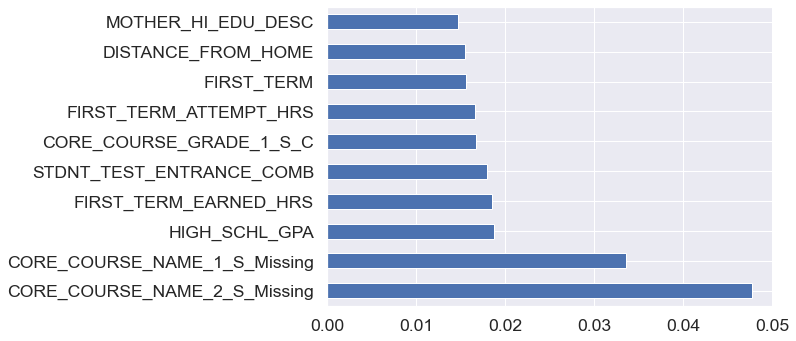

In [169]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

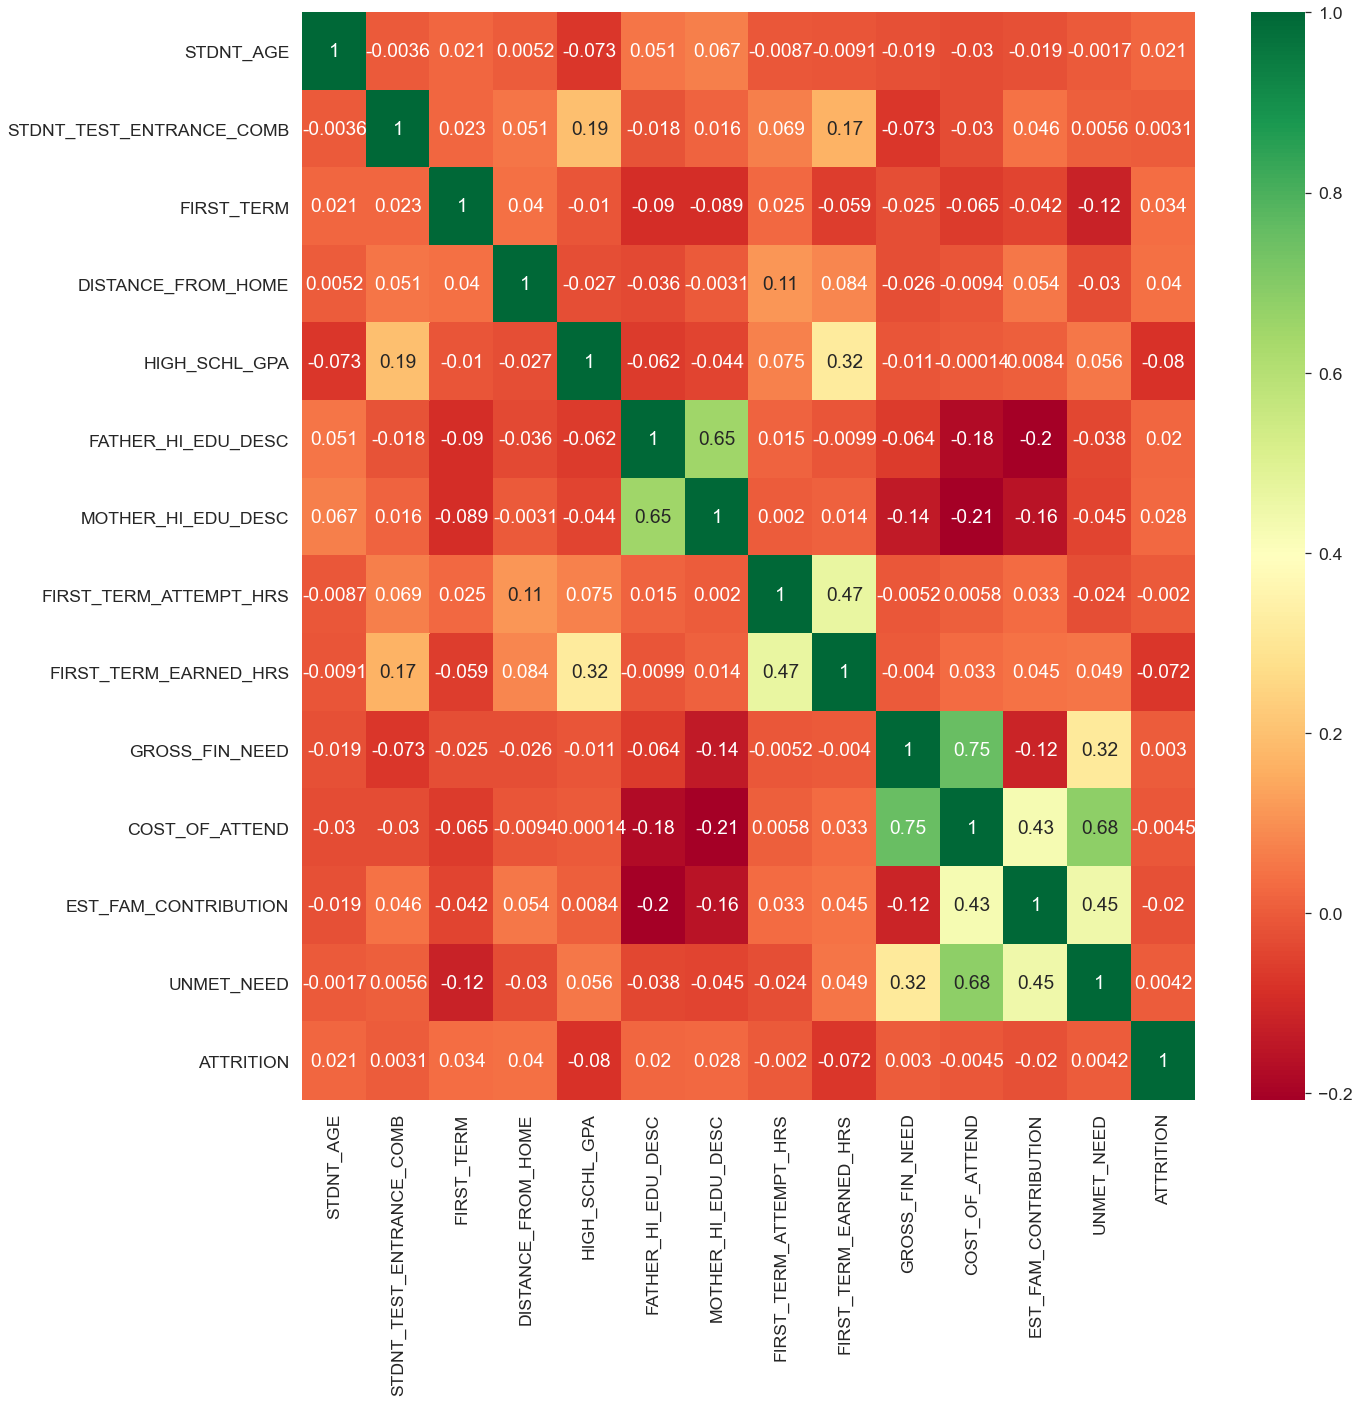

In [170]:
#correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = dat.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dat[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#variable importance using random forest

In [171]:

features=dat.copy()
features=features.drop(['ATTRITION'],axis=1)
features=pd.get_dummies(features)
labels = dat['ATTRITION']

In [172]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

#from sklearn.metrics import accuracy_score
#accuracy = accuracy_score(preds,labels)
#print(accuracy)

In [173]:
features.shape

(3380, 432)

In [174]:
from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)

VI = VI.reset_index()

#VI.sort_values(['RF'],ascending=0)
print(VI.nlargest(20,'RF'))

                              index        RF
410    CORE_COURSE_NAME_2_S_Missing  0.041860
4                     HIGH_SCHL_GPA  0.039647
332    CORE_COURSE_NAME_1_S_Missing  0.032614
8             FIRST_TERM_EARNED_HRS  0.032574
1          STDNT_TEST_ENTRANCE_COMB  0.029919
7            FIRST_TERM_ATTEMPT_HRS  0.023928
3                DISTANCE_FROM_HOME  0.023372
10                   COST_OF_ATTEND  0.022640
2                        FIRST_TERM  0.021870
11             EST_FAM_CONTRIBUTION  0.021088
9                    GROSS_FIN_NEED  0.018632
5                FATHER_HI_EDU_DESC  0.017157
6                MOTHER_HI_EDU_DESC  0.016393
345         CORE_COURSE_GRADE_1_S_C  0.014312
12                       UNMET_NEED  0.011697
0                         STDNT_AGE  0.011509
344         CORE_COURSE_GRADE_1_S_B  0.010803
298  CORE_COURSE_NAME_1_S_ENGL 1102  0.009420
191         CORE_COURSE_GRADE_1_F_F  0.009258
425         CORE_COURSE_GRADE_2_S_F  0.008877


In [ ]:
#variable selection using recursive feature elimination

In [175]:


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(features, labels)

In [176]:
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

In [177]:
Selected[Selected['RFE'] == True]

index   RFE
0                   STDNT_AGE  True
1    STDNT_TEST_ENTRANCE_COMB  True
2                  FIRST_TERM  True
3          DISTANCE_FROM_HOME  True
4               HIGH_SCHL_GPA  True
5          FATHER_HI_EDU_DESC  True
6          MOTHER_HI_EDU_DESC  True
7      FIRST_TERM_ATTEMPT_HRS  True
8       FIRST_TERM_EARNED_HRS  True
9              GROSS_FIN_NEED  True
10             COST_OF_ATTEND  True
11       EST_FAM_CONTRIBUTION  True
24            IN_STATE_FLAG_Y  True
25        INTERNATIONAL_STS_N  True
109             STDNT_MINOR_N  True
188   CORE_COURSE_GRADE_1_F_B  True
270   CORE_COURSE_GRADE_2_F_B  True
344   CORE_COURSE_GRADE_1_S_B  True
427    HOUSING_STS_Off Campus  True
430         DEGREE_GROUP_CD_B  True

In [178]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

[9.59545152e-03 1.70826828e-02 1.68063413e-02 1.59942189e-02
 1.86560960e-02 1.43125640e-02 1.42053746e-02 1.71362347e-02
 1.79037308e-02 1.18775662e-02 1.45748138e-02 1.17771974e-02
 1.26779623e-02 8.64111754e-03 8.98238874e-03 9.05349941e-03
 2.35944827e-03 7.93608306e-03 3.21368702e-03 1.14696147e-03
 1.75779783e-03 9.53150795e-04 1.05699783e-04 4.93378295e-03
 5.07529672e-03 1.49015867e-03 1.40955390e-03 1.49827301e-03
 1.08925969e-03 2.59036108e-03 3.32056829e-04 6.40145771e-03
 1.31411853e-03 1.55897051e-03 2.48959427e-07 2.31832082e-03
 1.99068039e-03 1.55747051e-03 3.58550339e-03 4.14544530e-04
 3.73376199e-03 4.23663283e-04 2.37561578e-03 1.60032373e-03
 9.40025455e-04 2.82877001e-03 1.76044681e-03 1.50387981e-04
 3.55157961e-04 2.65716784e-03 4.87066003e-04 2.34216330e-05
 9.95344164e-04 1.44547426e-03 8.61306577e-04 9.24357718e-04
 6.46168955e-04 1.32980404e-03 5.32896085e-06 3.04108973e-03
 1.30818569e-03 2.69879044e-03 9.45953978e-04 1.19515942e-04
 3.78324635e-04 1.048899

In [179]:

from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)

In [180]:
FI = FI.reset_index()

In [181]:
FI.sort_values(['Extratrees'],ascending=0).head(10)

index  Extratrees
410  CORE_COURSE_NAME_2_S_Missing    0.046350
332  CORE_COURSE_NAME_1_S_Missing    0.035856
4                   HIGH_SCHL_GPA    0.018656
8           FIRST_TERM_EARNED_HRS    0.017904
7          FIRST_TERM_ATTEMPT_HRS    0.017136
1        STDNT_TEST_ENTRANCE_COMB    0.017083
2                      FIRST_TERM    0.016806
3              DISTANCE_FROM_HOME    0.015994
345       CORE_COURSE_GRADE_1_S_C    0.015193
10                 COST_OF_ATTEND    0.014575

In [182]:
print(FI.nlargest(20,'Extratrees'))

                              index  Extratrees
410    CORE_COURSE_NAME_2_S_Missing    0.046350
332    CORE_COURSE_NAME_1_S_Missing    0.035856
4                     HIGH_SCHL_GPA    0.018656
8             FIRST_TERM_EARNED_HRS    0.017904
7            FIRST_TERM_ATTEMPT_HRS    0.017136
1          STDNT_TEST_ENTRANCE_COMB    0.017083
2                        FIRST_TERM    0.016806
3                DISTANCE_FROM_HOME    0.015994
345         CORE_COURSE_GRADE_1_S_C    0.015193
10                   COST_OF_ATTEND    0.014575
5                FATHER_HI_EDU_DESC    0.014313
6                MOTHER_HI_EDU_DESC    0.014205
12                       UNMET_NEED    0.012678
344         CORE_COURSE_GRADE_1_S_B    0.012547
9                    GROSS_FIN_NEED    0.011878
11             EST_FAM_CONTRIBUTION    0.011777
298  CORE_COURSE_NAME_1_S_ENGL 1102    0.011205
191         CORE_COURSE_GRADE_1_F_F    0.009670
0                         STDNT_AGE    0.009595
427          HOUSING_STS_Off Campus    0

In [183]:
features=dat.copy()
features=features.drop(['ATTRITION'],axis=1)
features1=pd.get_dummies(features)

In [184]:
features=dat.copy()
features=features.drop(['ATTRITION'],axis=1)
features=pd.get_dummies(features)
labels = dat['ATTRITION']

In [143]:

#df1 = dat.copy()

#from sklearn import preprocessing
#from collections import defaultdict
#d = defaultdict(preprocessing.LabelEncoder)
# Encoding the categorical variable
#fit = df1.apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
#for i in list(d.keys()):
#    df1[i] = d[i].transform(df1[i])

In [144]:
#features1 = df1[df1.columns.difference(['ATTRITION'])]
#labels1 = df1['ATTRITION']

In [145]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

#model = SelectKBest(score_func=chi2, k=5)
#fit = model.fit(features1, labels1)

In [146]:

#from pandas import DataFrame
#pd.options.display.float_format = '{:.2f}'.format
#chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features1.columns)

In [147]:
#chi_sq = chi_sq.reset_index()

In [148]:
#chi_sq.sort_values('Chi_Square',ascending=0)

In [149]:
#print(FI.nlargest(10,'Chi_Square'))

In [150]:
#A.head()
#chisqu=pd.DataFrame(b)

In [151]:
#from scipy.stats import chi2_contingency
#import seaborn as sns

In [286]:
#for i in A.columns:
#    col=A[i]
#    table=pd.crosstab(b,col)
#   chi2,p,dof,expected=chi2_contingency(table.values)
#    chisqu[i]=p

In [ ]:
#plt.figure(figsize=(20,1))
#sns.heatmap(chisqu,annot=True,fmt='.2f')
#plt.show()

In [154]:
#chi=chisqu.transpose().reset_index()


#chi[chi['ATTRITION']<0.05]

In [243]:
#l1 feature selection

In [185]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [186]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [187]:
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)

In [188]:
l1 = l1.reset_index()

In [189]:

l1[l1['L1'] == True]

index    L1
3                DISTANCE_FROM_HOME  True
6                MOTHER_HI_EDU_DESC  True
7            FIRST_TERM_ATTEMPT_HRS  True
8             FIRST_TERM_EARNED_HRS  True
14                   STDNT_GENDER_M  True
15           STDNT_BACKGROUND_BGD 1  True
188         CORE_COURSE_GRADE_1_F_B  True
191         CORE_COURSE_GRADE_1_F_F  True
269         CORE_COURSE_GRADE_2_F_A  True
271         CORE_COURSE_GRADE_2_F_C  True
298  CORE_COURSE_NAME_1_S_ENGL 1102  True
332    CORE_COURSE_NAME_1_S_Missing  True
343         CORE_COURSE_GRADE_1_S_A  True
344         CORE_COURSE_GRADE_1_S_B  True
347         CORE_COURSE_GRADE_1_S_F  True
410    CORE_COURSE_NAME_2_S_Missing  True
425         CORE_COURSE_GRADE_2_S_F  True
427          HOUSING_STS_Off Campus  True

In [190]:

#combine all together

In [191]:
from functools import reduce#, chi_sq
dfs = [VI, Selected, FI, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

In [192]:

final_results.columns

Index(['index', 'RF', 'RFE', 'Extratrees', 'L1'], dtype='object')

In [193]:
final_results.head(10)

index        RF   RFE  Extratrees     L1
0                 STDNT_AGE  0.011509  True    0.009595  False
1  STDNT_TEST_ENTRANCE_COMB  0.029919  True    0.017083  False
2                FIRST_TERM  0.021870  True    0.016806  False
3        DISTANCE_FROM_HOME  0.023372  True    0.015994   True
4             HIGH_SCHL_GPA  0.039647  True    0.018656  False
5        FATHER_HI_EDU_DESC  0.017157  True    0.014313  False
6        MOTHER_HI_EDU_DESC  0.016393  True    0.014205   True
7    FIRST_TERM_ATTEMPT_HRS  0.023928  True    0.017136   True
8     FIRST_TERM_EARNED_HRS  0.032574  True    0.017904   True
9            GROSS_FIN_NEED  0.018632  True    0.011878  False

In [194]:
#variable score


In [195]:
columns = ['RF','RFE', 'Extratrees', 'L1']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

score_table['final_score'] = score_table.sum(axis=1)

In [196]:

score_table.sort_values('final_score',ascending=0).head(10)

index  RF  RFE  Extratrees  L1  final_score
8           FIRST_TERM_EARNED_HRS   1    1           1   1            4
4                   HIGH_SCHL_GPA   1    1           1   0            3
7          FIRST_TERM_ATTEMPT_HRS   0    1           1   1            3
410  CORE_COURSE_NAME_2_S_Missing   1    0           1   1            3
332  CORE_COURSE_NAME_1_S_Missing   1    0           1   1            3
344       CORE_COURSE_GRADE_1_S_B   0    1           0   1            2
3              DISTANCE_FROM_HOME   0    1           0   1            2
6              MOTHER_HI_EDU_DESC   0    1           0   1            2
188       CORE_COURSE_GRADE_1_F_B   0    1           0   1            2
427        HOUSING_STS_Off Campus   0    1           0   1            2

In [197]:
print(score_table.nlargest(10,'final_score'))

                            index  RF  RFE  Extratrees  L1  final_score
8           FIRST_TERM_EARNED_HRS   1    1           1   1            4
4                   HIGH_SCHL_GPA   1    1           1   0            3
7          FIRST_TERM_ATTEMPT_HRS   0    1           1   1            3
332  CORE_COURSE_NAME_1_S_Missing   1    0           1   1            3
410  CORE_COURSE_NAME_2_S_Missing   1    0           1   1            3
1        STDNT_TEST_ENTRANCE_COMB   1    1           0   0            2
3              DISTANCE_FROM_HOME   0    1           0   1            2
6              MOTHER_HI_EDU_DESC   0    1           0   1            2
188       CORE_COURSE_GRADE_1_F_B   0    1           0   1            2
344       CORE_COURSE_GRADE_1_S_B   0    1           0   1            2


In [198]:
#Multicollinearity-VIF(ADDON)

In [199]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [200]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [201]:
#vif = calculate_vif(features)
#while vif['VIF'][vif['VIF'] > 10].any():
#    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
#    features.drop(remove,axis=1,inplace=True)
#    vif = calculate_vif(features)

In [202]:
#vif

In [203]:
#removing the below variables as they are already represented by another column
dat=dat.drop(['EST_FAM_CONTRIBUTION','DEGREE_GROUP_CD'],axis=1)

In [204]:
dat.columns

Index(['STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND', 'IN_STATE_FLAG',
       'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR',
       'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'CORE_COURSE_NAME_1_F',
       'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S', 'HOUSING_STS', 'DISTANCE_FROM_HOME',
       'HIGH_SCHL_GPA', 'FATHER_HI_EDU_DESC', 'MOTHER_HI_EDU_DESC',
       'FIRST_TERM_ATTEMPT_HRS', 'FIRST_TERM_EARNED_HRS', 'GROSS_FIN_NEED',
       'COST_OF_ATTEND', 'UNMET_NEED', 'ATTRITION'],
      dtype='object')

In [205]:
#PRE-PROCESSING

In [206]:


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [207]:
df = dat.copy()

In [208]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [209]:
#lets remove the below columns so we can add the encoded varaibles done previously for the same column

df=df.drop(['STDNT_MAJOR','STDNT_MINOR','CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S'],axis=1)

In [210]:

df1=pd.get_dummies(df)
#,drop_first=True- this also can be used to prevent from dummy variable trap

In [211]:
df_col= pd.concat([df1,sam2], axis=1)
df_col.head()

STDNT_AGE  STDNT_GENDER  IN_STATE_FLAG  INTERNATIONAL_STS  \
0         18             0              1                  0   
1         19             0              0                  0   
2         18             1              1                  0   
3         18             1              1                  0   
4         18             0              1                  0   

   STDNT_TEST_ENTRANCE_COMB  FIRST_TERM  HOUSING_STS  DISTANCE_FROM_HOME  \
0                    1150.0      200708            1               150.0   
1                    1190.0      200808            0                69.0   
2                    1030.0      201008            1               150.0   
3                    1220.0      200708            1               150.0   
4                    1190.0      200808            0                69.0   

   HIGH_SCHL_GPA  FATHER_HI_EDU_DESC  MOTHER_HI_EDU_DESC  \
0           4.00                   8                  13   
1           2.89                   5                  10   
2           3.39                   6                  12   
3           2.93                   5                  10   
4           3.86                   5                  11   

   FIRST_TERM_ATTEMPT_HRS  FIRST_TERM_EARNED_HRS  GROSS_FIN_NEED  \
0                      16                     16               0   
1                      18                     18          570000   
2                      15                     15               0   
3                      13                     13               0   
4                      12                     12          835920   

   COST_OF_ATTEND  UNMET_NEED  ATTRITION  STDNT_BACKGROUND_BGD 1  \
0               0         0.0          1                       1   
1         1355760         1.0          0                       1   
2               0         0.0          0                       1   
3               0         0.0          0                       1   
4         1355760         1.0          0                       1   

   STDNT_BACKGROUND_BGD 2  STDNT_BACKGROUND_BGD 3  STDNT_BACKGROUND_BGD 4  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   STDNT_BACKGROUND_BGD 5  STDNT_BACKGROUND_BGD 6  STDNT_BACKGROUND_BGD 7  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   STDNT_BACKGROUND_BGD 8  CORE_COURSE_GRADE_1_F_A  CORE_COURSE_GRADE_1_F_B  \
0                       0                        1                        0   
1                       0                        1                        0   
2                       0                        1                        0   
3                       0                        1                        0   
4                       0                        1                        0   

   CORE_COURSE_GRADE_1_F_C  CORE_COURSE_GRADE_1_F_D  CORE_COURSE_GRADE_1_F_F  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   CORE_COURSE_GRADE_1_F_INCOMPL  CORE_COURSE_GRADE_1_F_NOT REP  \
0                              0 

In [212]:
df1_final=df_col.copy()

In [213]:
df1_final.shape

(3380, 113)

In [214]:
#size
print('Size of Full Encoded Dataset: {}'. format(df1_final.shape))

Size of Full Encoded Dataset: (3380, 113)


In [215]:
df1_final.head()

STDNT_AGE  STDNT_GENDER  IN_STATE_FLAG  INTERNATIONAL_STS  \
0         18             0              1                  0   
1         19             0              0                  0   
2         18             1              1                  0   
3         18             1              1                  0   
4         18             0              1                  0   

   STDNT_TEST_ENTRANCE_COMB  FIRST_TERM  HOUSING_STS  DISTANCE_FROM_HOME  \
0                    1150.0      200708            1               150.0   
1                    1190.0      200808            0                69.0   
2                    1030.0      201008            1               150.0   
3                    1220.0      200708            1               150.0   
4                    1190.0      200808            0                69.0   

   HIGH_SCHL_GPA  FATHER_HI_EDU_DESC  MOTHER_HI_EDU_DESC  \
0           4.00                   8                  13   
1           2.89                   5                  10   
2           3.39                   6                  12   
3           2.93                   5                  10   
4           3.86                   5                  11   

   FIRST_TERM_ATTEMPT_HRS  FIRST_TERM_EARNED_HRS  GROSS_FIN_NEED  \
0                      16                     16               0   
1                      18                     18          570000   
2                      15                     15               0   
3                      13                     13               0   
4                      12                     12          835920   

   COST_OF_ATTEND  UNMET_NEED  ATTRITION  STDNT_BACKGROUND_BGD 1  \
0               0         0.0          1                       1   
1         1355760         1.0          0                       1   
2               0         0.0          0                       1   
3               0         0.0          0                       1   
4         1355760         1.0          0                       1   

   STDNT_BACKGROUND_BGD 2  STDNT_BACKGROUND_BGD 3  STDNT_BACKGROUND_BGD 4  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   STDNT_BACKGROUND_BGD 5  STDNT_BACKGROUND_BGD 6  STDNT_BACKGROUND_BGD 7  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   STDNT_BACKGROUND_BGD 8  CORE_COURSE_GRADE_1_F_A  CORE_COURSE_GRADE_1_F_B  \
0                       0                        1                        0   
1                       0                        1                        0   
2                       0                        1                        0   
3                       0                        1                        0   
4                       0                        1                        0   

   CORE_COURSE_GRADE_1_F_C  CORE_COURSE_GRADE_1_F_D  CORE_COURSE_GRADE_1_F_F  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   CORE_COURSE_GRADE_1_F_INCOMPL  CORE_COURSE_GRADE_1_F_NOT REP  \
0                              0 

In [216]:
#lets use lasso regression for variable selection

In [217]:
df1_feat=df1_final.copy()
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [218]:

## Capture the dependent feature
y_train_feat=df1_feat[['ATTRITION']]

In [219]:
## drop dependent feature from dataset
X_train_feat=df1_feat.drop(['ATTRITION'],axis=1)

In [220]:
scaler=StandardScaler()
scaler.fit(X_train_feat)
#.fillna(0)
#scaling since linear model benifit from feature scaling
#we can also do the train and test split bed=fore doing this and do the test on train data of the main dataset

StandardScaler(copy=True, with_mean=True, with_std=True)

In [221]:

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train_feat, y_train_feat)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [222]:
feature_sel_model.get_support()

array([False,  True, False, False,  True,  True,  True,  True, False,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False,  True, False,
        True,  True, False, False,  True,  True,  True, False,  True,
       False, False,  True,  True,  True, False,  True, False, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [223]:

# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train_feat.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train_feat.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

#removed_feats=X_train_feat.columns[(feature_sel_model.estimator_.coef_==0).ravel().tolist()]
#print(removed_feats)

total features: 112
selected features: 22
features with coefficients shrank to zero: 88


In [224]:

selected_feat

Index(['STDNT_GENDER', 'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'HOUSING_STS',
       'DISTANCE_FROM_HOME', 'MOTHER_HI_EDU_DESC', 'STDNT_BACKGROUND_BGD 1',
       'STDNT_BACKGROUND_BGD 3', 'CORE_COURSE_GRADE_1_F_B',
       'CORE_COURSE_GRADE_1_F_D', 'CORE_COURSE_GRADE_1_F_F',
       'CORE_COURSE_GRADE_2_F_A', 'CORE_COURSE_GRADE_2_F_B',
       'CORE_COURSE_GRADE_2_F_C', 'CORE_COURSE_GRADE_2_F_F',
       'CORE_COURSE_GRADE_1_S_A', 'CORE_COURSE_GRADE_1_S_B',
       'CORE_COURSE_GRADE_1_S_C', 'CORE_COURSE_GRADE_1_S_F',
       'CORE_COURSE_GRADE_2_S_A', 'CORE_COURSE_GRADE_2_S_C',
       'CORE_COURSE_GRADE_2_S_F'],
      dtype='object')

In [225]:
X_train_featselect=X_train_feat[selected_feat]

In [226]:

X_train_featselect.head()

STDNT_GENDER  STDNT_TEST_ENTRANCE_COMB  FIRST_TERM  HOUSING_STS  \
0             0                    1150.0      200708            1   
1             0                    1190.0      200808            0   
2             1                    1030.0      201008            1   
3             1                    1220.0      200708            1   
4             0                    1190.0      200808            0   

   DISTANCE_FROM_HOME  MOTHER_HI_EDU_DESC  STDNT_BACKGROUND_BGD 1  \
0               150.0                  13                       1   
1                69.0                  10                       1   
2               150.0                  12                       1   
3               150.0                  10                       1   
4                69.0                  11                       1   

   STDNT_BACKGROUND_BGD 3  CORE_COURSE_GRADE_1_F_B  CORE_COURSE_GRADE_1_F_D  \
0                       0                        0                        0   
1                       0                        0                        0   
2                       0                        0                        0   
3                       0                        0                        0   
4                       0                        0                        0   

   CORE_COURSE_GRADE_1_F_F  CORE_COURSE_GRADE_2_F_A  CORE_COURSE_GRADE_2_F_B  \
0                        0                        1                        0   
1                        0                        1                        0   
2                        0                        1                        0   
3                        0                        1                        0   
4                        0                        1                        0   

   CORE_COURSE_GRADE_2_F_C  CORE_COURSE_GRADE_2_F_F  CORE_COURSE_GRADE_1_S_A  \
0                        0                        0                        1   
1                        0                        0                        1   
2                        0                        0                        1   
3                        0                        0                        1   
4                        0                        0                        1   

   CORE_COURSE_GRADE_1_S_B  CORE_COURSE_GRADE_1_S_C  CORE_COURSE_GRADE_1_S_F  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   CORE_COURSE_GRADE_2_S_A  CORE_COURSE_GRADE_2_S_C  CORE_COURSE_GRADE_2_S_F  
0                        1                        0                        0  
1                        1                        0                        0  
2                        1                        0                        0  
3                        1                        0                        0  
4                        1                        0                        0

In [227]:
## drop dependent feature from dataset
X_train_feat=df1_feat.drop(['ATTRITION'],axis=1)
## Capture the dependent feature
y_train_feat=df1_feat[['ATTRITION']]

In [228]:
sel_ = SelectFromModel(LogisticRegression(C=1,penalty='l2')) # remember to set the seed, the random state in this function
sel_.fit(scaler.transform(X_train_feat), y_train_feat)

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [229]:
sel_.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True, False, False,  True,  True, False, False,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [230]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train_feat.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train_feat.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

#removed_feats=X_train_feat.columns[(sel_.estimator_.coef_==0).ravel().tolist()]
#print(removed_feats)
#X_train_selected=sel.transform(X_train.fillna(0))
#X_test_selected=sel.transform(X_train.fillna(0))

total features: 112
selected features: 22
features with coefficients shrank to zero: 0


In [231]:
selected_feat

Index(['STDNT_GENDER', 'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'HOUSING_STS',
       'DISTANCE_FROM_HOME', 'MOTHER_HI_EDU_DESC', 'STDNT_BACKGROUND_BGD 1',
       'STDNT_BACKGROUND_BGD 3', 'CORE_COURSE_GRADE_1_F_B',
       'CORE_COURSE_GRADE_1_F_D', 'CORE_COURSE_GRADE_1_F_F',
       'CORE_COURSE_GRADE_2_F_A', 'CORE_COURSE_GRADE_2_F_B',
       'CORE_COURSE_GRADE_2_F_C', 'CORE_COURSE_GRADE_2_F_F',
       'CORE_COURSE_GRADE_1_S_A', 'CORE_COURSE_GRADE_1_S_B',
       'CORE_COURSE_GRADE_1_S_C', 'CORE_COURSE_GRADE_1_S_F',
       'CORE_COURSE_GRADE_2_S_A', 'CORE_COURSE_GRADE_2_S_C',
       'CORE_COURSE_GRADE_2_S_F'],
      dtype='object')

In [232]:
#lets proceed with train-test split

In [233]:
df1_final.head()

STDNT_AGE  STDNT_GENDER  IN_STATE_FLAG  INTERNATIONAL_STS  \
0         18             0              1                  0   
1         19             0              0                  0   
2         18             1              1                  0   
3         18             1              1                  0   
4         18             0              1                  0   

   STDNT_TEST_ENTRANCE_COMB  FIRST_TERM  HOUSING_STS  DISTANCE_FROM_HOME  \
0                    1150.0      200708            1               150.0   
1                    1190.0      200808            0                69.0   
2                    1030.0      201008            1               150.0   
3                    1220.0      200708            1               150.0   
4                    1190.0      200808            0                69.0   

   HIGH_SCHL_GPA  FATHER_HI_EDU_DESC  MOTHER_HI_EDU_DESC  \
0           4.00                   8                  13   
1           2.89                   5                  10   
2           3.39                   6                  12   
3           2.93                   5                  10   
4           3.86                   5                  11   

   FIRST_TERM_ATTEMPT_HRS  FIRST_TERM_EARNED_HRS  GROSS_FIN_NEED  \
0                      16                     16               0   
1                      18                     18          570000   
2                      15                     15               0   
3                      13                     13               0   
4                      12                     12          835920   

   COST_OF_ATTEND  UNMET_NEED  ATTRITION  STDNT_BACKGROUND_BGD 1  \
0               0         0.0          1                       1   
1         1355760         1.0          0                       1   
2               0         0.0          0                       1   
3               0         0.0          0                       1   
4         1355760         1.0          0                       1   

   STDNT_BACKGROUND_BGD 2  STDNT_BACKGROUND_BGD 3  STDNT_BACKGROUND_BGD 4  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   STDNT_BACKGROUND_BGD 5  STDNT_BACKGROUND_BGD 6  STDNT_BACKGROUND_BGD 7  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   STDNT_BACKGROUND_BGD 8  CORE_COURSE_GRADE_1_F_A  CORE_COURSE_GRADE_1_F_B  \
0                       0                        1                        0   
1                       0                        1                        0   
2                       0                        1                        0   
3                       0                        1                        0   
4                       0                        1                        0   

   CORE_COURSE_GRADE_1_F_C  CORE_COURSE_GRADE_1_F_D  CORE_COURSE_GRADE_1_F_F  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   CORE_COURSE_GRADE_1_F_INCOMPL  CORE_COURSE_GRADE_1_F_NOT REP  \
0                              0 

In [234]:
## drop dependent feature from dataset
df1_final=df1_final.drop(['ATTRITION'],axis=1)
target = dat['ATTRITION'].copy()

In [235]:
#import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df1_final,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2535, 112)
Number transactions y_train dataset:  (2535,)
Number transactions X_test dataset:  (845, 112)
Number transactions y_test dataset:  (845,)


In [236]:
X_train.head()

STDNT_AGE  STDNT_GENDER  IN_STATE_FLAG  INTERNATIONAL_STS  \
1912         18             0              1                  0   
1223         18             0              1                  0   
198          18             0              1                  0   
713          18             0              1                  0   
3116         18             1              1                  0   

      STDNT_TEST_ENTRANCE_COMB  FIRST_TERM  HOUSING_STS  DISTANCE_FROM_HOME  \
1912                    1300.0      200908            1               190.0   
1223                    1070.0      200508            0                90.0   
198                      970.0      200908            0                69.0   
713                      950.0      200508            1               150.0   
3116                    1110.0      200808            0                69.0   

      HIGH_SCHL_GPA  FATHER_HI_EDU_DESC  MOTHER_HI_EDU_DESC  \
1912          3.850                   5                  10   
1223          2.656                   6                  11   
198           3.780                   6                  11   
713           3.250                   8                  13   
3116          2.570                   8                  13   

      FIRST_TERM_ATTEMPT_HRS  FIRST_TERM_EARNED_HRS  GROSS_FIN_NEED  \
1912                      16                     16         1130760   
1223                      15                     15          390960   
198                       15                     15         1337460   
713                       16                     15               0   
3116                      13                     13               0   

      COST_OF_ATTEND  UNMET_NEED  STDNT_BACKGROUND_BGD 1  \
1912         1418100         1.0                       1   
1223         1146420         1.0                       1   
198          1409460         1.0                       1   
713                0         0.0                       0   
3116               0         0.0                       1   

      STDNT_BACKGROUND_BGD 2  STDNT_BACKGROUND_BGD 3  STDNT_BACKGROUND_BGD 4  \
1912                       0                       0                       0   
1223                       0                       0                       0   
198                        0                       0                       0   
713                        1                       0                       0   
3116                       0                       0                       0   

      STDNT_BACKGROUND_BGD 5  STDNT_BACKGROUND_BGD 6  STDNT_BACKGROUND_BGD 7  \
1912                       0                       0                       0   
1223                       0                       0                       0   
198                        0                       0                       0   
713                        0                       0                       0   
3116                       0                       0                       0   

      STDNT_BACKGROUND_BGD 8  CORE_COURSE_GRADE_1_F_A  \
1912                       0                        0   
1223                       0                        0   
198                        0                        0   
713                        0                        0   
3116                       0                        0   

      CORE_COURSE_GRADE_1_F_B  CORE_COURSE_GRADE_1_F_C  \
1912                        1                        0   
1223                        0                        0   
198                         1                        0   
713                         0                        1   
3116                        0                        1   

      CORE_COURSE_GRADE_1_F_D  CORE_COURSE_GRADE_1_F_F  \
1912                        0                        0   
1223                        0                        0   
198                         0                        0   
713                         0                        0   
3116             

In [237]:
# sklearn modules for preprocessing
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [228]:

# selection of algorithms to consider and set performance measure

models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [229]:

acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning:

Setting a random_state has no effect since

Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  \
0       Logistic Regression         64.72         7.26          61.38   
1             Random Forest         64.26         4.90          79.01   
4  Decision Tree Classifier         54.54         2.56          68.92   
2                       SVM         51.63         6.19          78.03   
5               Gaussian NB         51.34         3.23          78.50   
3                       KNN         49.38         4.59          75.70   

   Accuracy STD  
0          3.78  
1          3.26  
4          2.41  
2          3.24  
5          3.38  
3          3.66

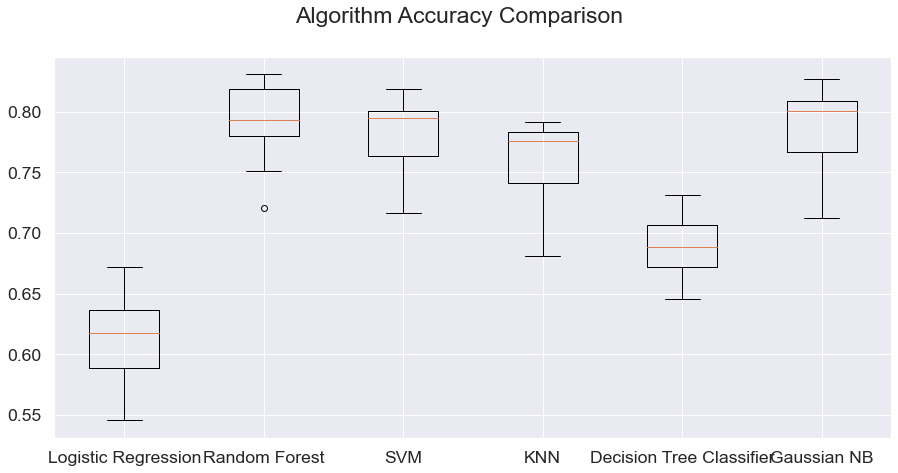

In [230]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

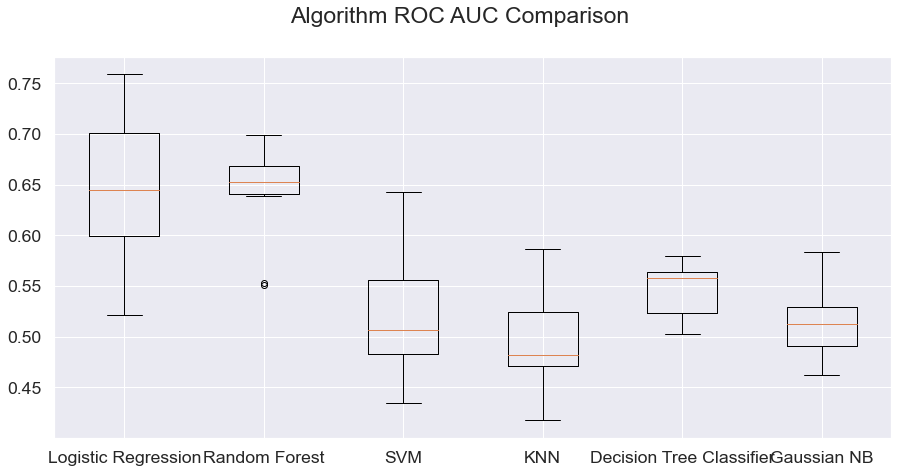

In [231]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

#logistic Regression

In [324]:

kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



AUC score (STD): 0.65 (0.07)


In [325]:
#fine tuning
#GridSearchCV allows us to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

In [326]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



best params: LogisticRegression(C=0.9709999999999999, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 0.9709999999999999}
best score: 0.6664006650589273


Text(0.5, 352.48, 'Predicted label')

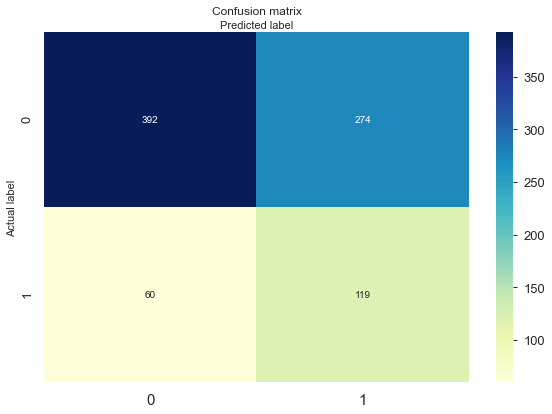

In [327]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [328]:

print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 60.47


In [329]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.59      0.70       666
           1       0.30      0.66      0.42       179

    accuracy                           0.60       845
   macro avg       0.59      0.63      0.56       845
weighted avg       0.75      0.60      0.64       845



In [330]:

log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.676


In [240]:
#recheck
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [241]:

train_Pred = logreg.predict(X_train)
metrics.confusion_matrix(y_train,train_Pred)

array([[1999,    0],
       [ 536,    0]], dtype=int64)

In [242]:
metrics.accuracy_score(y_train,train_Pred)

0.788560157790927

In [243]:

test_Pred = logreg.predict(X_test)

metrics.confusion_matrix(y_test,test_Pred)

array([[666,   0],
       [179,   0]], dtype=int64)

In [244]:

metrics.accuracy_score(y_test,test_Pred)

0.7881656804733728

In [245]:

print(classification_report(y_test, test_Pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       666
           1       0.00      0.00      0.00       179

    accuracy                           0.79       845
   macro avg       0.39      0.50      0.44       845
weighted avg       0.62      0.79      0.69       845



C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##Random Forest

In [219]:

rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



best params: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)
best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
best score: 0.6800175018912004


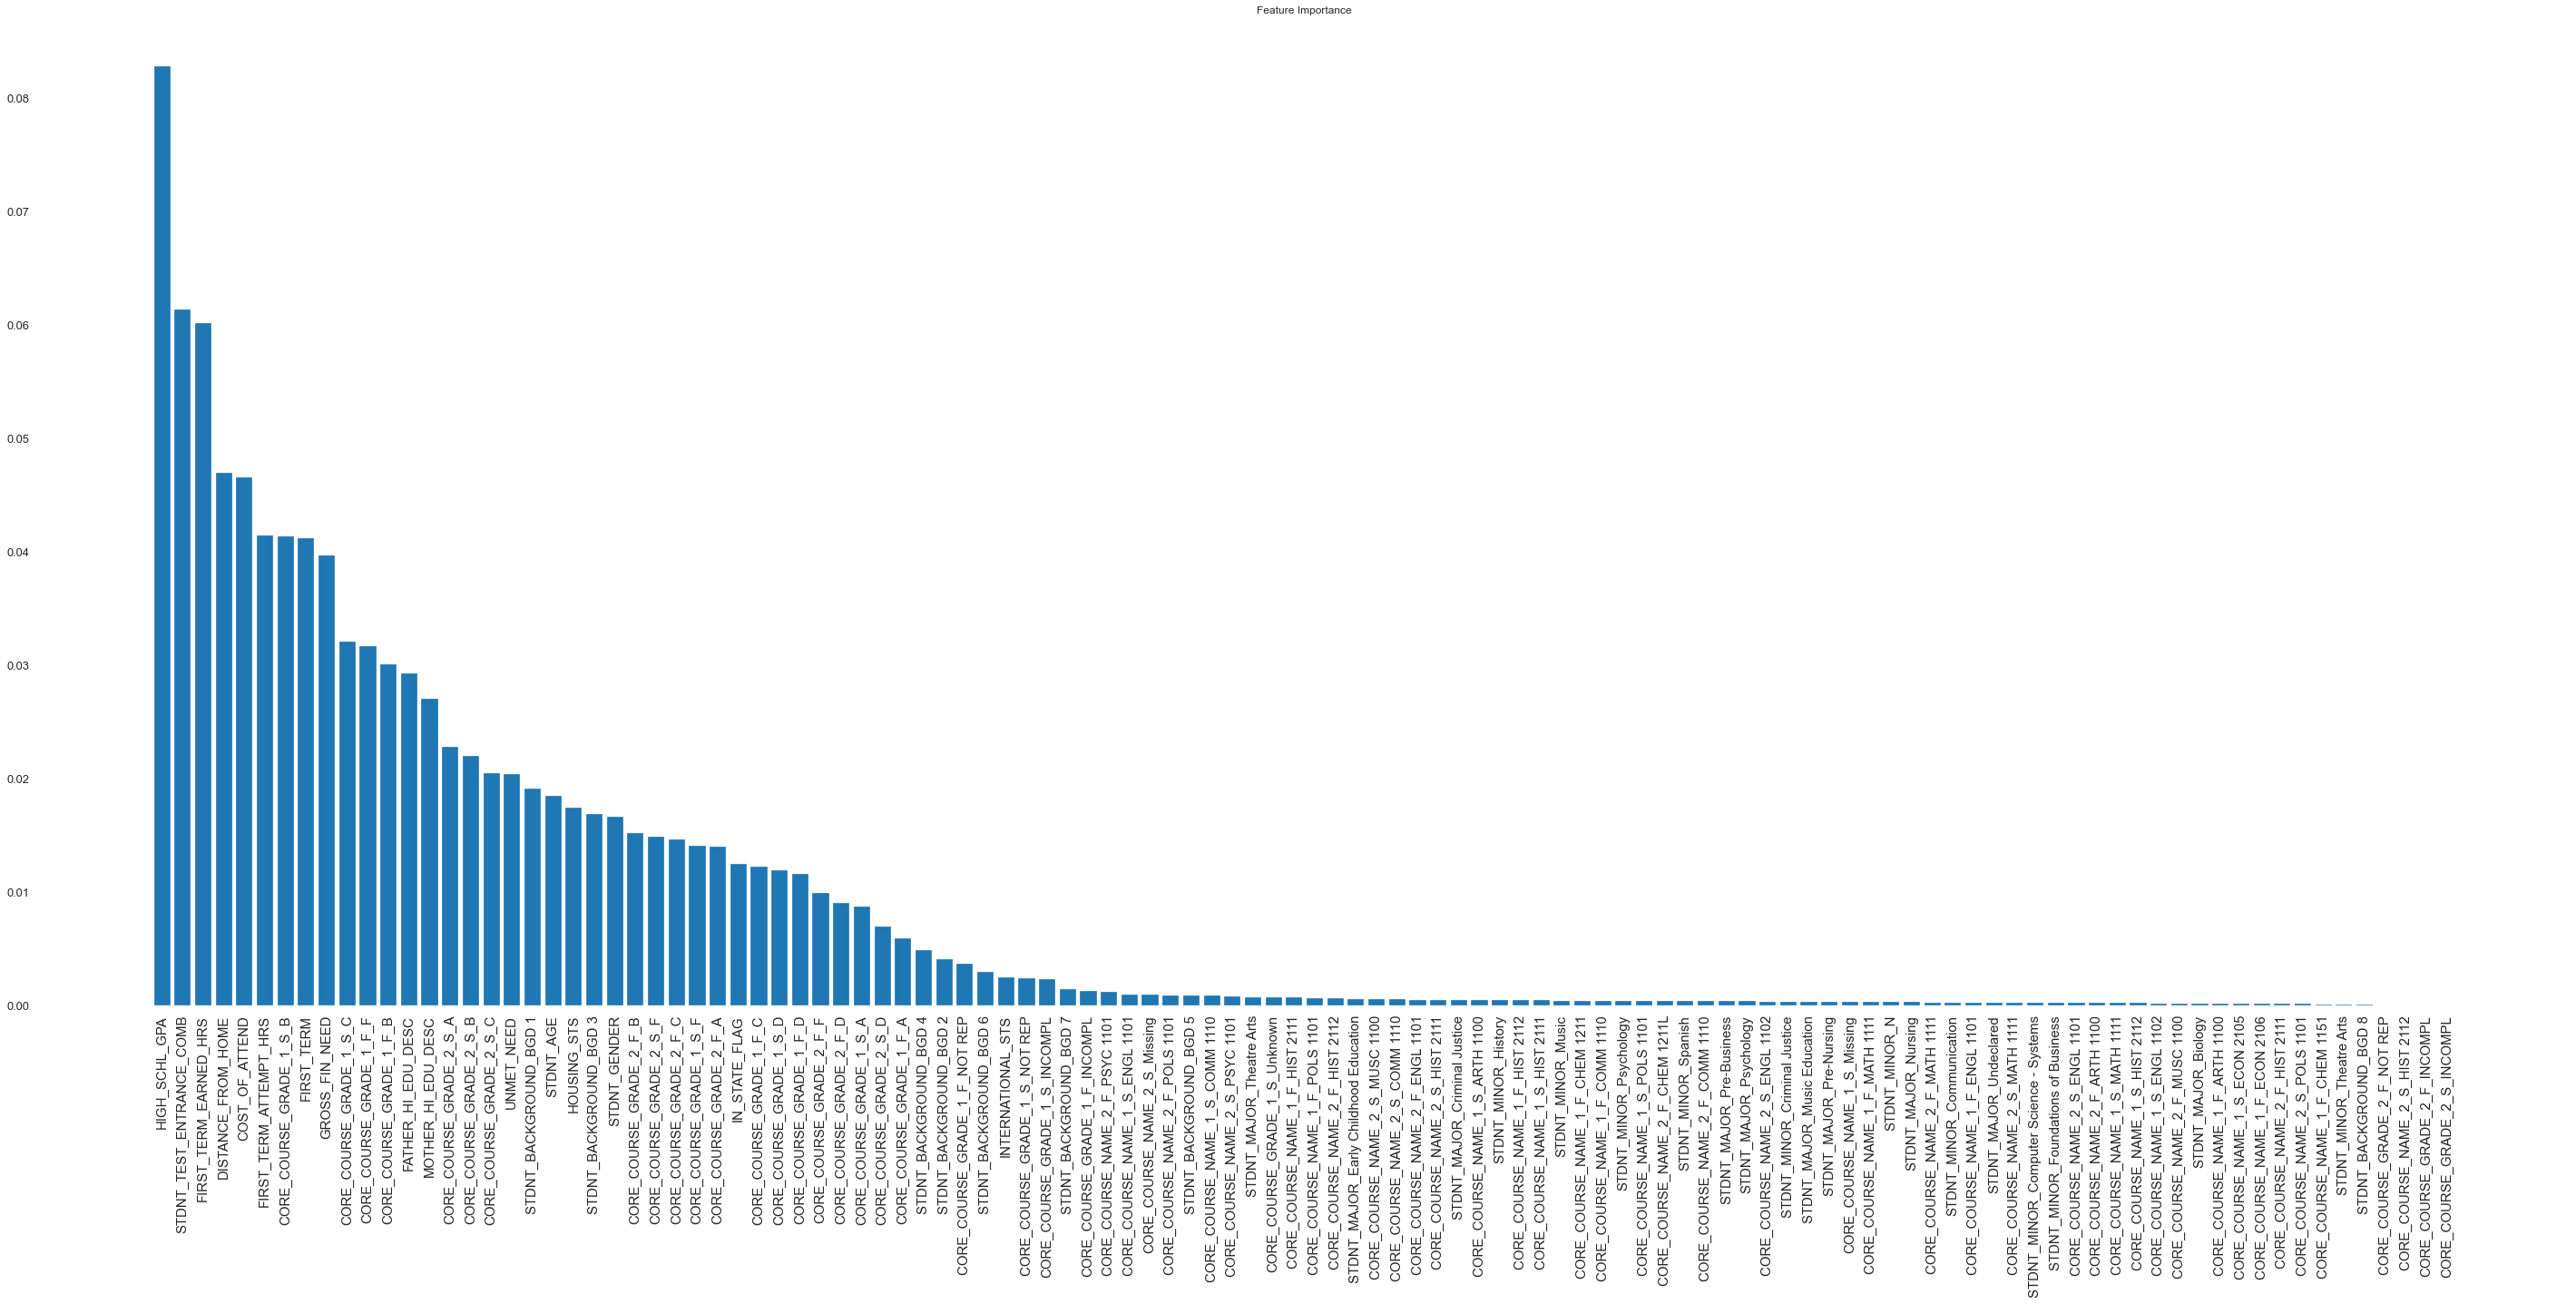

In [255]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(50, 20)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

In [221]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

Feature  Coefficient
0             HIGH_SCHL_GPA     0.082813
1  STDNT_TEST_ENTRANCE_COMB     0.061361
2     FIRST_TERM_EARNED_HRS     0.060160
3        DISTANCE_FROM_HOME     0.046939
4            COST_OF_ATTEND     0.046546
5    FIRST_TERM_ATTEMPT_HRS     0.041467
6   CORE_COURSE_GRADE_1_S_B     0.041361
7                FIRST_TERM     0.041167
8            GROSS_FIN_NEED     0.039711
9   CORE_COURSE_GRADE_1_S_C     0.032056

Text(0.5, 352.48, 'Predicted label')

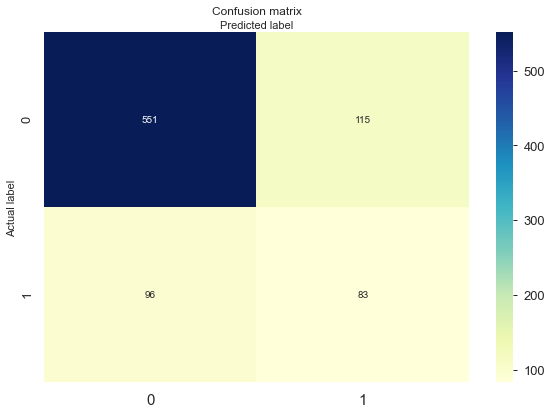

In [222]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [223]:

print('Accuracy of RandomForest  Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

Accuracy of RandomForest  Classifier on test set: 75.03


In [224]:
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       666
           1       0.42      0.46      0.44       179

    accuracy                           0.75       845
   macro avg       0.64      0.65      0.64       845
weighted avg       0.76      0.75      0.75       845



In [225]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.711


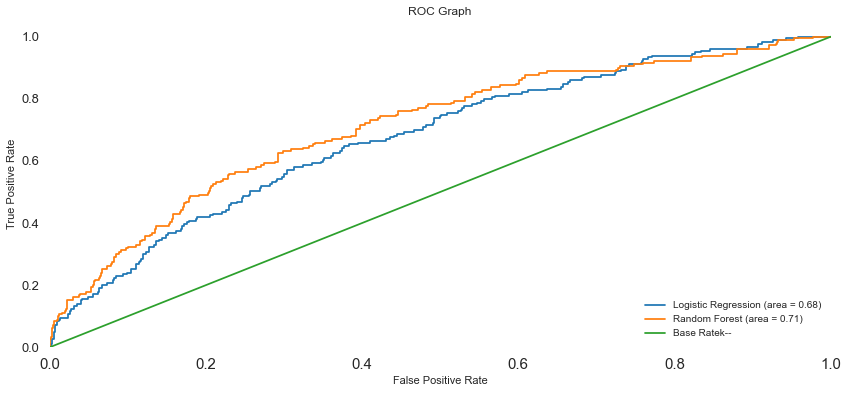

In [331]:

# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [270]:

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 50)
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [271]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

In [272]:
#hypertunning
est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              #'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }


In [273]:
def hypertuning_rscv(est, p_distr, nbr_iter,X_train,y_train):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X_train,y_train)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [274]:
rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40,X_train,y_train)

In [275]:
rf_ht_score

0.7925090229928573

In [276]:

rf_parameters

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'n_estimators': 500}

In [277]:
claasifier=RandomForestClassifier(n_jobs=-1, n_estimators=500,bootstrap= True,criterion='entropy',max_depth=None,min_samples_leaf= 2)

In [278]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [279]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[645,  21],
       [157,  22]], dtype=int64)

In [280]:
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

0.7893491124260354

In [281]:
## Cross Validation good for selecting models
from sklearn.model_selection import cross_val_score

cross_val=cross_val_score(claasifier,X_train,y_train,cv=10,scoring='accuracy').mean()
cross_val_score(claasifier,X_train,y_train,cv=10,scoring='accuracy')

array([0.7992126 , 0.79527559, 0.77952756, 0.78740157, 0.79527559,
       0.79051383, 0.79841897, 0.7944664 , 0.80237154, 0.78656126])

In [282]:
cross_val

0.7905356198064174

In [285]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [308]:

clf=RandomForestClassifier(n_jobs=-1, n_estimators=500,bootstrap= True,criterion='entropy',max_depth=3,min_samples_leaf= 2,random_state=0)
clf=clf.fit(X_train,y_train)

In [309]:
#clf.estimators_
#to check all the DT in the Random forest

[Text(418.5, 475.65000000000003, 'X[27] <= 0.5\nentropy = 0.736\nsamples = 1579\nvalue = [2010, 525]'),
 Text(209.25, 339.75, 'X[38] <= 0.5\nentropy = 0.701\nsamples = 1347\nvalue = [1757, 411]'),
 Text(104.625, 203.85000000000002, 'X[12] <= 8.5\nentropy = 0.728\nsamples = 1168\nvalue = [1509, 384]'),
 Text(52.3125, 67.94999999999999, 'entropy = 0.98\nsamples = 120\nvalue = [115, 82]'),
 Text(156.9375, 67.94999999999999, 'entropy = 0.676\nsamples = 1048\nvalue = [1394, 302]'),
 Text(313.875, 203.85000000000002, 'X[53] <= 0.5\nentropy = 0.463\nsamples = 179\nvalue = [248, 27]'),
 Text(261.5625, 67.94999999999999, 'entropy = 0.475\nsamples = 165\nvalue = [229, 26]'),
 Text(366.1875, 67.94999999999999, 'entropy = 0.286\nsamples = 14\nvalue = [19, 1]'),
 Text(627.75, 339.75, 'X[15] <= 0.5\nentropy = 0.894\nsamples = 232\nvalue = [253, 114]'),
 Text(523.125, 203.85000000000002, 'X[48] <= 0.5\nentropy = 0.843\nsamples = 122\nvalue = [140, 52]'),
 Text(470.8125, 67.94999999999999, 'entropy = 

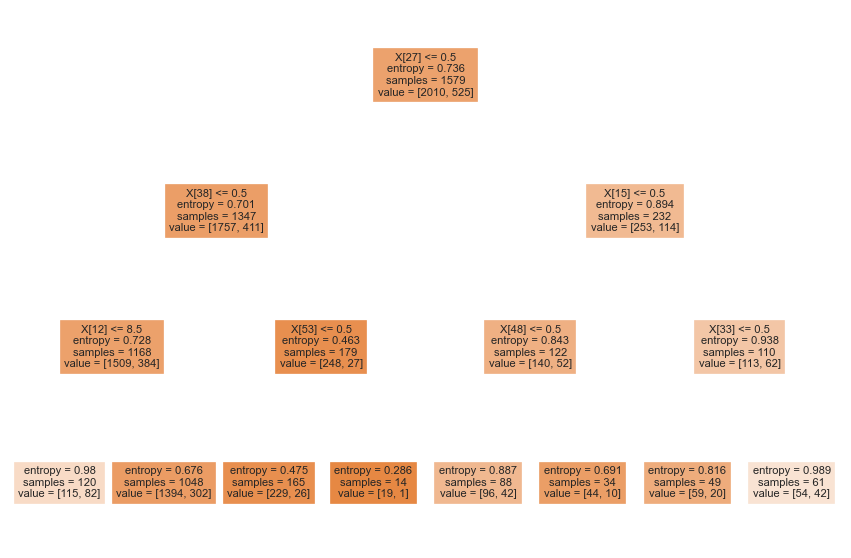

In [323]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf.estimators_[2],filled=True)

In [322]:
print(X_train.columns[27])
print(X_train.columns[38])
print(X_train.columns[15])
print(X_train.columns[12])
print(X_train.columns[53])
print(X_train.columns[48])
print(X_train.columns[33])


CORE_COURSE_GRADE_1_F_D
CORE_COURSE_GRADE_1_S_A
UNMET_NEED
FIRST_TERM_EARNED_HRS
STDNT_MAJOR_Biology
CORE_COURSE_GRADE_2_S_C
CORE_COURSE_GRADE_2_F_C


In [316]:
best_feat=pd.DataFrame({'Features':X_train.columns,'Importance':clf.feature_importances_})
best_feat.sort_values('Importance',ascending=False).head(10)

Features  Importance
39  CORE_COURSE_GRADE_1_S_B    0.109580
28  CORE_COURSE_GRADE_1_F_F    0.095341
25  CORE_COURSE_GRADE_1_F_B    0.083156
40  CORE_COURSE_GRADE_1_S_C    0.056230
8             HIGH_SCHL_GPA    0.048687
46  CORE_COURSE_GRADE_2_S_A    0.046623
12    FIRST_TERM_EARNED_HRS    0.044666
50  CORE_COURSE_GRADE_2_S_F    0.035528
35  CORE_COURSE_GRADE_2_F_F    0.031669
32  CORE_COURSE_GRADE_2_F_B    0.023761

In [ ]:
#similarly we can visulize other trees

In [307]:
#we check the details of the DT of RF by the below codes
#for i in range(len(clf.estimators_)):
#     print(tree.export_text(clf.estimators_[i]))


#decision tree

In [238]:
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [239]:

clf.score(X_train,y_train)

1.0

In [240]:
clf.score(X_test,y_test)

0.6970414201183432

In [241]:

clf.feature_importances_

array([0.02271056, 0.01647116, 0.01005287, 0.00716027, 0.08145267,
       0.0622898 , 0.01150602, 0.06351714, 0.14159235, 0.03037671,
       0.04349153, 0.04615446, 0.0784698 , 0.04834067, 0.06370074,
       0.01514411, 0.01707161, 0.00281776, 0.00956393, 0.00523473,
       0.00269828, 0.        , 0.00235459, 0.        , 0.00629598,
       0.00843617, 0.00541855, 0.01141868, 0.0231798 , 0.00395477,
       0.00042621, 0.00969233, 0.01967362, 0.01829081, 0.00118296,
       0.        , 0.        , 0.        , 0.        , 0.01117787,
       0.01720866, 0.01207161, 0.00388189, 0.        , 0.        ,
       0.00395527, 0.00851732, 0.01450058, 0.01122149, 0.00912982,
       0.00770465, 0.00177561, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00070414, 0.        ,
       0.        , 0.        , 0.        , 0.00232822, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00035792,
       0.        , 0.        , 0.        , 0.        , 0.     

In [242]:

clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [243]:
best_feat=pd.DataFrame({'Features':X_train.columns,'Importance':clf.feature_importances_})

In [244]:
best_feat.sort_values('Importance',ascending=False).head(10)

Features  Importance
8              HIGH_SCHL_GPA    0.135046
12     FIRST_TERM_EARNED_HRS    0.078431
4   STDNT_TEST_ENTRANCE_COMB    0.075842
14            COST_OF_ATTEND    0.069549
7         DISTANCE_FROM_HOME    0.065521
5                 FIRST_TERM    0.049851
13            GROSS_FIN_NEED    0.049237
11    FIRST_TERM_ATTEMPT_HRS    0.048396
10        MOTHER_HI_EDU_DESC    0.048349
0                  STDNT_AGE    0.028412

In [245]:
y_test_pred=clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       666
           1       0.31      0.36      0.33       179

    accuracy                           0.69       845
   macro avg       0.56      0.57      0.57       845
weighted avg       0.71      0.69      0.70       845



In [269]:
#hypertunning

In [270]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':('gini','entropy'),'max_depth':(3,4,5,6,7,8,9,10),
           'min_samples_leaf':(1,2,3,4,5)}

In [271]:
DT_grid=GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,cv=3)
DT_grid_model=DT_grid.fit(X_train,y_train)
DT_grid_model.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [272]:

DT_grid_model.best_score_

0.7881656804733727

In [274]:

treeModel=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [275]:
treeModel.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [276]:
treeModel.score(X_train,y_train)

0.788560157790927

In [277]:
best_feat=pd.DataFrame({'Features':X_train.columns,'Importance':treeModel.feature_importances_})
best_feat.sort_values('Importance',ascending=False).head(10)

Features  Importance
28         CORE_COURSE_GRADE_1_F_F    0.351986
39         CORE_COURSE_GRADE_1_S_B    0.224587
27         CORE_COURSE_GRADE_1_F_D    0.154190
41         CORE_COURSE_GRADE_1_S_D    0.090457
48         CORE_COURSE_GRADE_2_S_C    0.089094
4         STDNT_TEST_ENTRANCE_COMB    0.051973
40         CORE_COURSE_GRADE_1_S_C    0.037714
0                        STDNT_AGE    0.000000
75  CORE_COURSE_NAME_1_F_MATH 1111    0.000000
82  CORE_COURSE_NAME_2_F_ENGL 1101    0.000000

In [278]:

y_pred=treeModel.predict(X_test)

In [279]:
print(f'Test:{treeModel.score(X_test,y_test):.3f}')
print(f'Train:{treeModel.score(X_train,y_train):.3f}')

Test:0.788
Train:0.789


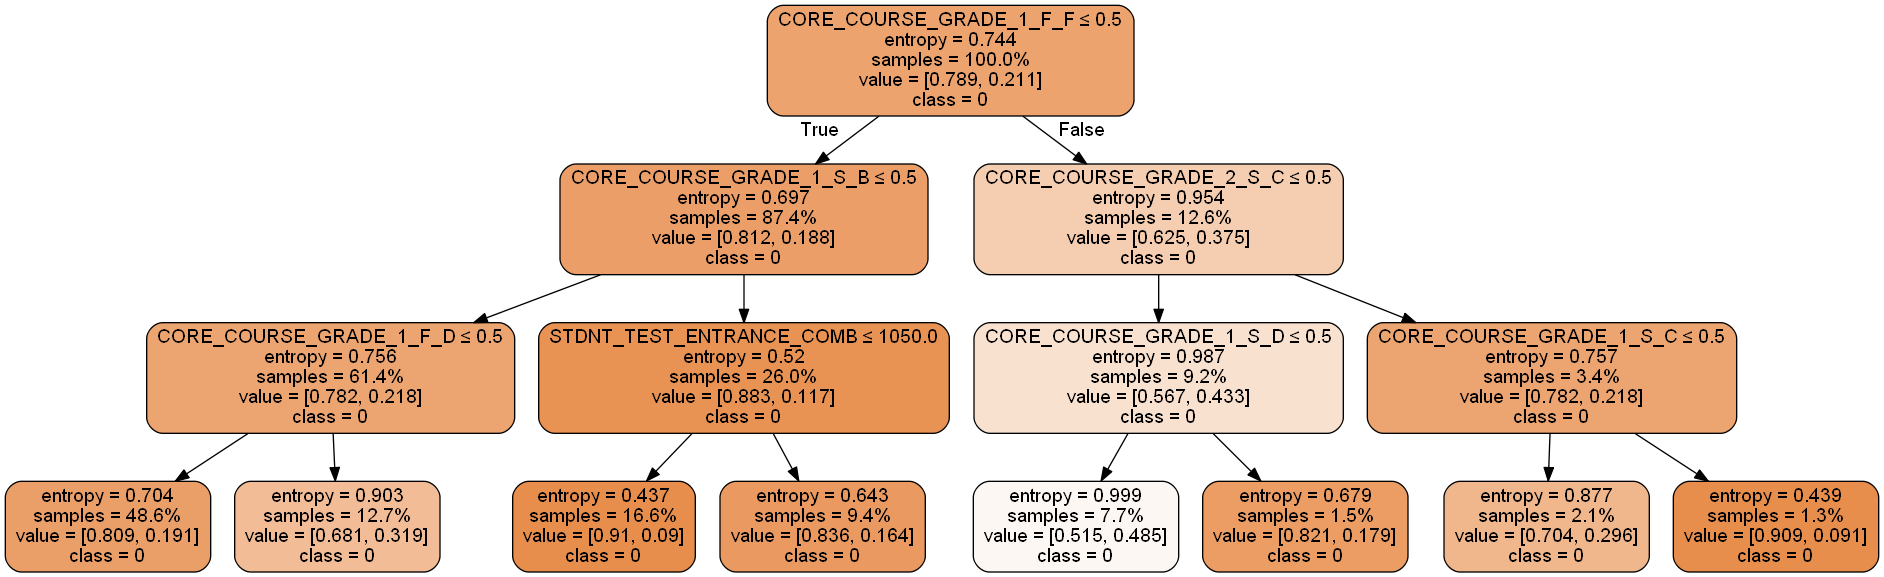

In [280]:

import pydotplus
dot_data= tree.export_graphviz(treeModel,out_file=None,
                              feature_names=df1_final.columns,
                              class_names=['0','1'],
                              filled=True, rounded=True,
                              special_characters=True,proportion=True)

graph3=pydotplus.graph_from_dot_data(dot_data)

from IPython.display import Image

Image(graph3.create_png())

In [281]:

#create pdf
graph3.write_pdf('dt1_1.pdf')
#create png
graph3.write_png('dt1_1.png')

True

#XGBOOST

In [282]:

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
import xgboost as xgb
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
## Hyperparameter optimization using RandomizedSearchCV

In [283]:

#how much time it takes for the random search cv to run is given by the below codes(just for info)
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [284]:
classifier=xgboost.XGBClassifier()

In [286]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [287]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   42.5s finished



 Time taken: 0 hours 0 minutes and 56.73 seconds.


In [288]:

random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [289]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [290]:

classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
#give the best estimator from above or best params

In [291]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train,cv=10)
#we take the cross validation score

In [292]:

score

array([0.77952756, 0.79133858, 0.77165354, 0.78346457, 0.80314961,
       0.7944664 , 0.80237154, 0.7944664 , 0.81027668, 0.79841897])

In [293]:
score.mean()

0.7929133858267716

In [298]:
# Predicting the Test set results
random_search.fit(X_test,y_test)
#y_pred = classifier.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   18.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [317]:
#y_pred = classifier.predict(X_test)

In [302]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[666,   0],
       [179,   0]], dtype=int64)

In [301]:
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

0.7881656804733728

In [ ]:
#
#from sklearn.model_selection import cross_val_score
#score=cross_val_score(classifier,df1_final,target,cv=10)

##SVM SUPPORT VECTOR MACHINE

In [333]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train1, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [334]:

classifier.score(X_test1,y_test)

0.7881656804733728

In [335]:

# Predicting the Test set results
y_pred = classifier.predict(X_test1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [336]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[665,   1],
       [178,   1]], dtype=int64)

In [337]:

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7881656804733728

In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
Grid_search = grid_search.fit(X_train1, y_train)
#SCORING-accuracy

In [ ]:
accuracy = Grid_search.best_score_

accuracy

In [ ]:

Grid_search.best_params_

In [ ]:

Grid_search.cv_results_

In [ ]:
cv_result=pd.DataFrame(Grid_search.cv_results_)
#these are the individual value from each split
cv_result

In [ ]:
dir(Grid_search)

In [ ]:

classifier = SVC(kernel = 'rbf', gamma=0.7)
classifier.fit(X_train, y_train)

In [ ]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

#adaboost

In [318]:
from sklearn.ensemble import AdaBoostClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=1)
AdaBoost=AdaBoostClassifier(base_estimator=model,n_estimators=400,learning_rate=1)

In [319]:
boostmodel=AdaBoost.fit(X_train,y_train)

In [228]:

y_pred=boostmodel.predict(X_test)
#evaluating the model when we give the testing dataset

In [229]:

predictions=metrics.accuracy_score(y_test,y_pred)

In [230]:
print('The accuracy is:',predictions*100,'%')

The accuracy is: 77.98816568047337 %
